## Projekt Logistyka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from datetime import datetime


# wczytywanie danych

In [2]:
df = pd.read_csv("data/Projekt2.csv")
# jupyter/logistyka

!ls

'Projekt II - outband SE.xlsx'	 data		    magic04.data
 Untitled.ipynb			 logistyka1.ipynb


In [3]:
df.head()

distance Total freight cost EUR Total gross kg  Volume m3      User  \
0    9983.0                 156.61             40       12.0  DC Trosa   
1    9983.0                 535.00           14.7       21.0  DC Trosa   
2    9983.0                 423.48             99      341.0  DC Trosa   
3    9983.0                  63.46            2.2       34.0  DC Trosa   
4    9983.0                 164.94             44      324.0  DC Trosa   

   Disp. dt.                  Csee       City Posta Code CntryD  \
0  1/25/2021  AB Singapore Pte Ltd  SINGAPORE     498801     SG   
1  1/21/2021  AB Singapore Pte Ltd  SINGAPORE     408934     SG   
2  1/21/2021  AB Singapore Pte Ltd  Singapore     408934     SG   
3  1/19/2021  AB Singapore Pte Ltd  SINGAPORE     629043     SG   
4  1/19/2021  AB Singapore Pte Ltd  SINGAPORE     627608     SG   

  Type of transport Forwarder Incoterms   a   b   c  
0               air       DHL       DAP NaN NaN NaN  
1               air    Geodis       DAP NaN NaN NaN  
2               air       DHL       DAP NaN NaN NaN  
3               air       DHL       DAP NaN NaN NaN  
4               air       DHL       DAP NaN NaN NaN

# Porządkowanie danych

In [4]:
unique_values_dist =unique_values_user = df['distance'].unique()
print(unique_values_dist)

[ 9983.    18310.724  6812.     7639.5   23442.616  8123.     7548.
 10448.      995.     1667.     6619.    14291.884]


In [5]:
unique_values_user = df['User'].unique()
unique_values_Csee = df['Csee'].unique()
unique_values_City = df['City'].unique()
unique_values_Posta_Code = df['Posta Code'].unique()
unique_values_CntryD = df['CntryD'].unique()
unique_values_Type_of_transport = df['Type of transport'].unique()
unique_values_Forwarder = df['Forwarder'].unique()
unique_values_Incoterms = df['Incoterms'].unique()

print("User = ")
print(unique_values_user, '\n')
print("Csee = ")
print(unique_values_Csee, '\n')
print("City = ")
print(unique_values_City, '\n')
print("Posta Code = ")
print(unique_values_Posta_Code, '\n')
print("CntryD = ")
print(unique_values_CntryD, '\n')
print("Type of transport = ")
print(unique_values_Type_of_transport, '\n')
print("Forwarder = ")
print(unique_values_Forwarder, '\n')
print("Incoterms = ")
print(unique_values_Incoterms, '\n')

User = 
['DC Trosa' 'MC Flen'] 

Csee = 
['AB Singapore Pte Ltd' 'AB Greenwood AMDC' 'AB EXTON AMDC'
 'AB NEW AUGUSTA AMDC' 'AB Kunshan Co. Ltd' 'AB Wieliczka SP. Z.O.O.'
 'AB India Pvt. Ltd'] 

City = 
['SINGAPORE' 'Singapore' 'singapore' 'GREENWOOD, IN' 'EXTON,PA'
 'NEW AUGUSTA, MS' 'KUNSHAN' 'Wieliczka' 'PUNE'] 

Posta Code = 
['498801' '408934' '629043' '627608' '627870' '637377' '609271' '758114'
 '637037' '580988' '629881' '68902' '637022' '498747' '629654' '638503'
 '619115' '819834' '623043' '636953' '819827' '627735' '629877' '629353'
 '637473' '619478' '619093' '89315' '628781' '46143' '19320' '43143'
 '19341' '46268' '215301' '215300' '30-390' '411012'] 

CntryD = 
['SG' 'US' 'CN' 'PL' 'IN'] 

Type of transport = 
['air' 'sea' 'rail' 'road'] 

Forwarder = 
['DHL' 'Geodis' 'Scan Global Logistics' 'TNT' 'DSV' 'Done Deliveries'] 

Incoterms = 
['DAP' 'CIP' 'CFR' 'CIF' 'CPT' 'DPU'] 



In [6]:
class_counts_user = df['User'].value_counts()
print(class_counts_user)
class_counts_Csee = df['Csee'].value_counts()
print(class_counts_Csee)
class_counts_City = df['City'].value_counts()
print(class_counts_City)
class_counts_Posta_Code = df['Posta Code'].value_counts()
print(class_counts_Posta_Code)
class_counts_CntryD = df['CntryD'].value_counts()
print(class_counts_CntryD)
class_counts_Type_of_transport = df['Type of transport'].value_counts()
print(class_counts_Type_of_transport)
class_counts_Forwarder = df['Forwarder'].value_counts()
print(class_counts_Forwarder)
class_counts_Incoterms = df['Incoterms'].value_counts()
print(class_counts_Incoterms)

DC Trosa    5015
MC Flen      241
Name: User, dtype: int64
AB Greenwood AMDC          2260
AB Wieliczka SP. Z.O.O.    1678
AB Kunshan Co. Ltd          661
AB Singapore Pte Ltd        514
AB EXTON AMDC               118
AB NEW AUGUSTA AMDC          21
AB India Pvt. Ltd             4
Name: Csee, dtype: int64
GREENWOOD, IN      2260
Wieliczka          1678
KUNSHAN             661
SINGAPORE           317
Singapore           196
EXTON,PA            118
NEW AUGUSTA, MS      21
PUNE                  4
singapore             1
Name: City, dtype: int64
46143     1738
30-390    1678
46268      542
629043     447
215300     356
215301     305
19320       68
19341       50
408934      14
627870       8
637022       4
619115       4
411012       4
629877       3
637377       3
819834       3
629353       2
623043       2
498801       2
627608       2
498747       2
758114       2
637037       2
638503       1
68902        1
609271       1
580988       1
43143        1
629881       1
628781       1
8

In [7]:
class_mapping_user = {value: index for index, value in enumerate(unique_values_user)}
class_mapping_Csee = {value: index for index, value in enumerate(unique_values_Csee)}    
class_mapping_city = {value: index for index, value in enumerate(unique_values_City)}
class_mapping_postal_code = {value: index for index, value in enumerate(unique_values_Posta_Code)}
class_mapping_contry = {value: index for index, value in enumerate(unique_values_CntryD)}
class_mapping_transpotr_type = {value: index for index, value in enumerate(unique_values_Type_of_transport)}
class_mapping_forwarder = {value: index for index, value in enumerate(unique_values_Forwarder)}
class_mapping_incoterms = {value: index for index, value in enumerate(unique_values_Incoterms)}






In [8]:
df['User'] = df['User'].map(class_mapping_user)
df['Csee'] = df['Csee'].map(class_mapping_Csee)
df['City'] = df['City'].map(class_mapping_city)
df['Posta Code'] = df['Posta Code'].map(class_mapping_postal_code)
df['CntryD'] = df['CntryD'].map(class_mapping_contry)
df['Type of transport'] = df['Type of transport'].map(class_mapping_transpotr_type)
df['Forwarder'] = df['Forwarder'].map(class_mapping_forwarder)
df['Incoterms'] = df['Incoterms'].map(class_mapping_incoterms)

In [9]:
unique_values_Cuser = df['User'].unique()
unique_values_CCsee = df['Csee'].unique()
unique_values_CCity = df['City'].unique()
unique_values_CPosta_Code = df['Posta Code'].unique()
unique_values_CCntryD = df['CntryD'].unique()
unique_values_CType_of_transport = df['Type of transport'].unique()
unique_values_CForwarder = df['Forwarder'].unique()
unique_values_CIncoterms = df['Incoterms'].unique()


In [10]:
print("User = ")
print(unique_values_Cuser)
print("Csee = ")
print(unique_values_CCsee)
print("City = ")
print(unique_values_CCity)
print("Posta Code = ")
print(unique_values_CPosta_Code)
print("CntryD = ")
print(unique_values_CCntryD)
print("Type of transport = ")
print(unique_values_CType_of_transport)
print("Forwarder = ")
print(unique_values_CForwarder)
print("Incoterms = ")
print(unique_values_CIncoterms)

User = 
[0 1]
Csee = 
[0 1 2 3 4 5 6]
City = 
[0 1 2 3 4 5 6 7 8]
Posta Code = 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
CntryD = 
[0 1 2 3 4]
Type of transport = 
[0 1 2 3]
Forwarder = 
[0 1 2 3 4 5]
Incoterms = 
[0 1 2 3 4 5]


In [11]:
df.head()

distance Total freight cost EUR Total gross kg  Volume m3  User  Disp. dt.  \
0    9983.0                 156.61             40       12.0     0  1/25/2021   
1    9983.0                 535.00           14.7       21.0     0  1/21/2021   
2    9983.0                 423.48             99      341.0     0  1/21/2021   
3    9983.0                  63.46            2.2       34.0     0  1/19/2021   
4    9983.0                 164.94             44      324.0     0  1/19/2021   

   Csee  City  Posta Code  CntryD  Type of transport  Forwarder  Incoterms  \
0     0     0           0       0                  0          0          0   
1     0     0           1       0                  0          1          0   
2     0     1           1       0                  0          0          0   
3     0     0           2       0                  0          0          0   
4     0     0           3       0                  0          0          0   

    a   b   c  
0 NaN NaN NaN  
1 NaN NaN NaN  
2 NaN NaN NaN  
3 NaN NaN NaN  
4 NaN NaN NaN

In [12]:
df = df.drop(['a', 'b', 'c'], axis=1)

In [13]:
df.head()

distance Total freight cost EUR Total gross kg  Volume m3  User  Disp. dt.  \
0    9983.0                 156.61             40       12.0     0  1/25/2021   
1    9983.0                 535.00           14.7       21.0     0  1/21/2021   
2    9983.0                 423.48             99      341.0     0  1/21/2021   
3    9983.0                  63.46            2.2       34.0     0  1/19/2021   
4    9983.0                 164.94             44      324.0     0  1/19/2021   

   Csee  City  Posta Code  CntryD  Type of transport  Forwarder  Incoterms  
0     0     0           0       0                  0          0          0  
1     0     0           1       0                  0          1          0  
2     0     1           1       0                  0          0          0  
3     0     0           2       0                  0          0          0  
4     0     0           3       0                  0          0          0

In [14]:
column_names = df.columns.tolist()
print(column_names)

['distance', 'Total freight cost EUR', 'Total gross kg', 'Volume m3', 'User', 'Disp. dt.', 'Csee', 'City', 'Posta Code', 'CntryD', 'Type of transport', 'Forwarder', 'Incoterms']


In [15]:
class_counts_user = df['User'].value_counts()
print(class_counts_user)
class_counts_Csee = df['Csee'].value_counts()
print(class_counts_Csee)
class_counts_City = df['City'].value_counts()
print(class_counts_City)
class_counts_Posta_Code = df['Posta Code'].value_counts()
print(class_counts_Posta_Code)
class_counts_CntryD = df['CntryD'].value_counts()
print(class_counts_CntryD)
class_counts_Type_of_transport = df['Type of transport'].value_counts()
print(class_counts_Type_of_transport)
class_counts_Forwarder = df['Forwarder'].value_counts()
print(class_counts_Forwarder)
class_counts_Incoterms = df['Incoterms'].value_counts()
print(class_counts_Incoterms)


0    5015
1     241
Name: User, dtype: int64
1    2260
5    1678
4     661
0     514
2     118
3      21
6       4
Name: Csee, dtype: int64
3    2260
7    1678
6     661
0     317
1     196
4     118
5      21
8       4
2       1
Name: City, dtype: int64
29    1738
36    1678
33     542
2      447
35     356
34     305
30      68
32      50
1       14
4        8
12       4
16       4
37       4
22       3
5        3
17       3
23       2
18       2
0        2
3        2
13       2
7        2
8        2
15       1
11       1
6        1
9        1
31       1
10       1
28       1
20       1
27       1
26       1
25       1
24       1
14       1
21       1
19       1
Name: Posta Code, dtype: int64
1    2399
3    1678
2     661
0     514
4       4
Name: CntryD, dtype: int64
0    3732
3    1119
1     386
2      19
Name: Type of transport, dtype: int64
3    2180
0    1466
4    1023
2     487
5      90
1      10
Name: Forwarder, dtype: int64
0    4238
4     479
3     275
1     134
2     111
5

In [16]:
class_counts_user = df['User'].value_counts()
print(class_counts_user)
class_counts_Csee = df['Csee'].value_counts()
print(class_counts_Csee)
class_counts_City = df['City'].value_counts()
print(class_counts_City)
class_counts_Posta_Code = df['Posta Code'].value_counts()
print(class_counts_Posta_Code)
class_counts_CntryD = df['CntryD'].value_counts()
print(class_counts_CntryD)
class_counts_Type_of_transport = df['Type of transport'].value_counts()
print(class_counts_Type_of_transport)
class_counts_Forwarder = df['Forwarder'].value_counts()
print(class_counts_Forwarder)
class_counts_Incoterms = df['Incoterms'].value_counts()
print(class_counts_Incoterms)

0    5015
1     241
Name: User, dtype: int64
1    2260
5    1678
4     661
0     514
2     118
3      21
6       4
Name: Csee, dtype: int64
3    2260
7    1678
6     661
0     317
1     196
4     118
5      21
8       4
2       1
Name: City, dtype: int64
29    1738
36    1678
33     542
2      447
35     356
34     305
30      68
32      50
1       14
4        8
12       4
16       4
37       4
22       3
5        3
17       3
23       2
18       2
0        2
3        2
13       2
7        2
8        2
15       1
11       1
6        1
9        1
31       1
10       1
28       1
20       1
27       1
26       1
25       1
24       1
14       1
21       1
19       1
Name: Posta Code, dtype: int64
1    2399
3    1678
2     661
0     514
4       4
Name: CntryD, dtype: int64
0    3732
3    1119
1     386
2      19
Name: Type of transport, dtype: int64
3    2180
0    1466
4    1023
2     487
5      90
1      10
Name: Forwarder, dtype: int64
0    4238
4     479
3     275
1     134
2     111
5

In [17]:
for label in column_names[:-1]:
    data_type = df[label].dtype
    print(label)
    if data_type == object:
        print("                     Dane w formacie string")
    if data_type == int or data_type == float:
        print(" Dane w formacie liczbowym")    

distance
 Dane w formacie liczbowym
Total freight cost EUR
                     Dane w formacie string
Total gross kg
                     Dane w formacie string
Volume m3
 Dane w formacie liczbowym
User
 Dane w formacie liczbowym
Disp. dt.
                     Dane w formacie string
Csee
 Dane w formacie liczbowym
City
 Dane w formacie liczbowym
Posta Code
 Dane w formacie liczbowym
CntryD
 Dane w formacie liczbowym
Type of transport
 Dane w formacie liczbowym
Forwarder
 Dane w formacie liczbowym


In [18]:
df['Disp. dt.'] = pd.to_datetime(df['Disp. dt.'], format='%m/%d/%Y')

In [19]:
string_col = ['Total freight cost EUR','Total gross kg']


for Column in string_col:
    df[Column] = df[Column].str.replace(',', '')
    df[Column] = df[Column].str.replace(',', '.')
    df[Column] = df[Column].astype(float)

In [20]:
for label in column_names[:-1]:
    data_type = df[label].dtype
    print(label)
    if data_type == object:
        print("                Dane w formacie string")
    if data_type == int or data_type == float:
        print("Dane w formacie liczbowym")

distance
Dane w formacie liczbowym
Total freight cost EUR
Dane w formacie liczbowym
Total gross kg
Dane w formacie liczbowym
Volume m3
Dane w formacie liczbowym
User
Dane w formacie liczbowym
Disp. dt.
Csee
Dane w formacie liczbowym
City
Dane w formacie liczbowym
Posta Code
Dane w formacie liczbowym
CntryD
Dane w formacie liczbowym
Type of transport
Dane w formacie liczbowym
Forwarder
Dane w formacie liczbowym


# Tworzenie Wykresów 
wykresy kołowe danej a od a

In [21]:
list_class = [class_counts_user,class_counts_Csee,class_counts_City,class_counts_Posta_Code,class_counts_CntryD,class_counts_Type_of_transport,class_counts_Forwarder,class_counts_Incoterms]
list_values = [unique_values_user,unique_values_Csee,unique_values_City,unique_values_Posta_Code,unique_values_CntryD,unique_values_Type_of_transport,unique_values_Forwarder,unique_values_Incoterms]


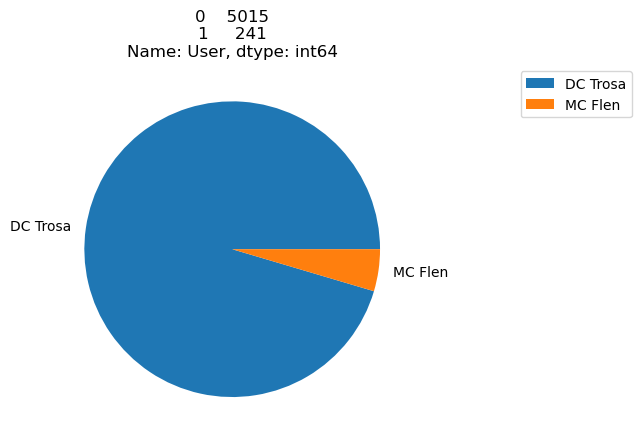

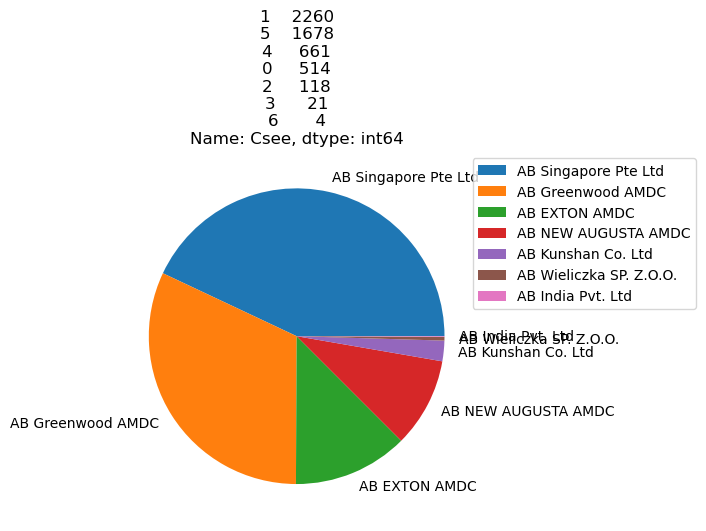

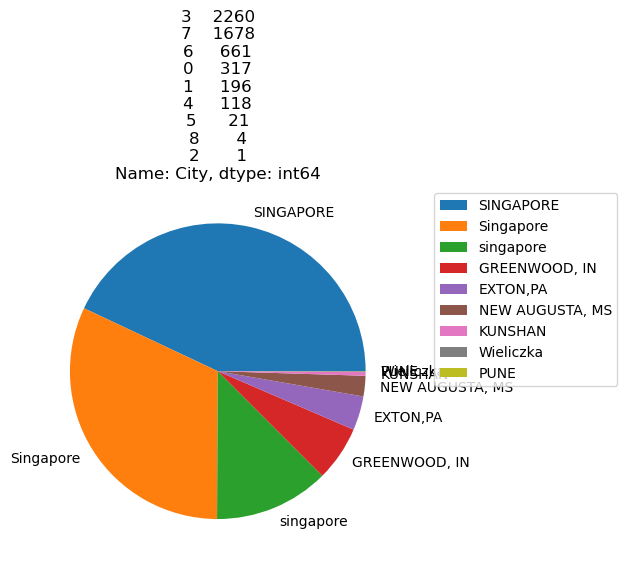

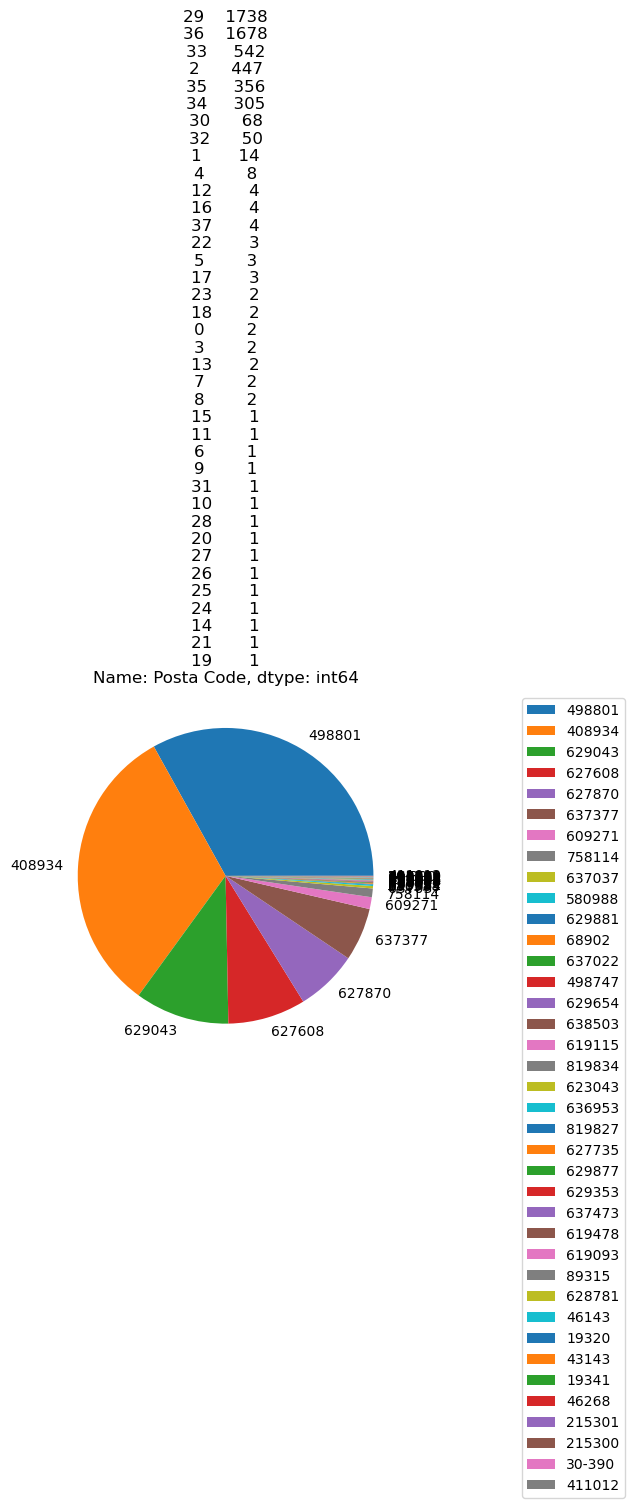

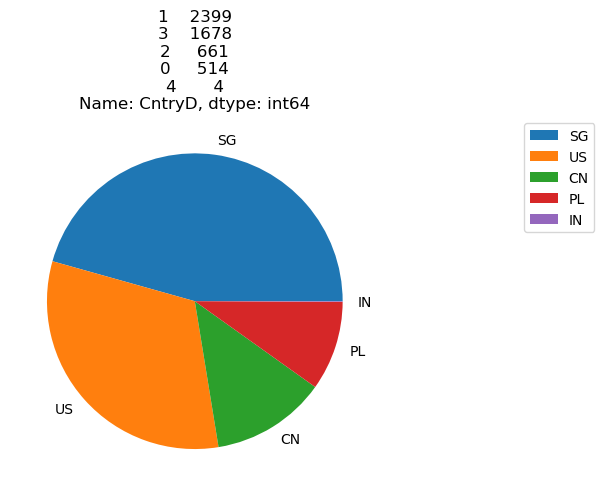

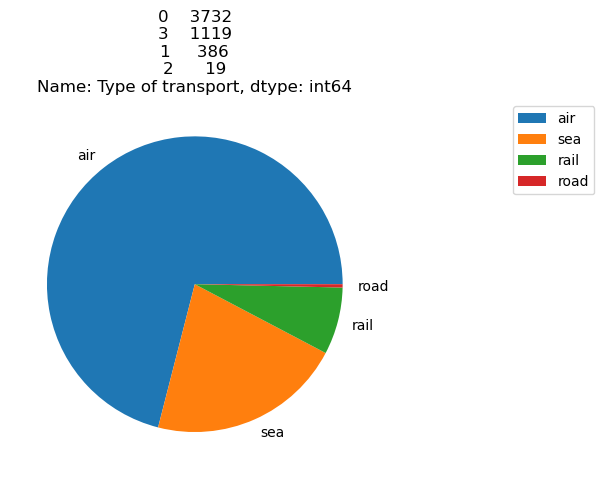

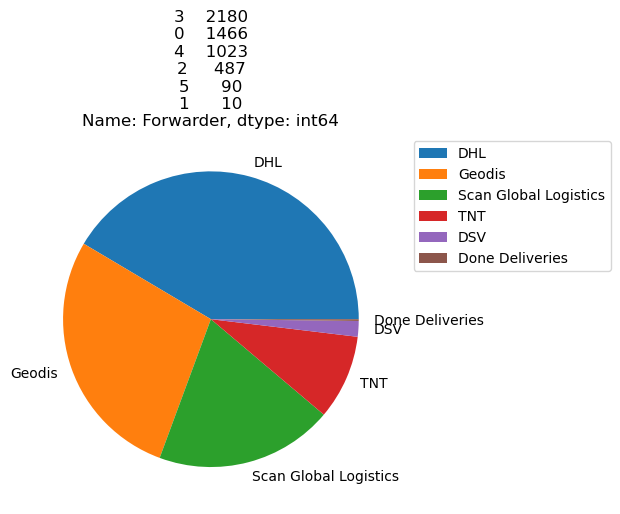

In [22]:
for label, labels in zip( list_class[:-1],list_values[:-1]):
    plt.pie(label, labels=labels)
    plt.title(str(label))
    plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1.0))
    plt.show()


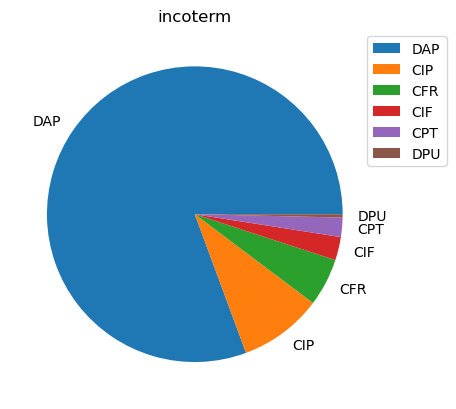

In [23]:
    plt.pie(class_counts_Incoterms, labels=unique_values_Incoterms)
    plt.title('incoterm')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.show()

In [24]:
## wykresy liniowe

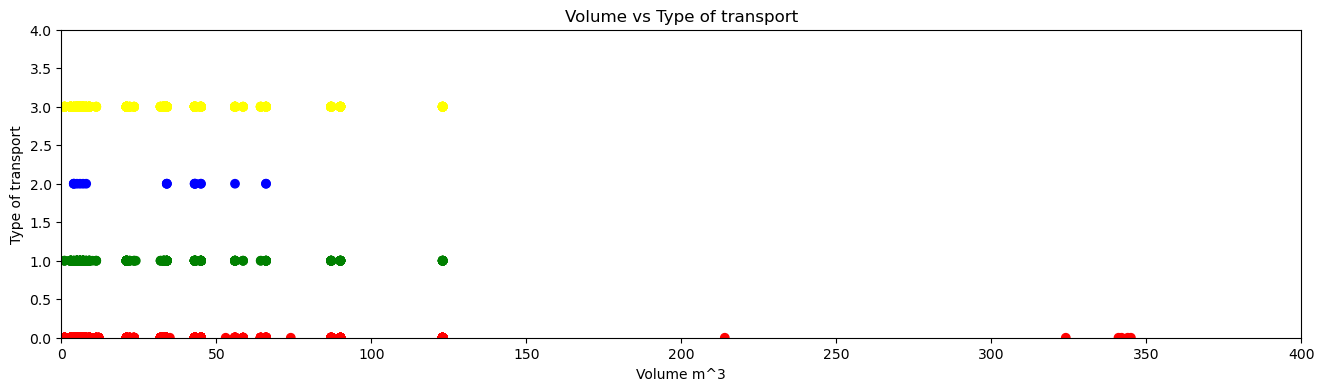

In [25]:

volume = df['Volume m3']
transport = df['Type of transport']

# Definiowanie kolorów dla każdej klasy
colors = ['red', 'green', 'blue', 'yellow']
plt.figure(figsize=(16, 4))
# Tworzenie wykresu punktowego
plt.scatter(volume, transport, c=[colors[val] for val in transport])

plt.xlim(0, 400)  # Ustawia zakres osi X od 0 do 10
plt.ylim(0, 4)  # Ustawia zakres osi Y od 0 do 12

# Dodawanie etykiet i tytułu wykresu
plt.xlabel('Volume m^3')
plt.ylabel('Type of transport')
plt.title('Volume vs Type of transport')

# Wyświetlanie wykresu
plt.show()


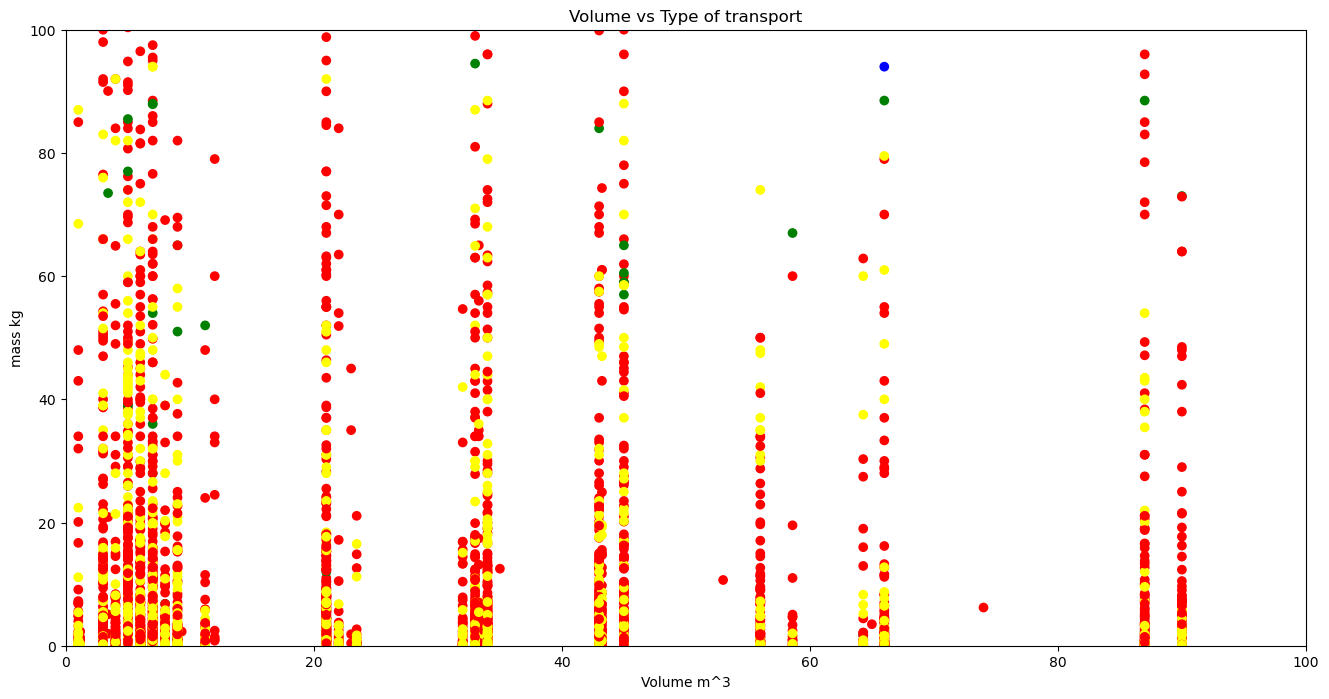

In [26]:

volume = df['Volume m3']
transport = df['Type of transport']
waga = df['Total gross kg'].astype(float)

# Definiowanie kolorów dla każdej klasy
colors = ['red', 'green', 'blue', 'yellow']
plt.figure(figsize=(16, 8))
# Tworzenie wykresu punktowego
plt.scatter(volume, waga, c=[colors[val] for val in transport])

plt.xlim(0, 100)  # Ustawia zakres osi X od 0 do 10
plt.ylim(0, 100)  # Ustawia zakres osi Y od 0 do 12

# Dodawanie etykiet i tytułu wykresu
plt.xlabel('Volume m^3')
plt.ylabel('mass kg')
plt.title('Volume vs Type of transport')

# Wyświetlanie wykresu
plt.show()

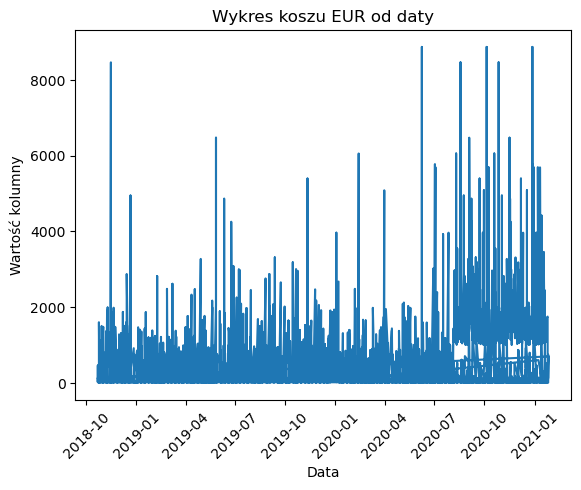

In [27]:
# wartość wysyłek od daty 
x = df['Disp. dt.']
y = df['Total freight cost EUR']  

# Tworzenie wykresu
plt.plot(x, y)
plt.xlabel('Data')
plt.ylabel('Wartość kolumny')
plt.title('Wykres koszu EUR od daty')
plt.xticks(rotation=45)  # Obrót etykiet osi X

# Wyświetlenie wykresu
plt.show()

# wykres łącznych miesięcznych wartości zamówień

In [28]:
# Przekształcenie kolumny 'Disp. dt.' na format daty
df['Disp. dt.'] = pd.to_datetime(df['Disp. dt.'])

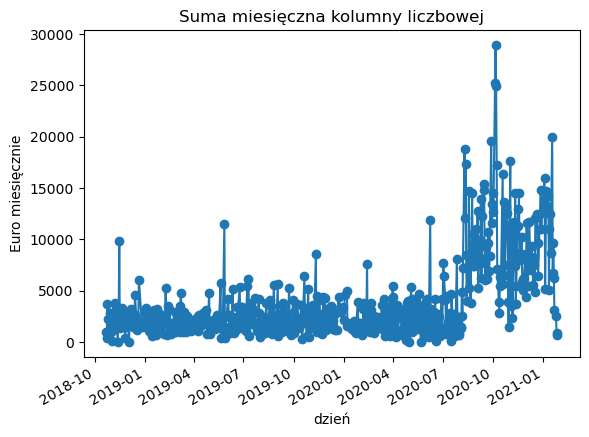

In [29]:
monthly_data = df.groupby(df['Disp. dt.'])['Total freight cost EUR'].sum()
# Wygenerowanie wykresu
monthly_data.plot(kind='line', marker='o')
# Ustawienie etykiet i tytułu
plt.xlabel('dzień')
plt.ylabel('Euro miesięcznie')
plt.title('Suma miesięczna kolumny liczbowej')

# Wyświetlenie wykresu
plt.show()

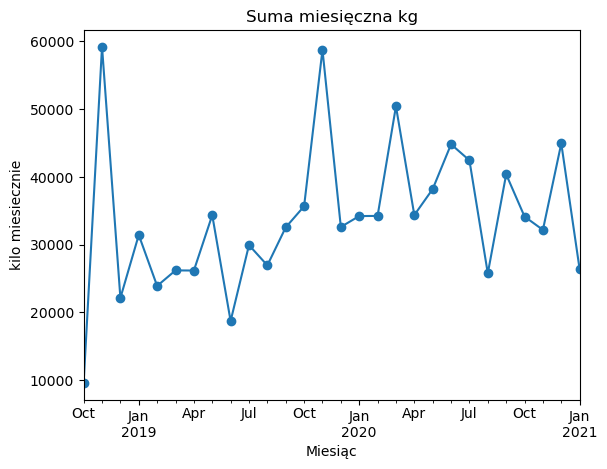

In [30]:

# Przekształcenie kolumny 'Disp. dt.' na format daty
df['Disp. dt.'] = pd.to_datetime(df['Disp. dt.'])

# Grupowanie danych po miesiącach i obliczenie sumy kolumny liczbowej
monthly_data = df.groupby(df['Disp. dt.'].dt.to_period('M'))['Total gross kg'].sum()

# Wygenerowanie wykresu
monthly_data.plot(kind='line', marker='o')

# Ustawienie etykiet i tytułu
plt.xlabel('Miesiąc')
plt.ylabel('kilo miesiecznie')
plt.title('Suma miesięczna kg')

# Wyświetlenie wykresu
plt.show()

distance
Disp. dt.
2018-10     320324.000
2018-11     934294.116
2018-12     732262.616
2019-01    1203986.116
2019-02     959478.116
2019-03     994314.616
2019-04     877704.116
2019-05    1183213.232
2019-06    1212635.732
2019-07    1626061.348
2019-08    1072732.616
2019-09    1147750.616
2019-10    1120279.616
2019-11    1193512.080
2019-12    1182774.080
2020-01    1205971.080
2020-02    1252920.080
2020-03    1373158.696
2020-04    1043875.312
2020-05    1128099.160
2020-06    1111185.660
2020-07    1154509.304
2020-08    1202156.964
2020-09    1311755.420
2020-10    1303343.464
2020-11    1244999.812
2020-12    1208677.428
2021-01    1067214.080
Freq: M, Name: distance, dtype: float64


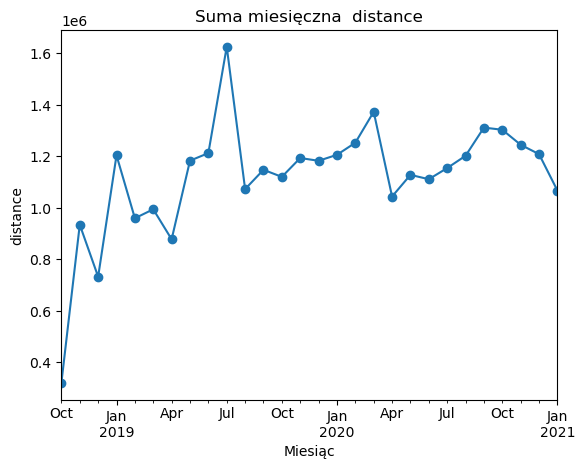

Total freight cost EUR
Disp. dt.
2018-10     14072.10
2018-11     52048.73
2018-12     37718.73
2019-01     44538.62
2019-02     37261.49
2019-03     40112.20
2019-04     42130.96
2019-05     45846.09
2019-06     47549.98
2019-07     58429.42
2019-08     42130.24
2019-09     47053.07
2019-10     53254.66
2019-11     55304.42
2019-12     43938.18
2020-01     41740.51
2020-02     46734.12
2020-03     49704.09
2020-04     40327.57
2020-05     45353.89
2020-06     50939.07
2020-07     61212.15
2020-08    177488.23
2020-09    224806.33
2020-10    247151.24
2020-11    182581.61
2020-12    180396.98
2021-01    150180.60
Freq: M, Name: Total freight cost EUR, dtype: float64


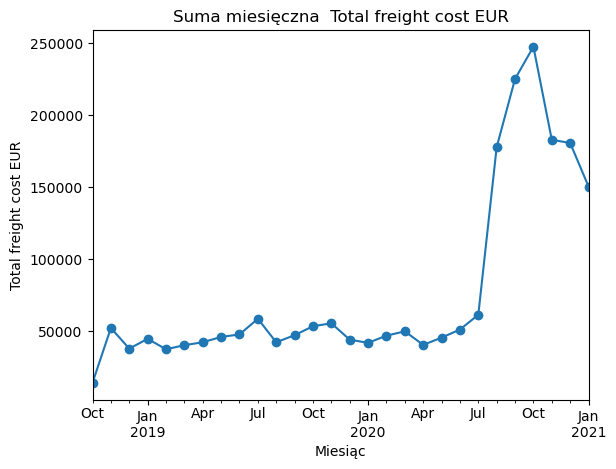

Total gross kg
Disp. dt.
2018-10     9607.600
2018-11    59182.683
2018-12    22111.721
2019-01    31409.101
2019-02    23888.287
2019-03    26181.485
2019-04    26160.289
2019-05    34331.155
2019-06    18710.849
2019-07    29912.850
2019-08    26922.512
2019-09    32529.998
2019-10    35643.889
2019-11    58735.230
2019-12    32589.911
2020-01    34197.932
2020-02    34218.936
2020-03    50392.184
2020-04    34343.848
2020-05    38180.060
2020-06    44788.956
2020-07    42417.800
2020-08    25740.247
2020-09    40354.544
2020-10    34126.849
2020-11    32155.591
2020-12    44913.065
2021-01    26328.472
Freq: M, Name: Total gross kg, dtype: float64


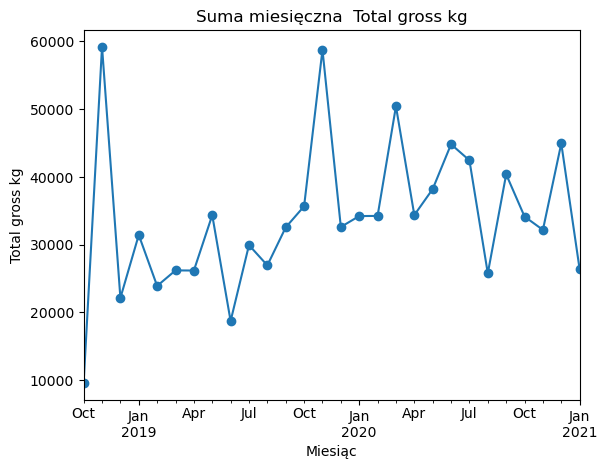

Volume m3
Disp. dt.
2018-10     1744.300
2018-11     4116.970
2018-12     4187.730
2019-01     5629.770
2019-02     4985.720
2019-03     5126.270
2019-04     4278.280
2019-05     5259.630
2019-06     5829.660
2019-07     6614.920
2019-08     5568.550
2019-09     5200.430
2019-10     6477.770
2019-11     5690.550
2019-12     5130.583
2020-01     6132.250
2020-02     5470.400
2020-03     7340.010
2020-04     5338.040
2020-05     5532.410
2020-06     5062.290
2020-07     6221.140
2020-08     6614.630
2020-09     6231.270
2020-10     6766.840
2020-11     6283.540
2020-12     5921.160
2021-01    11816.510
Freq: M, Name: Volume m3, dtype: float64


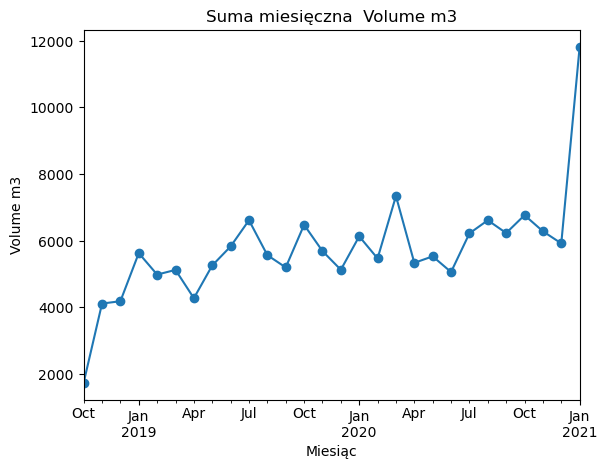

User
Disp. dt.
2018-10     0
2018-11     0
2018-12     0
2019-01     0
2019-02     0
2019-03     0
2019-04     0
2019-05     0
2019-06     0
2019-07     0
2019-08     0
2019-09     0
2019-10     6
2019-11    13
2019-12    14
2020-01    16
2020-02    14
2020-03    13
2020-04    17
2020-05    18
2020-06    21
2020-07    16
2020-08    13
2020-09    18
2020-10    13
2020-11    17
2020-12    17
2021-01    15
Freq: M, Name: User, dtype: int64


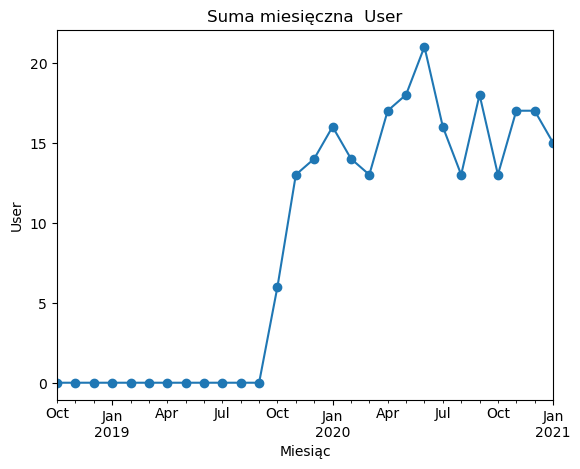

Csee
Disp. dt.
2018-10    150
2018-11    355
2018-12    321
2019-01    496
2019-02    351
2019-03    475
2019-04    357
2019-05    497
2019-06    435
2019-07    443
2019-08    405
2019-09    444
2019-10    516
2019-11    524
2019-12    488
2020-01    637
2020-02    499
2020-03    653
2020-04    594
2020-05    543
2020-06    514
2020-07    556
2020-08    553
2020-09    533
2020-10    598
2020-11    580
2020-12    625
2021-01    475
Freq: M, Name: Csee, dtype: int64


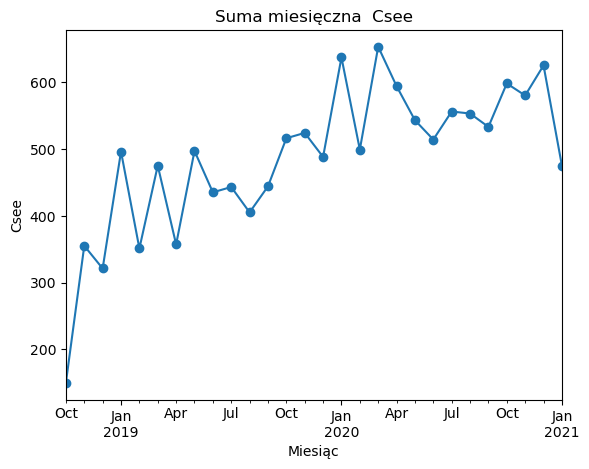

City
Disp. dt.
2018-10     256
2018-11     627
2018-12     558
2019-01     865
2019-02     641
2019-03     809
2019-04     630
2019-05     874
2019-06     758
2019-07     827
2019-08     731
2019-09     797
2019-10     890
2019-11     886
2019-12     822
2020-01    1047
2020-02     858
2020-03    1096
2020-04     931
2020-05     873
2020-06     843
2020-07     939
2020-08     955
2020-09     939
2020-10    1047
2020-11     979
2020-12    1031
2021-01     790
Freq: M, Name: City, dtype: int64


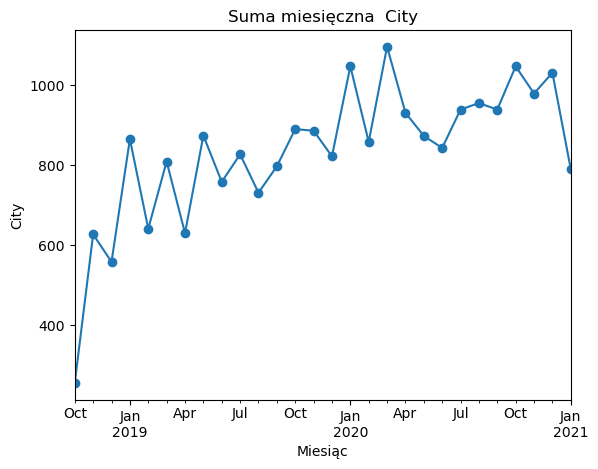

Posta Code
Disp. dt.
2018-10    1804
2018-11    4629
2018-12    4007
2019-01    6308
2019-02    4803
2019-03    5687
2019-04    4669
2019-05    6149
2019-06    5144
2019-07    5828
2019-08    5113
2019-09    5575
2019-10    5958
2019-11    5709
2019-12    5462
2020-01    6625
2020-02    5761
2020-03    7160
2020-04    5648
2020-05    5417
2020-06    5286
2020-07    6117
2020-08    6436
2020-09    6487
2020-10    7084
2020-11    6369
2020-12    6596
2021-01    5097
Freq: M, Name: Posta Code, dtype: int64


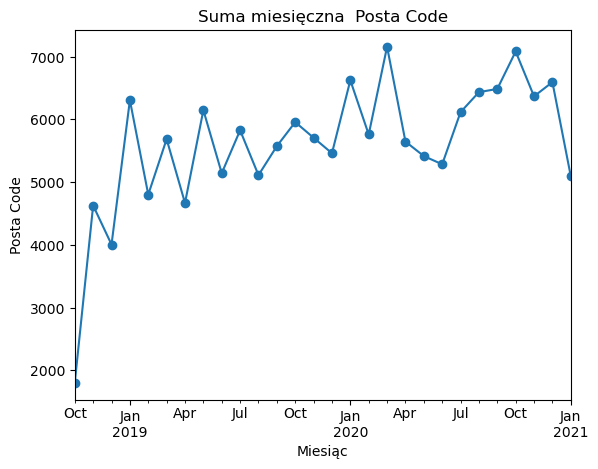

CntryD
Disp. dt.
2018-10     94
2018-11    225
2018-12    203
2019-01    323
2019-02    238
2019-03    307
2019-04    235
2019-05    327
2019-06    279
2019-07    295
2019-08    271
2019-09    298
2019-10    341
2019-11    332
2019-12    312
2020-01    401
2020-02    323
2020-03    422
2020-04    358
2020-05    334
2020-06    320
2020-07    357
2020-08    365
2020-09    355
2020-10    393
2020-11    373
2020-12    393
2021-01    297
Freq: M, Name: CntryD, dtype: int64


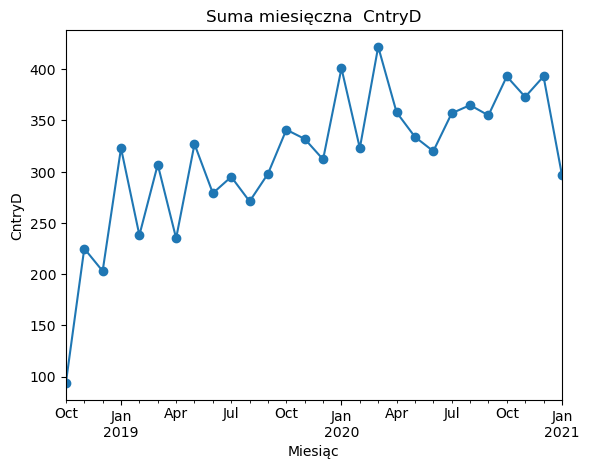

Type of transport
Disp. dt.
2018-10     38
2018-11     96
2018-12     66
2019-01    141
2019-02     97
2019-03    113
2019-04    106
2019-05    137
2019-06    107
2019-07    118
2019-08    113
2019-09    121
2019-10    152
2019-11    151
2019-12    172
2020-01    221
2020-02    166
2020-03    217
2020-04    170
2020-05    150
2020-06    119
2020-07    151
2020-08    126
2020-09    148
2020-10    126
2020-11    185
2020-12    166
2021-01    108
Freq: M, Name: Type of transport, dtype: int64


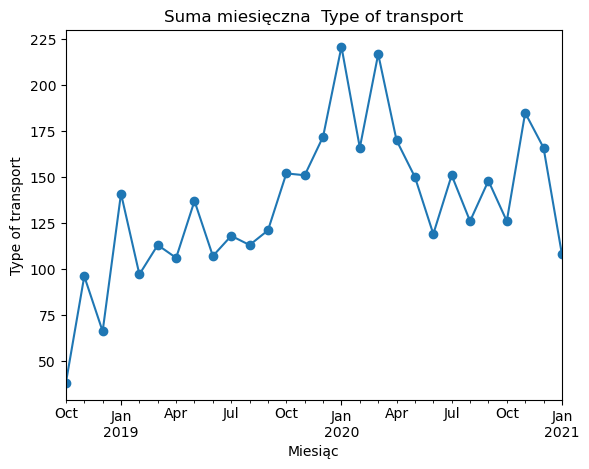

Forwarder
Disp. dt.
2018-10    140
2018-11    395
2018-12    290
2019-01    477
2019-02    356
2019-03    428
2019-04    373
2019-05    476
2019-06    332
2019-07    424
2019-08    383
2019-09    428
2019-10    485
2019-11    441
2019-12    445
2020-01    489
2020-02    471
2020-03    573
2020-04    437
2020-05    458
2020-06    415
2020-07    443
2020-08    436
2020-09    461
2020-10    589
2020-11    537
2020-12    515
2021-01    369
Freq: M, Name: Forwarder, dtype: int64


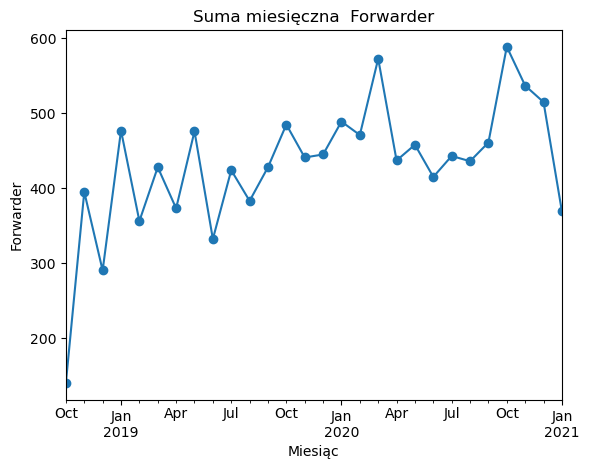

Incoterms
Disp. dt.
2018-10      9
2018-11     41
2018-12     34
2019-01     45
2019-02     34
2019-03     40
2019-04     95
2019-05    258
2019-06    154
2019-07    240
2019-08    215
2019-09    234
2019-10    230
2019-11    201
2019-12    214
2020-01    196
2020-02    233
2020-03    168
2020-04     57
2020-05     69
2020-06     57
2020-07     53
2020-08     42
2020-09     50
2020-10     57
2020-11     53
2020-12     50
2021-01     63
Freq: M, Name: Incoterms, dtype: int64


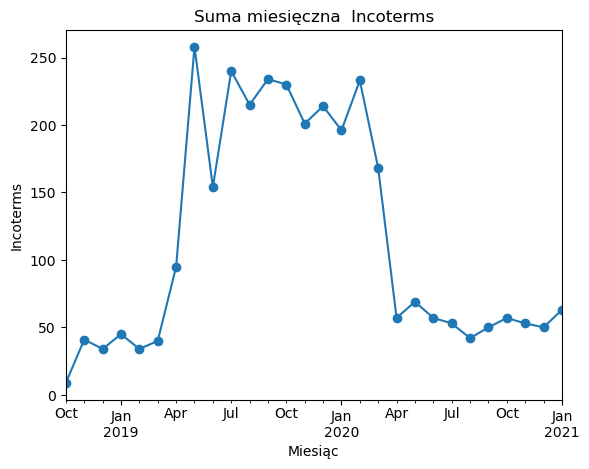

In [31]:
non_date_list = ['distance', 'Total freight cost EUR', 'Total gross kg', 'Volume m3', 'User', 'Csee', 'City', 'Posta Code', 'CntryD', 'Type of transport', 'Forwarder', 'Incoterms'] 
for label in non_date_list:
    monthly_data = df.groupby(df['Disp. dt.'].dt.to_period('M'))[label].sum()
    monthly_data.plot(kind='line', marker='o')
    print(label)
    print(monthly_data)
    # Ustawienie etykiet i tytułu
    plt.xlabel('Miesiąc')
    plt.ylabel(label )
    plt.title('Suma miesięczna  ' + label)

    # Wyświetlenie wykresu
    plt.show()

distance
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03    240
2020-04    181
2020-05    181
2020-06    178
2020-07    202
2020-08    214
2020-09    217
2020-10    231
2020-11    212
2020-12    210
2021-01    168
Freq: M, Name: distance, dtype: int64


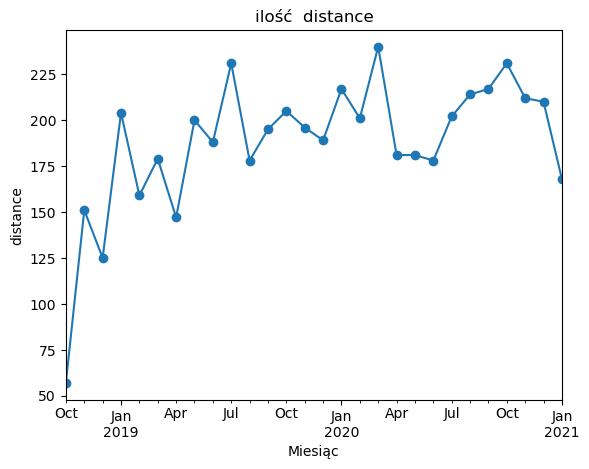

Total freight cost EUR
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03    240
2020-04    181
2020-05    181
2020-06    178
2020-07    202
2020-08    214
2020-09    217
2020-10    231
2020-11    212
2020-12    210
2021-01    168
Freq: M, Name: Total freight cost EUR, dtype: int64


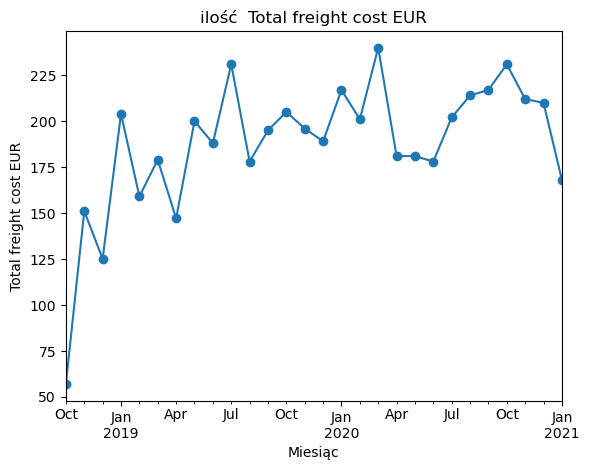

Total gross kg
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03    240
2020-04    181
2020-05    181
2020-06    178
2020-07    202
2020-08    214
2020-09    217
2020-10    231
2020-11    212
2020-12    210
2021-01    168
Freq: M, Name: Total gross kg, dtype: int64


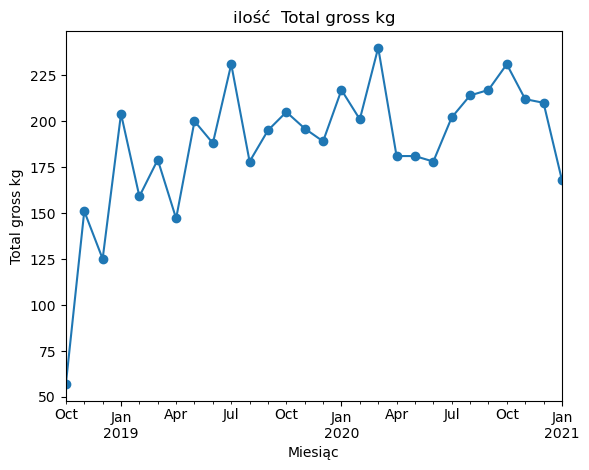

Volume m3
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03    240
2020-04    181
2020-05    181
2020-06    178
2020-07    202
2020-08    214
2020-09    217
2020-10    231
2020-11    212
2020-12    210
2021-01    168
Freq: M, Name: Volume m3, dtype: int64


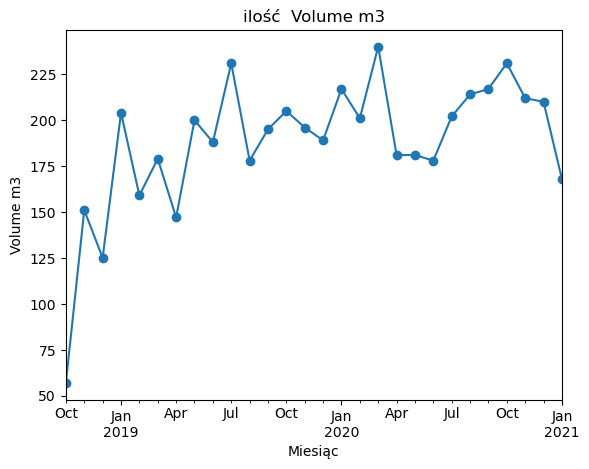

User
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03    240
2020-04    181
2020-05    181
2020-06    178
2020-07    202
2020-08    214
2020-09    217
2020-10    231
2020-11    212
2020-12    210
2021-01    168
Freq: M, Name: User, dtype: int64


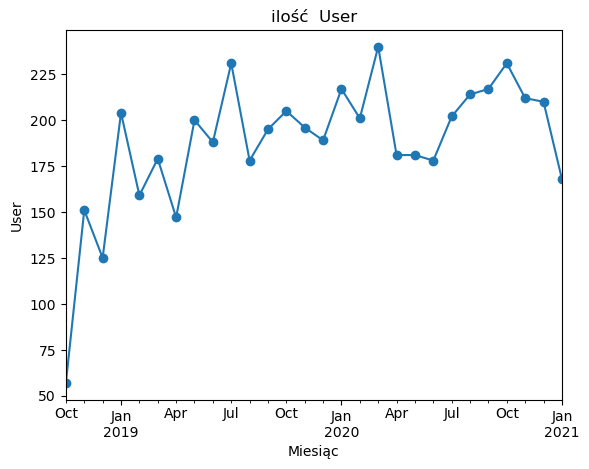

Csee
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03    240
2020-04    181
2020-05    181
2020-06    178
2020-07    202
2020-08    214
2020-09    217
2020-10    231
2020-11    212
2020-12    210
2021-01    168
Freq: M, Name: Csee, dtype: int64


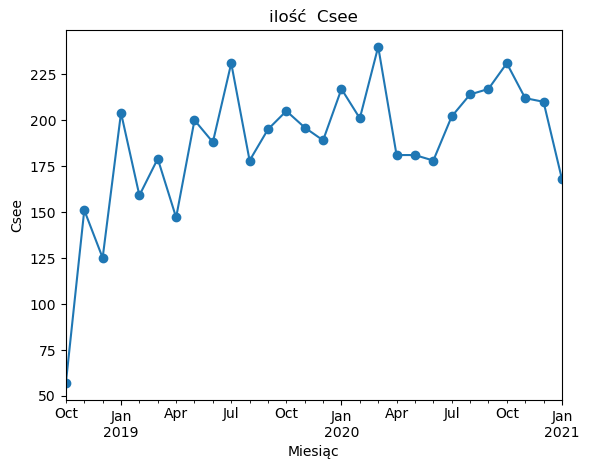

City
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03    240
2020-04    181
2020-05    181
2020-06    178
2020-07    202
2020-08    214
2020-09    217
2020-10    231
2020-11    212
2020-12    210
2021-01    168
Freq: M, Name: City, dtype: int64


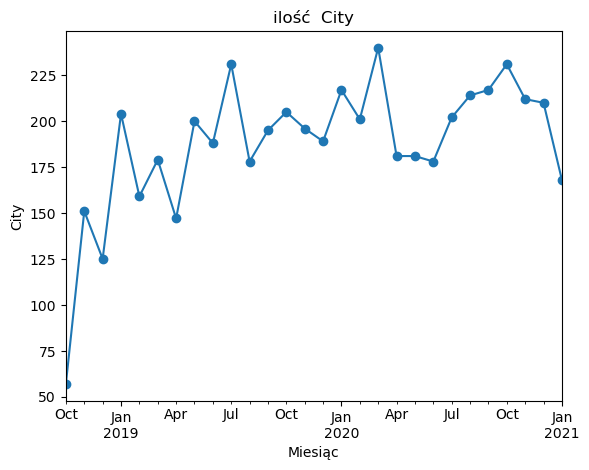

Posta Code
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03    240
2020-04    181
2020-05    181
2020-06    178
2020-07    202
2020-08    214
2020-09    217
2020-10    231
2020-11    212
2020-12    210
2021-01    168
Freq: M, Name: Posta Code, dtype: int64


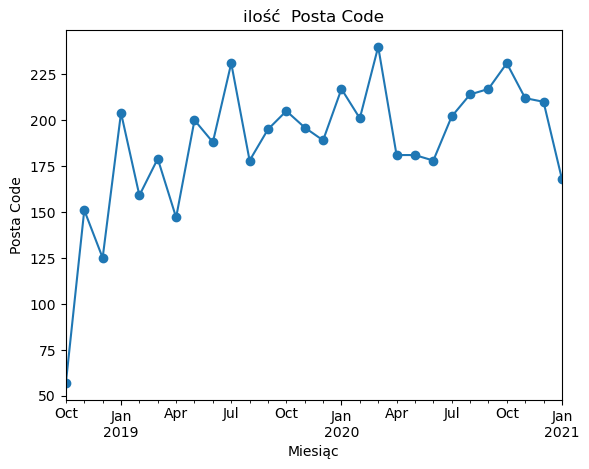

CntryD
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03    240
2020-04    181
2020-05    181
2020-06    178
2020-07    202
2020-08    214
2020-09    217
2020-10    231
2020-11    212
2020-12    210
2021-01    168
Freq: M, Name: CntryD, dtype: int64


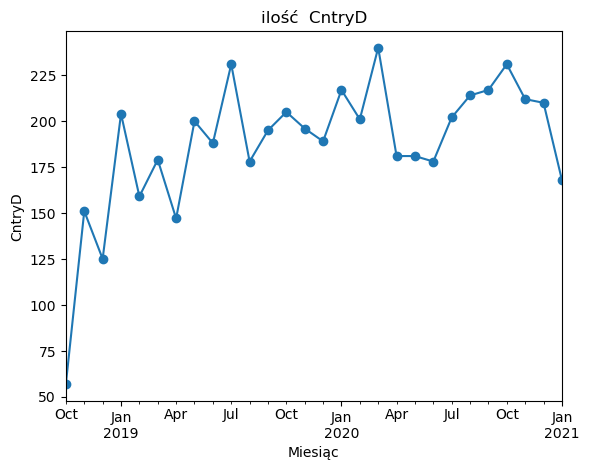

Type of transport
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03    240
2020-04    181
2020-05    181
2020-06    178
2020-07    202
2020-08    214
2020-09    217
2020-10    231
2020-11    212
2020-12    210
2021-01    168
Freq: M, Name: Type of transport, dtype: int64


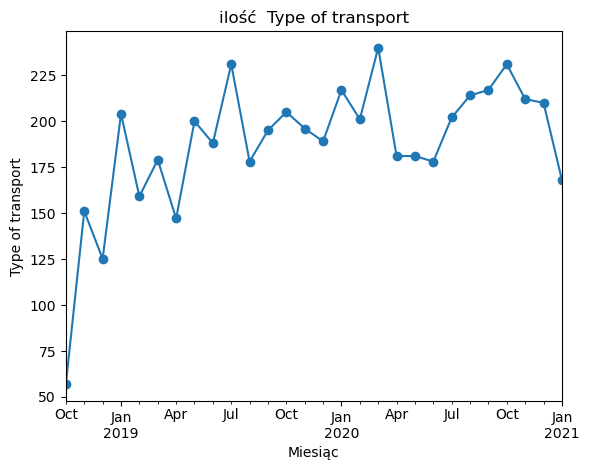

Forwarder
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03    240
2020-04    181
2020-05    181
2020-06    178
2020-07    202
2020-08    214
2020-09    217
2020-10    231
2020-11    212
2020-12    210
2021-01    168
Freq: M, Name: Forwarder, dtype: int64


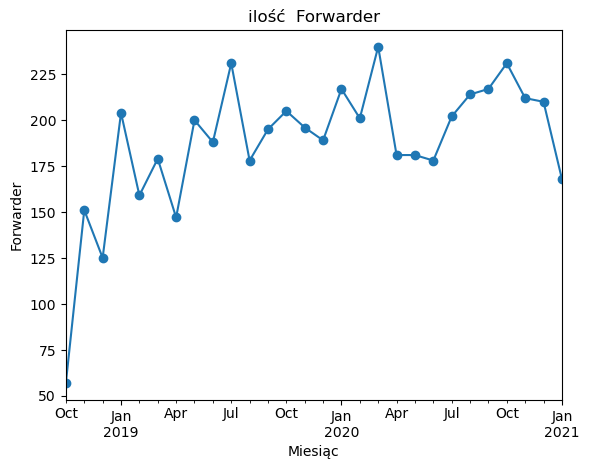

Incoterms
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03    240
2020-04    181
2020-05    181
2020-06    178
2020-07    202
2020-08    214
2020-09    217
2020-10    231
2020-11    212
2020-12    210
2021-01    168
Freq: M, Name: Incoterms, dtype: int64


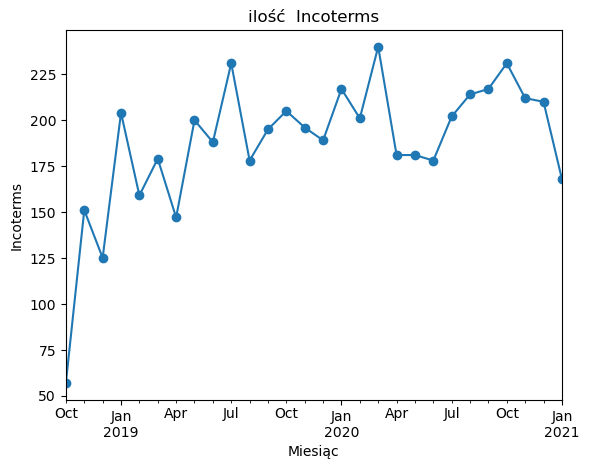

In [32]:
for label in non_date_list:
    monthly_data = df.groupby(df['Disp. dt.'].dt.to_period('M'))[label].count()
    monthly_data.plot(kind='line', marker='o')
    print(label)
    print(monthly_data)
    # Ustawienie etykiet i tytułu
    plt.xlabel('Miesiąc')
    plt.ylabel( label)
    plt.title('ilość  ' +label)

    # Wyświetlenie wykresu
    plt.show()

distance
Disp. dt.
2018-10    5619.719298
2018-11    6187.378252
2018-12    5858.100928
2019-01    5901.892725
2019-02    6034.453560
2019-03    5554.830257
2019-04    5970.776299
2019-05    5916.066160
2019-06    6450.190064
2019-07    7039.226615
2019-08    6026.587730
2019-09    5885.900595
2019-10    5464.778615
2019-11    6089.347347
2019-12    6258.063915
2020-01    5557.470415
2020-02    6233.433234
2020-03    5721.494567
2020-04    5767.266917
2020-05    6232.592044
2020-06    6242.616067
2020-07    5715.392594
2020-08    5617.555907
2020-09    6044.955853
2020-10    5642.179498
2020-11    5872.640623
2020-12    5755.606800
2021-01    6352.464762
Freq: M, Name: distance, dtype: float64


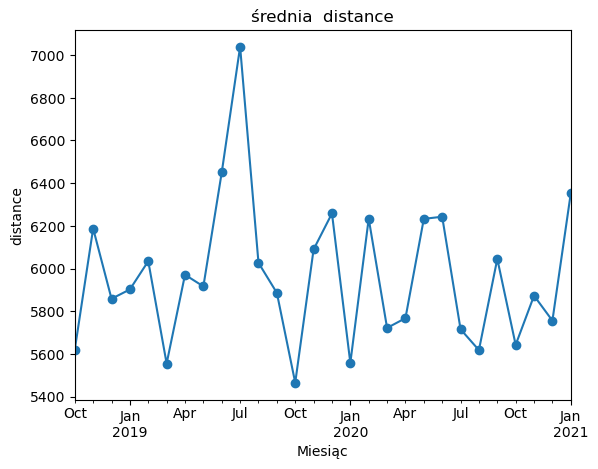

Total freight cost EUR
Disp. dt.
2018-10     246.878947
2018-11     344.693576
2018-12     301.749840
2019-01     218.326569
2019-02     234.348994
2019-03     224.090503
2019-04     286.605170
2019-05     229.230450
2019-06     252.925426
2019-07     252.941212
2019-08     236.686742
2019-09     241.297795
2019-10     259.778829
2019-11     282.165408
2019-12     232.477143
2020-01     192.352581
2020-02     232.508060
2020-03     207.100375
2020-04     222.804254
2020-05     250.573978
2020-06     286.174551
2020-07     303.030446
2020-08     829.384252
2020-09    1035.973871
2020-10    1069.918788
2020-11     861.234009
2020-12     859.033238
2021-01     893.932143
Freq: M, Name: Total freight cost EUR, dtype: float64


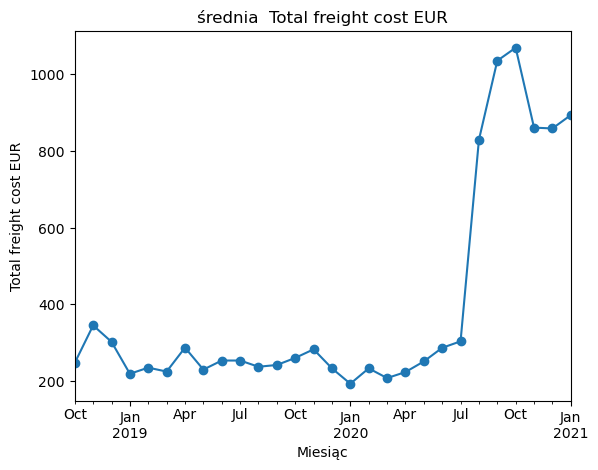

Total gross kg
Disp. dt.
2018-10    168.554386
2018-11    391.938298
2018-12    176.893768
2019-01    153.966181
2019-02    150.240799
2019-03    146.265279
2019-04    177.961150
2019-05    171.655775
2019-06     99.525793
2019-07    129.492857
2019-08    151.250067
2019-09    166.820503
2019-10    173.872629
2019-11    299.669541
2019-12    172.433392
2020-01    157.594157
2020-02    170.243463
2020-03    209.967433
2020-04    189.745017
2020-05    210.939558
2020-06    251.623348
2020-07    209.989109
2020-08    120.281528
2020-09    185.965641
2020-10    147.735277
2020-11    151.677316
2020-12    213.871738
2021-01    156.717095
Freq: M, Name: Total gross kg, dtype: float64


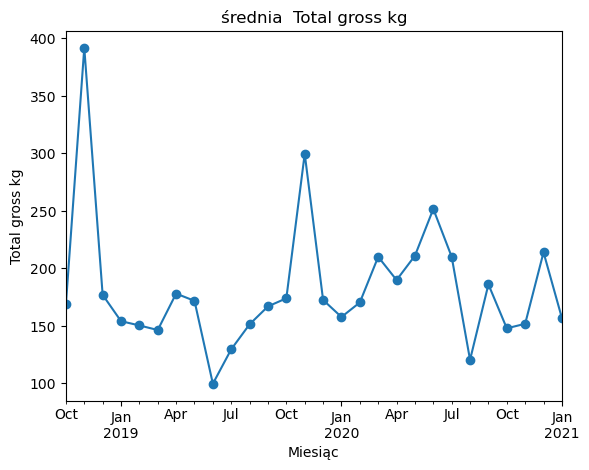

Volume m3
Disp. dt.
2018-10    30.601754
2018-11    27.264702
2018-12    33.501840
2019-01    27.596912
2019-02    31.356730
2019-03    28.638380
2019-04    29.103946
2019-05    26.298150
2019-06    31.008830
2019-07    28.636017
2019-08    31.283989
2019-09    26.668872
2019-10    31.598878
2019-11    29.033418
2019-12    27.145942
2020-01    28.259217
2020-02    27.215920
2020-03    30.583375
2020-04    29.491934
2020-05    30.565801
2020-06    28.439831
2020-07    30.797723
2020-08    30.909486
2020-09    28.715530
2020-10    29.293680
2020-11    29.639340
2020-12    28.196000
2021-01    70.336369
Freq: M, Name: Volume m3, dtype: float64


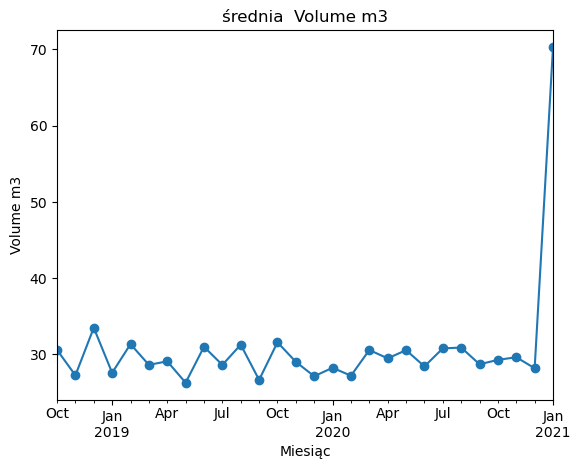

User
Disp. dt.
2018-10    0.000000
2018-11    0.000000
2018-12    0.000000
2019-01    0.000000
2019-02    0.000000
2019-03    0.000000
2019-04    0.000000
2019-05    0.000000
2019-06    0.000000
2019-07    0.000000
2019-08    0.000000
2019-09    0.000000
2019-10    0.029268
2019-11    0.066327
2019-12    0.074074
2020-01    0.073733
2020-02    0.069652
2020-03    0.054167
2020-04    0.093923
2020-05    0.099448
2020-06    0.117978
2020-07    0.079208
2020-08    0.060748
2020-09    0.082949
2020-10    0.056277
2020-11    0.080189
2020-12    0.080952
2021-01    0.089286
Freq: M, Name: User, dtype: float64


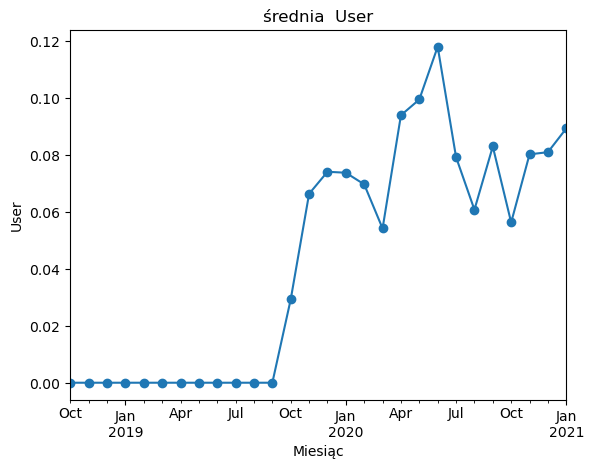

Csee
Disp. dt.
2018-10    2.631579
2018-11    2.350993
2018-12    2.568000
2019-01    2.431373
2019-02    2.207547
2019-03    2.653631
2019-04    2.428571
2019-05    2.485000
2019-06    2.313830
2019-07    1.917749
2019-08    2.275281
2019-09    2.276923
2019-10    2.517073
2019-11    2.673469
2019-12    2.582011
2020-01    2.935484
2020-02    2.482587
2020-03    2.720833
2020-04    3.281768
2020-05    3.000000
2020-06    2.887640
2020-07    2.752475
2020-08    2.584112
2020-09    2.456221
2020-10    2.588745
2020-11    2.735849
2020-12    2.976190
2021-01    2.827381
Freq: M, Name: Csee, dtype: float64


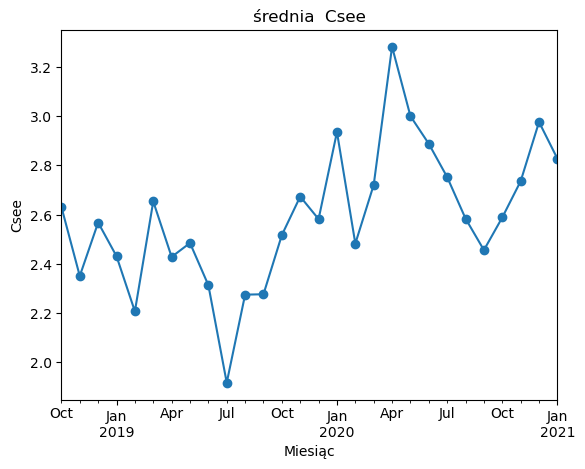

City
Disp. dt.
2018-10    4.491228
2018-11    4.152318
2018-12    4.464000
2019-01    4.240196
2019-02    4.031447
2019-03    4.519553
2019-04    4.285714
2019-05    4.370000
2019-06    4.031915
2019-07    3.580087
2019-08    4.106742
2019-09    4.087179
2019-10    4.341463
2019-11    4.520408
2019-12    4.349206
2020-01    4.824885
2020-02    4.268657
2020-03    4.566667
2020-04    5.143646
2020-05    4.823204
2020-06    4.735955
2020-07    4.648515
2020-08    4.462617
2020-09    4.327189
2020-10    4.532468
2020-11    4.617925
2020-12    4.909524
2021-01    4.702381
Freq: M, Name: City, dtype: float64


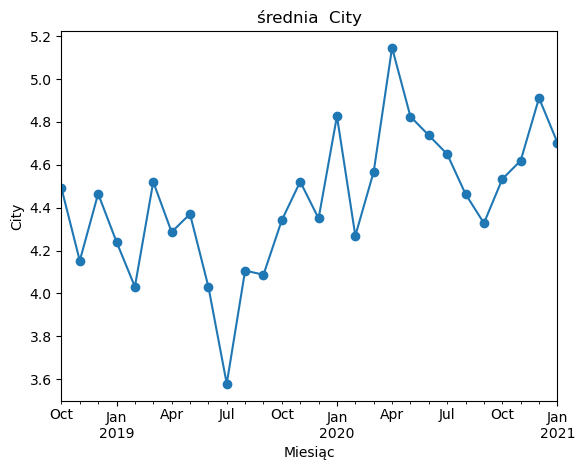

Posta Code
Disp. dt.
2018-10    31.649123
2018-11    30.655629
2018-12    32.056000
2019-01    30.921569
2019-02    30.207547
2019-03    31.770950
2019-04    31.761905
2019-05    30.745000
2019-06    27.361702
2019-07    25.229437
2019-08    28.724719
2019-09    28.589744
2019-10    29.063415
2019-11    29.127551
2019-12    28.899471
2020-01    30.529954
2020-02    28.661692
2020-03    29.833333
2020-04    31.204420
2020-05    29.928177
2020-06    29.696629
2020-07    30.282178
2020-08    30.074766
2020-09    29.894009
2020-10    30.666667
2020-11    30.042453
2020-12    31.409524
2021-01    30.339286
Freq: M, Name: Posta Code, dtype: float64


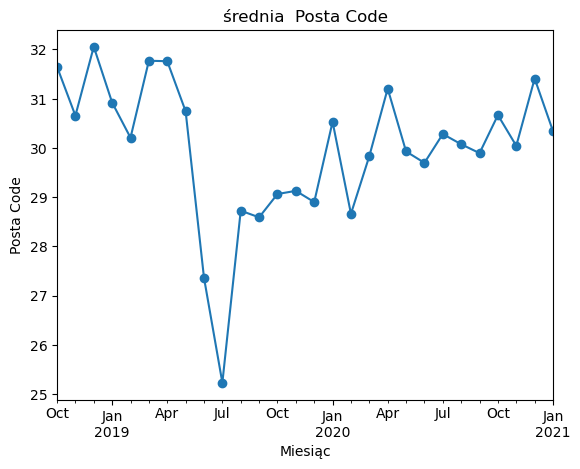

CntryD
Disp. dt.
2018-10    1.649123
2018-11    1.490066
2018-12    1.624000
2019-01    1.583333
2019-02    1.496855
2019-03    1.715084
2019-04    1.598639
2019-05    1.635000
2019-06    1.484043
2019-07    1.277056
2019-08    1.522472
2019-09    1.528205
2019-10    1.663415
2019-11    1.693878
2019-12    1.650794
2020-01    1.847926
2020-02    1.606965
2020-03    1.758333
2020-04    1.977901
2020-05    1.845304
2020-06    1.797753
2020-07    1.767327
2020-08    1.705607
2020-09    1.635945
2020-10    1.701299
2020-11    1.759434
2020-12    1.871429
2021-01    1.767857
Freq: M, Name: CntryD, dtype: float64


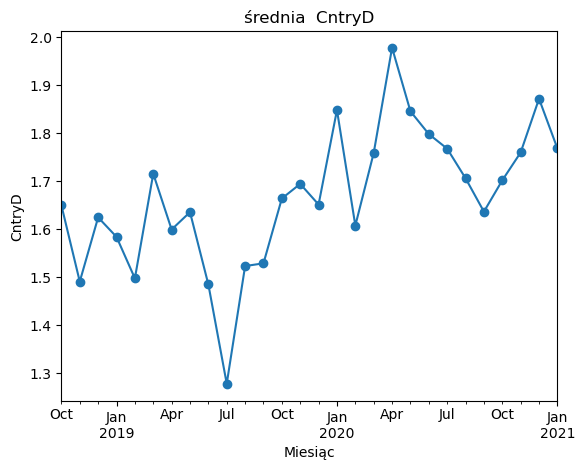

Type of transport
Disp. dt.
2018-10    0.666667
2018-11    0.635762
2018-12    0.528000
2019-01    0.691176
2019-02    0.610063
2019-03    0.631285
2019-04    0.721088
2019-05    0.685000
2019-06    0.569149
2019-07    0.510823
2019-08    0.634831
2019-09    0.620513
2019-10    0.741463
2019-11    0.770408
2019-12    0.910053
2020-01    1.018433
2020-02    0.825871
2020-03    0.904167
2020-04    0.939227
2020-05    0.828729
2020-06    0.668539
2020-07    0.747525
2020-08    0.588785
2020-09    0.682028
2020-10    0.545455
2020-11    0.872642
2020-12    0.790476
2021-01    0.642857
Freq: M, Name: Type of transport, dtype: float64


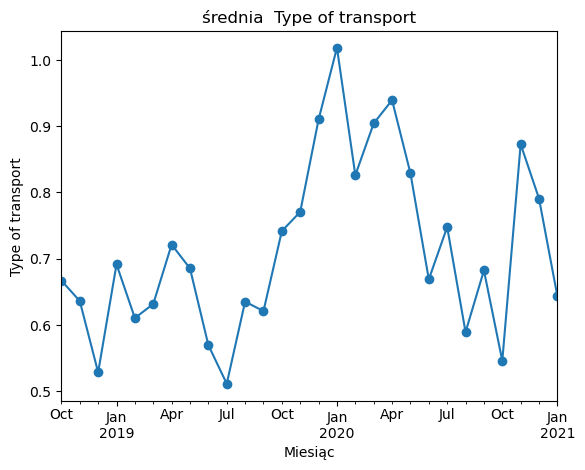

Forwarder
Disp. dt.
2018-10    2.456140
2018-11    2.615894
2018-12    2.320000
2019-01    2.338235
2019-02    2.238994
2019-03    2.391061
2019-04    2.537415
2019-05    2.380000
2019-06    1.765957
2019-07    1.835498
2019-08    2.151685
2019-09    2.194872
2019-10    2.365854
2019-11    2.250000
2019-12    2.354497
2020-01    2.253456
2020-02    2.343284
2020-03    2.387500
2020-04    2.414365
2020-05    2.530387
2020-06    2.331461
2020-07    2.193069
2020-08    2.037383
2020-09    2.124424
2020-10    2.549784
2020-11    2.533019
2020-12    2.452381
2021-01    2.196429
Freq: M, Name: Forwarder, dtype: float64


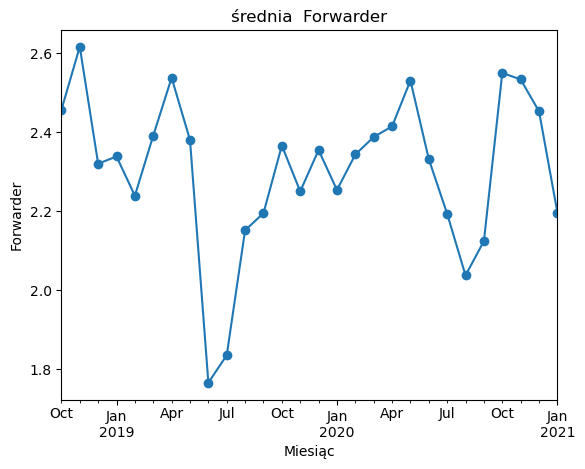

Incoterms
Disp. dt.
2018-10    0.157895
2018-11    0.271523
2018-12    0.272000
2019-01    0.220588
2019-02    0.213836
2019-03    0.223464
2019-04    0.646259
2019-05    1.290000
2019-06    0.819149
2019-07    1.038961
2019-08    1.207865
2019-09    1.200000
2019-10    1.121951
2019-11    1.025510
2019-12    1.132275
2020-01    0.903226
2020-02    1.159204
2020-03    0.700000
2020-04    0.314917
2020-05    0.381215
2020-06    0.320225
2020-07    0.262376
2020-08    0.196262
2020-09    0.230415
2020-10    0.246753
2020-11    0.250000
2020-12    0.238095
2021-01    0.375000
Freq: M, Name: Incoterms, dtype: float64


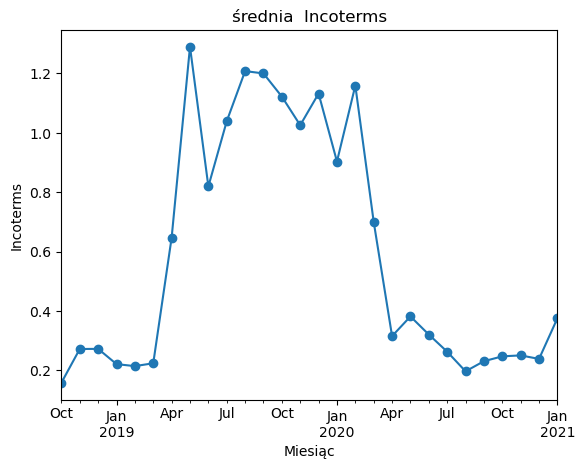

In [33]:
for label in non_date_list:
    monthly_data = df.groupby(df['Disp. dt.'].dt.to_period('M'))[label].mean()
    monthly_data.plot(kind='line', marker='o')
    print(label)
    print(monthly_data)
    # Ustawienie etykiet i tytułu
    plt.xlabel('Miesiąc')
    plt.ylabel( label)
    plt.title('średnia  ' +label)

    # Wyświetlenie wykresu
    plt.show()

In [34]:
for label in non_date_list:
    monthly_data = df.groupby(df['Disp. dt.'].dt.to_period('M'))[label].mean()
    print(label + " średnia")
    print(monthly_data)
    print("\n")
    
    monthly_data = df.groupby(df['Disp. dt.'].dt.to_period('M'))[label].count()
    print(label + " ilość")
    print(monthly_data)
    print("\n")
    
    monthly_data = df.groupby(df['Disp. dt.'].dt.to_period('M'))[label].sum()
    print(label + " suma")
    print(monthly_data)
    print("\n")


distance średnia
Disp. dt.
2018-10    5619.719298
2018-11    6187.378252
2018-12    5858.100928
2019-01    5901.892725
2019-02    6034.453560
2019-03    5554.830257
2019-04    5970.776299
2019-05    5916.066160
2019-06    6450.190064
2019-07    7039.226615
2019-08    6026.587730
2019-09    5885.900595
2019-10    5464.778615
2019-11    6089.347347
2019-12    6258.063915
2020-01    5557.470415
2020-02    6233.433234
2020-03    5721.494567
2020-04    5767.266917
2020-05    6232.592044
2020-06    6242.616067
2020-07    5715.392594
2020-08    5617.555907
2020-09    6044.955853
2020-10    5642.179498
2020-11    5872.640623
2020-12    5755.606800
2021-01    6352.464762
Freq: M, Name: distance, dtype: float64


distance ilość
Disp. dt.
2018-10     57
2018-11    151
2018-12    125
2019-01    204
2019-02    159
2019-03    179
2019-04    147
2019-05    200
2019-06    188
2019-07    231
2019-08    178
2019-09    195
2019-10    205
2019-11    196
2019-12    189
2020-01    217
2020-02    201
2020-03



# Analiza jaką wielkości przesyłki jest wysyłana w zależności od rodzaju transportu i destynacji i jak to wpływa na koszt transportu


In [35]:
non_transport_list = ['distance', 'Total freight cost EUR', 'Total gross kg', 'Volume m3', 'User', 'Csee', 'City', 'Posta Code', 'CntryD', 'Type of transport', 'Forwarder', 'Incoterms']

In [36]:
grouped_data = df.groupby(by='Type of transport')[label].mean()

for label in non_transport_list:
    data_transport = df.groupby(by='Type of transport')[label].mean()
    print(label + " średnia")
    print(data_transport)
    print("\n")
    
    data_transport = df.groupby(by='Type of transport')[label].median()
    print(label + " max")
    print(data_transport)
    print("\n")
    
    data_transport = df.groupby(by='Type of transport')[label].count()
    print(label + " ilość")
    print(data_transport)
    print("\n")
    
    data_transport = df.groupby(by='Type of transport')[label].sum()
    print(label + " suma")
    print(data_transport)
    print("\n")
    
    data_transport = df.groupby(by='Type of transport')[label].min()
    print(label + " min")
    print(data_transport)
    print("\n")
    
    data_transport = df.groupby(by='Type of transport')[label].max()
    print(label + " max")
    print(data_transport)
    print("\n")

distance średnia
Type of transport
0     6367.995981
1    12174.563409
2     7548.000000
3     2467.412869
Name: distance, dtype: float64


distance max
Type of transport
0    6812.0
1    7639.5
2    7548.0
3    1667.0
Name: distance, dtype: float64


distance ilość
Type of transport
0    3732
1     386
2      19
3    1119
Name: distance, dtype: int64


distance suma
Type of transport
0    2.376536e+07
1    4.699381e+06
2    1.434120e+05
3    2.761035e+06
Name: distance, dtype: float64


distance min
Type of transport
0     995.0
1    7639.5
2    7548.0
3    1667.0
Name: distance, dtype: float64


distance max
Type of transport
0     9983.000
1    23442.616
2     7548.000
3    10448.000
Name: distance, dtype: float64


Total freight cost EUR średnia
Type of transport
0    461.563853
1    970.457176
2    384.180000
3     49.645299
Name: Total freight cost EUR, dtype: float64


Total freight cost EUR max
Type of transport
0    114.96
1    638.60
2    333.00
3     15.13
Name: Total freigh

distance    suma
Type of transport
0     6367.995981
1    12174.563409
2     7548.000000
3     2467.412869
Name: distance, dtype: float64


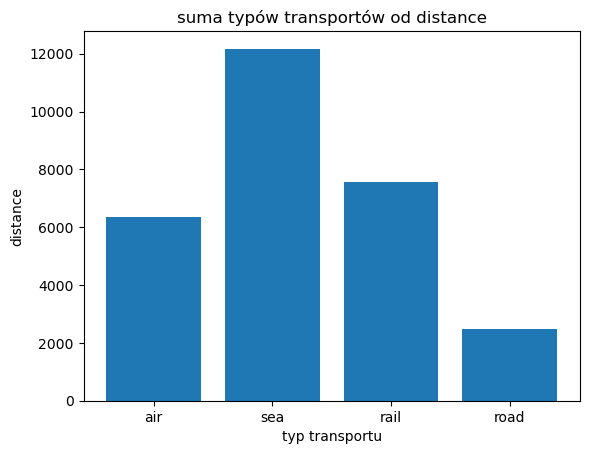

Total freight cost EUR    suma
Type of transport
0    461.563853
1    970.457176
2    384.180000
3     49.645299
Name: Total freight cost EUR, dtype: float64


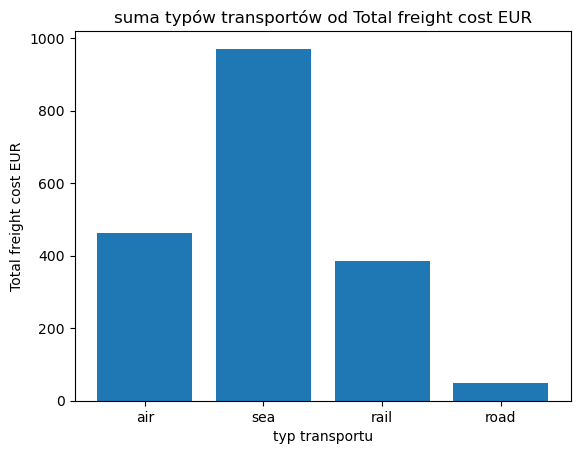

Total gross kg    suma
Type of transport
0      87.165899
1    1395.905492
2     770.368421
3      63.732250
Name: Total gross kg, dtype: float64


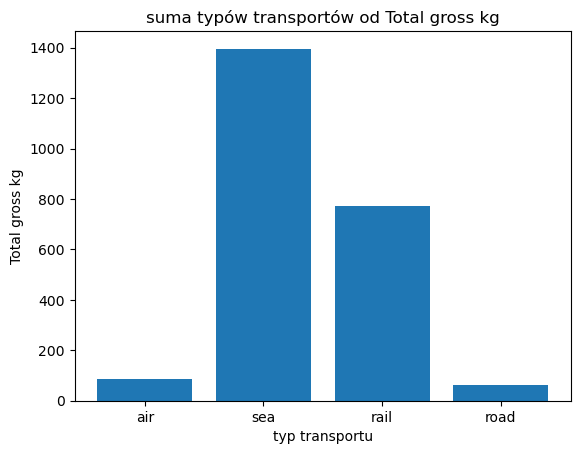

Volume m3    suma
Type of transport
0    31.349689
1    30.485940
2    31.064737
3    27.897033
Name: Volume m3, dtype: float64


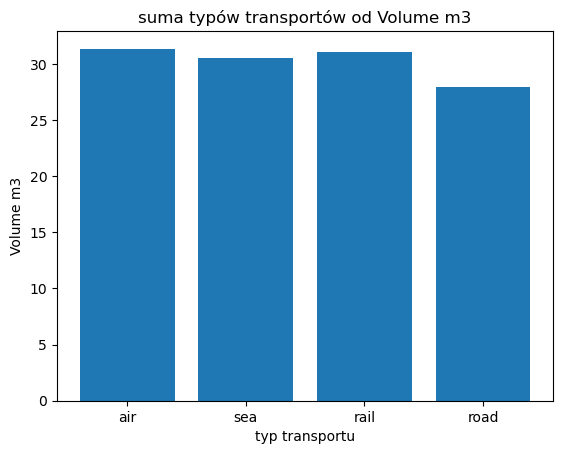

User    suma
Type of transport
0    0.013934
1    0.191710
2    1.000000
3    0.085791
Name: User, dtype: float64


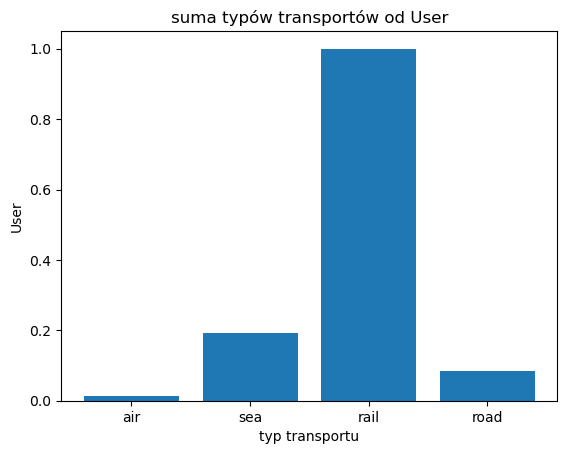

Csee    suma
Type of transport
0    1.964630
1    1.854922
2    4.000000
3    4.908847
Name: Csee, dtype: float64


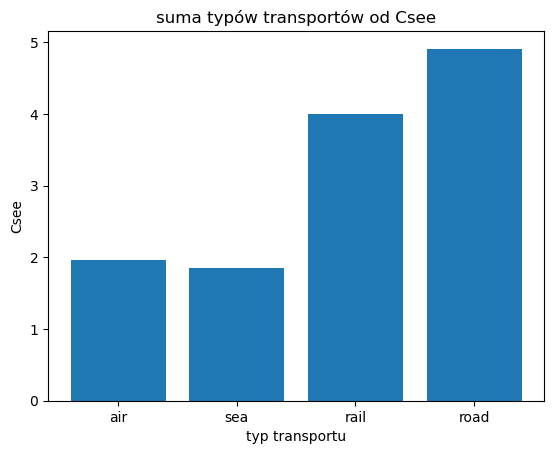

City    suma
Type of transport
0    3.743033
1    3.847150
2    6.000000
3    6.908847
Name: City, dtype: float64


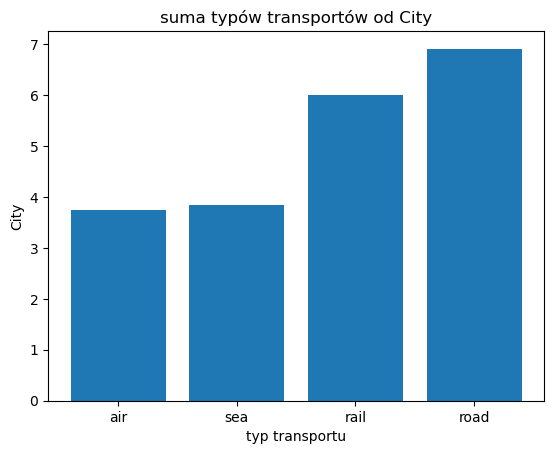

Posta Code    suma
Type of transport
0    27.927385
1    30.984456
2    34.000000
3    35.832887
Name: Posta Code, dtype: float64


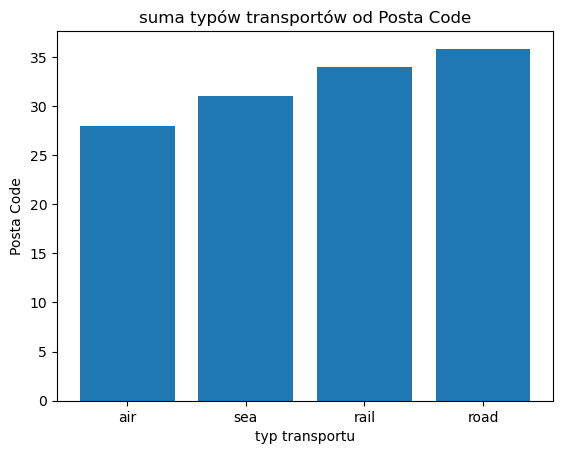

CntryD    suma
Type of transport
0    1.334941
1    1.284974
2    2.000000
3    2.908847
Name: CntryD, dtype: float64


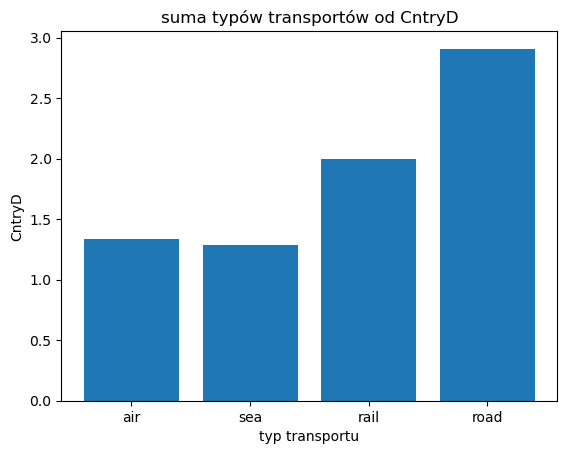

Type of transport    suma
Type of transport
0    0.0
1    1.0
2    2.0
3    3.0
Name: Type of transport, dtype: float64


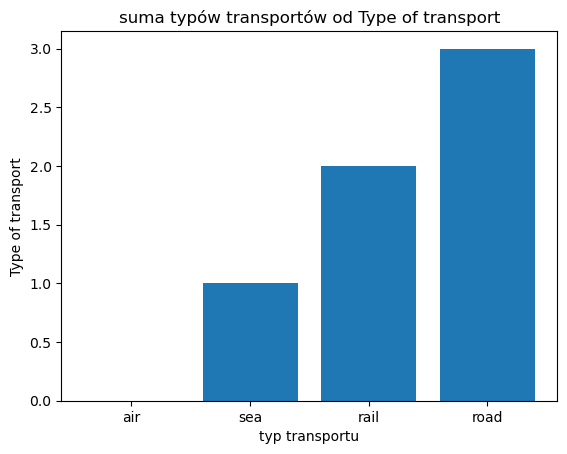

Forwarder    suma
Type of transport
0    1.921758
1    3.424870
2    2.000000
3    3.158177
Name: Forwarder, dtype: float64


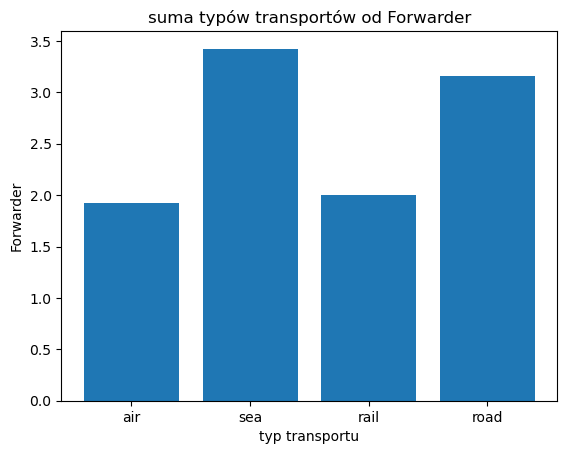

Incoterms    suma
Type of transport
0    0.549303
1    2.712435
2    5.000000
3    0.000000
Name: Incoterms, dtype: float64


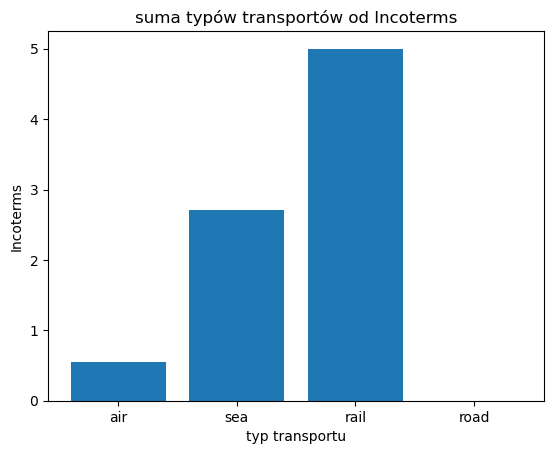

In [37]:
column_use = ['distance', 'Total freight cost EUR', 'Total gross kg', 'Volume m3', 'User', 'Disp. dt.', 'Csee', 'City', 'Posta Code', 'CntryD', 'Type of transport', 'Forwarder', 'Incoterms']
for label in non_date_list:
    grouped_data = df.groupby(by='Type of transport')[label].mean()
    print( label + "    suma")
    print(grouped_data)
    

    plt.bar( grouped_data.index, grouped_data )
    # Dodawanie etykiet i tytułu wykresu
    plt.xlabel('typ transportu')
    plt.ylabel(label)
    plt.title('suma typów transportów od ' + label)
    plt.xticks(grouped_data.index, ['air', 'sea', 'rail', 'road'])
    # Wyświetlanie wykresu
    plt.show()


distance    mean
Type of transport
0     6367.995981
1    12174.563409
2     7548.000000
3     2467.412869
Name: distance, dtype: float64


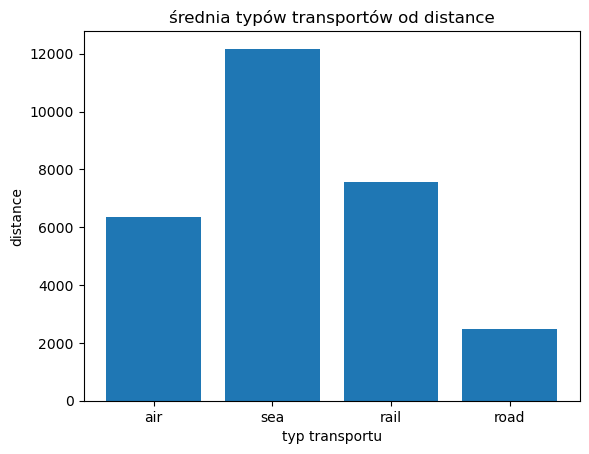

Total freight cost EUR    mean
Type of transport
0    461.563853
1    970.457176
2    384.180000
3     49.645299
Name: Total freight cost EUR, dtype: float64


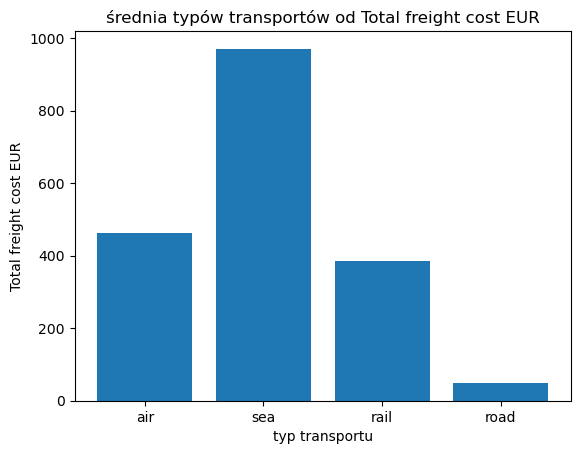

Total gross kg    mean
Type of transport
0      87.165899
1    1395.905492
2     770.368421
3      63.732250
Name: Total gross kg, dtype: float64


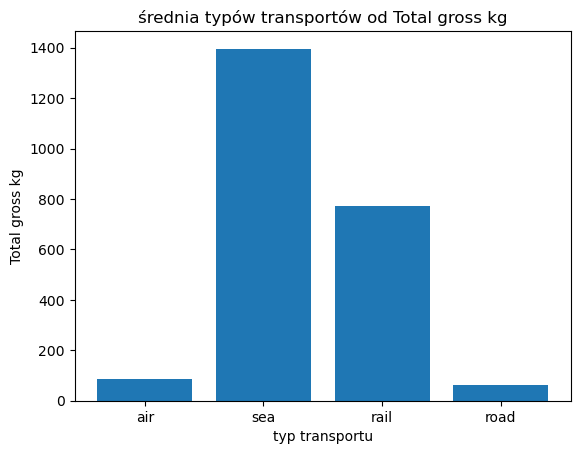

Volume m3    mean
Type of transport
0    31.349689
1    30.485940
2    31.064737
3    27.897033
Name: Volume m3, dtype: float64


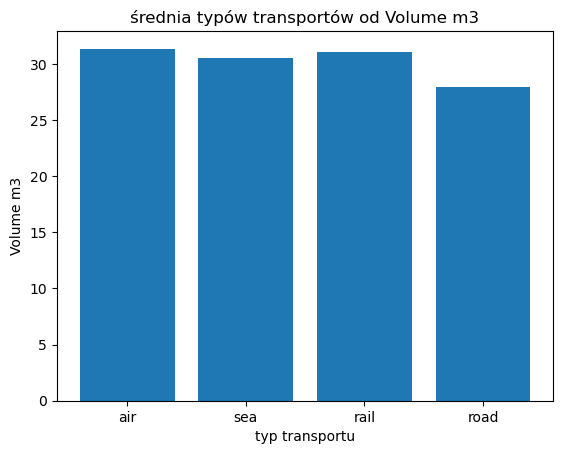

User    mean
Type of transport
0    0.013934
1    0.191710
2    1.000000
3    0.085791
Name: User, dtype: float64


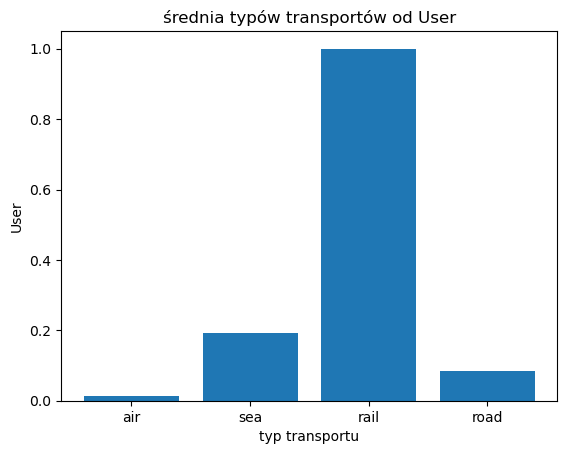

Csee    mean
Type of transport
0    1.964630
1    1.854922
2    4.000000
3    4.908847
Name: Csee, dtype: float64


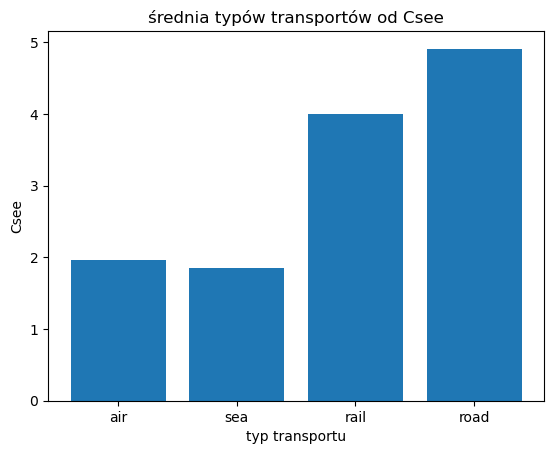

City    mean
Type of transport
0    3.743033
1    3.847150
2    6.000000
3    6.908847
Name: City, dtype: float64


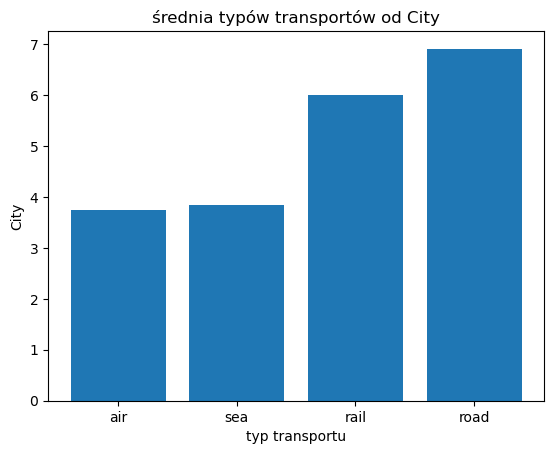

Posta Code    mean
Type of transport
0    27.927385
1    30.984456
2    34.000000
3    35.832887
Name: Posta Code, dtype: float64


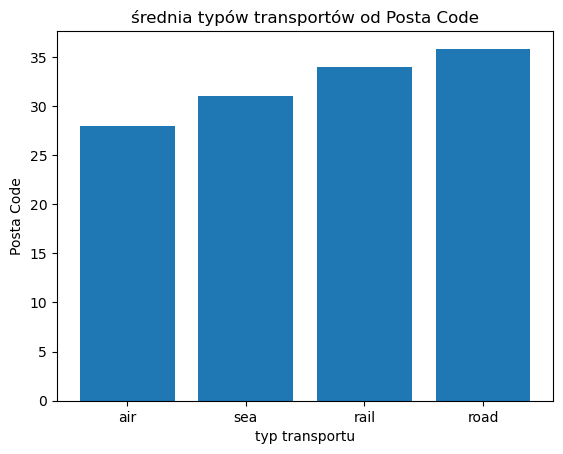

CntryD    mean
Type of transport
0    1.334941
1    1.284974
2    2.000000
3    2.908847
Name: CntryD, dtype: float64


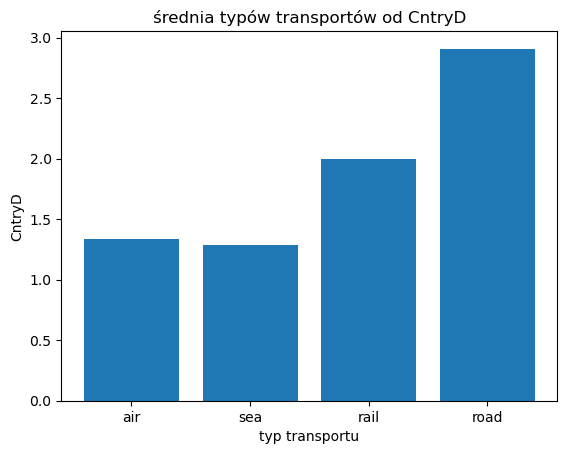

Type of transport    mean
Type of transport
0    0.0
1    1.0
2    2.0
3    3.0
Name: Type of transport, dtype: float64


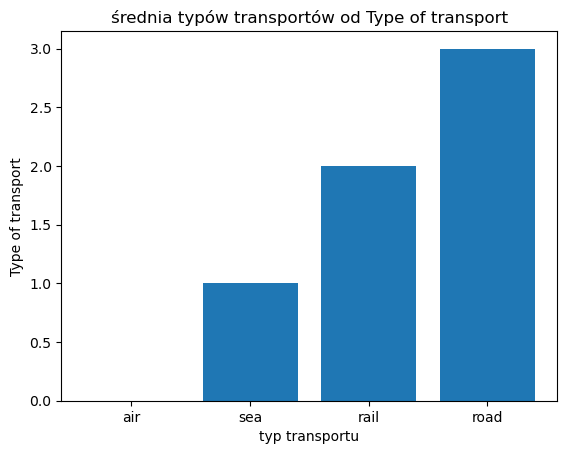

Forwarder    mean
Type of transport
0    1.921758
1    3.424870
2    2.000000
3    3.158177
Name: Forwarder, dtype: float64


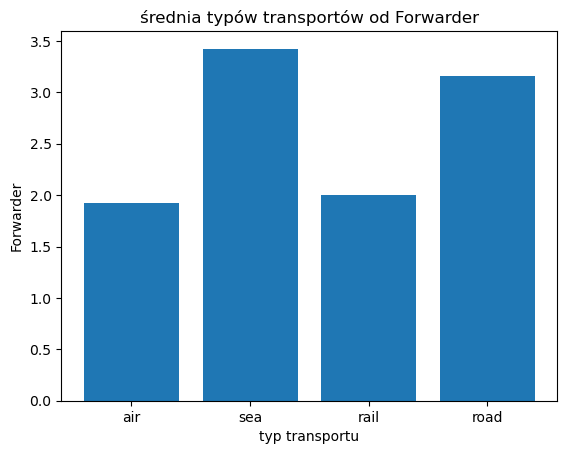

Incoterms    mean
Type of transport
0    0.549303
1    2.712435
2    5.000000
3    0.000000
Name: Incoterms, dtype: float64


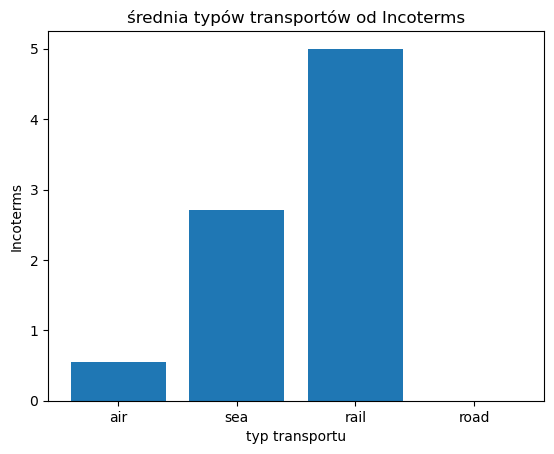

In [38]:

for label in non_date_list:
    grouped_data = df.groupby(by='Type of transport')[label].mean()
    print( label + "    mean")
    print(grouped_data)
    

    plt.bar( grouped_data.index, grouped_data )
    # Dodawanie etykiet i tytułu wykresu
    plt.xlabel('typ transportu')
    plt.ylabel(label)
    plt.title('średnia typów transportów od ' + label)
    plt.xticks(grouped_data.index, ['air', 'sea', 'rail', 'road'])
    # Wyświetlanie wykresu
    plt.show()

distance    count
Type of transport
0    3732
1     386
2      19
3    1119
Name: distance, dtype: int64


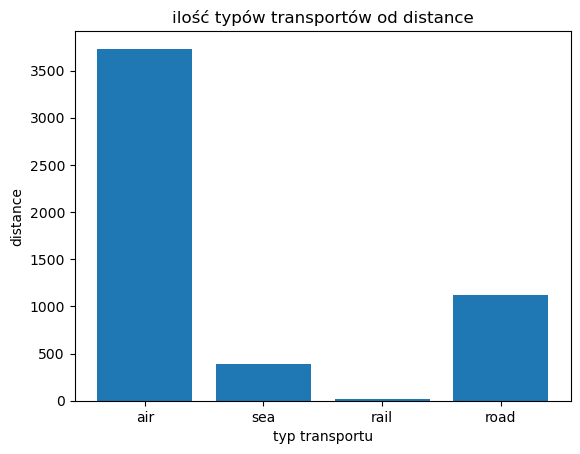

Total freight cost EUR    count
Type of transport
0    3732
1     386
2      19
3    1119
Name: Total freight cost EUR, dtype: int64


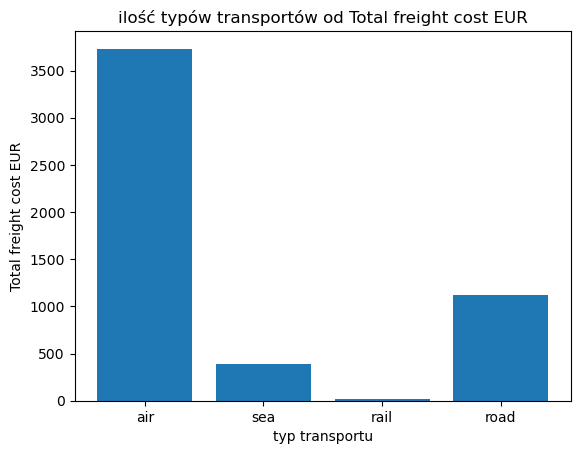

Total gross kg    count
Type of transport
0    3732
1     386
2      19
3    1119
Name: Total gross kg, dtype: int64


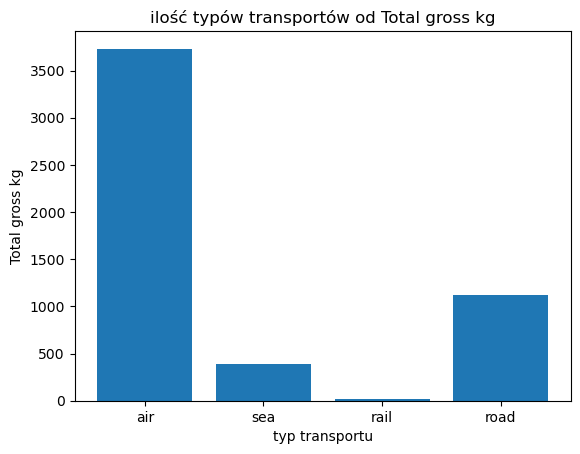

Volume m3    count
Type of transport
0    3732
1     386
2      19
3    1119
Name: Volume m3, dtype: int64


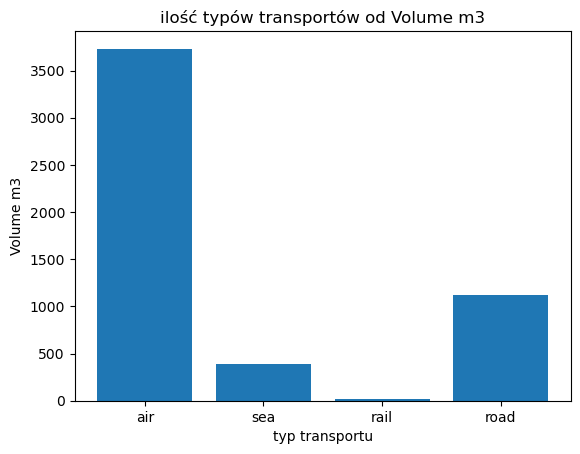

User    count
Type of transport
0    3732
1     386
2      19
3    1119
Name: User, dtype: int64


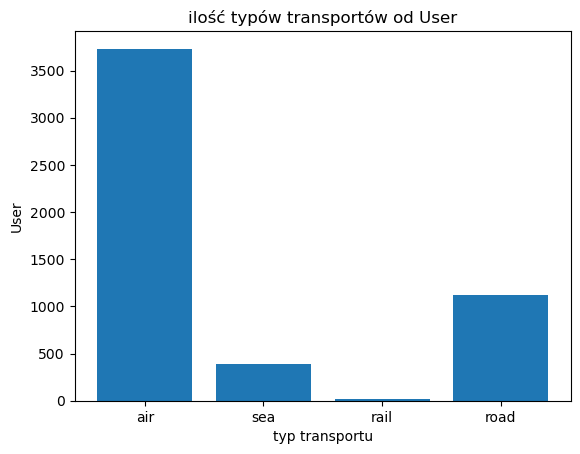

Csee    count
Type of transport
0    3732
1     386
2      19
3    1119
Name: Csee, dtype: int64


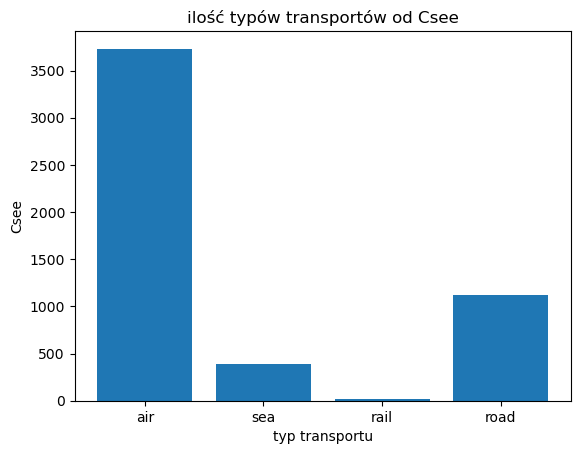

City    count
Type of transport
0    3732
1     386
2      19
3    1119
Name: City, dtype: int64


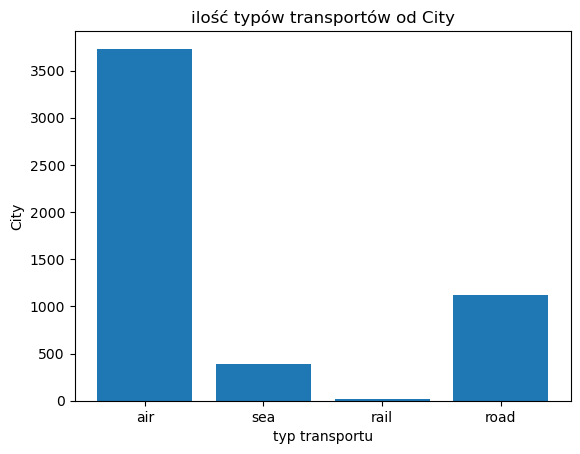

Posta Code    count
Type of transport
0    3732
1     386
2      19
3    1119
Name: Posta Code, dtype: int64


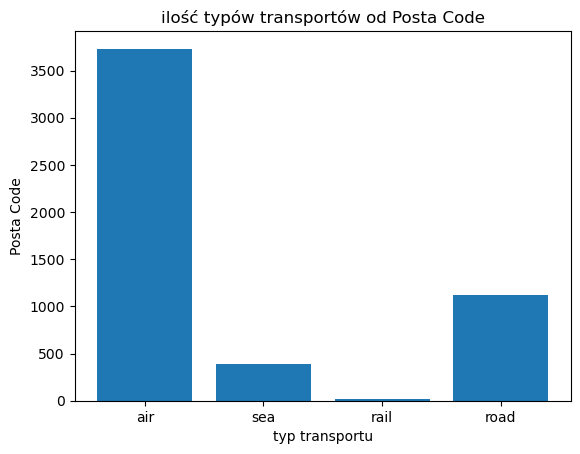

CntryD    count
Type of transport
0    3732
1     386
2      19
3    1119
Name: CntryD, dtype: int64


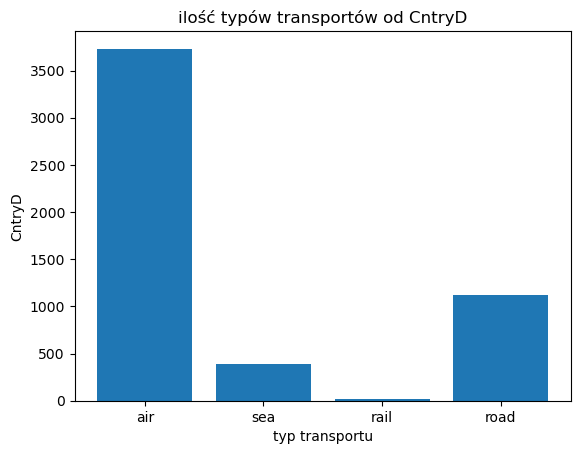

Type of transport    count
Type of transport
0    3732
1     386
2      19
3    1119
Name: Type of transport, dtype: int64


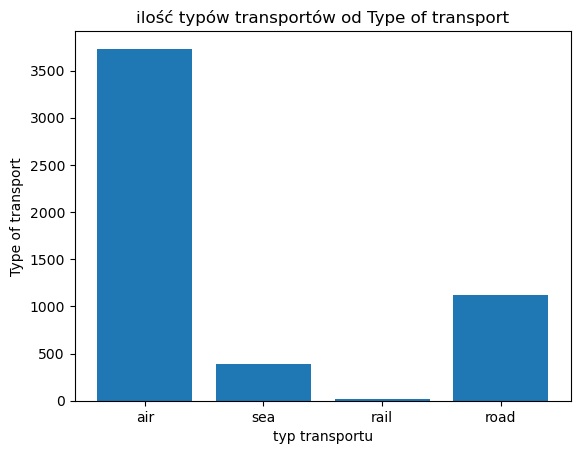

Forwarder    count
Type of transport
0    3732
1     386
2      19
3    1119
Name: Forwarder, dtype: int64


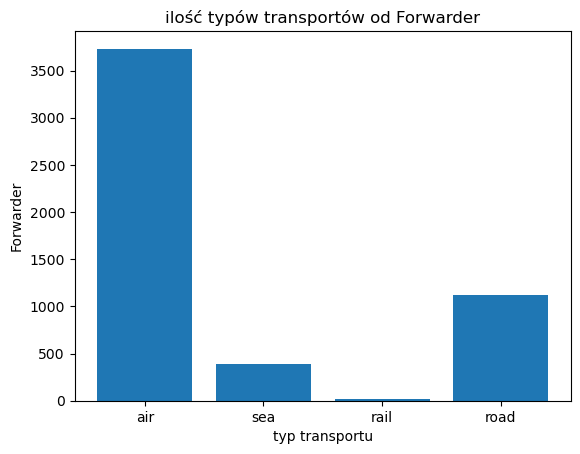

Incoterms    count
Type of transport
0    3732
1     386
2      19
3    1119
Name: Incoterms, dtype: int64


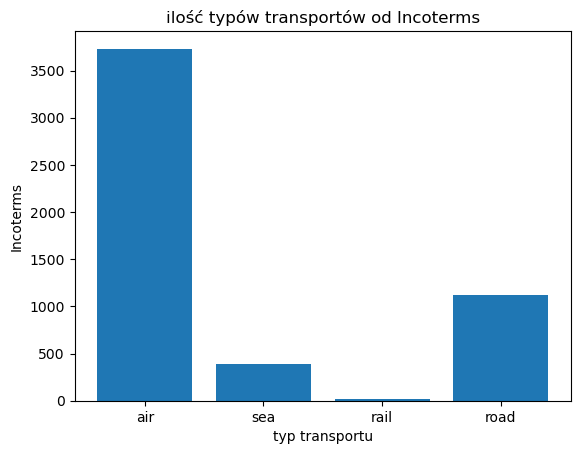

In [39]:

for label in non_date_list:
    grouped_data = df.groupby(by='Type of transport')[label].count()
    print( label + "    count")
    print(grouped_data)
    

    plt.bar( grouped_data.index, grouped_data )
    # Dodawanie etykiet i tytułu wykresu
    plt.xlabel('typ transportu')
    plt.ylabel(label)
    plt.title('ilość typów transportów od ' + label)
    plt.xticks(grouped_data.index, ['air', 'sea', 'rail', 'road'])
    # Wyświetlanie wykresu
    plt.show()

Type of transport
0    325303.136
1    538819.520
2     14637.000
3     71316.388
Name: Total gross kg, dtype: float64


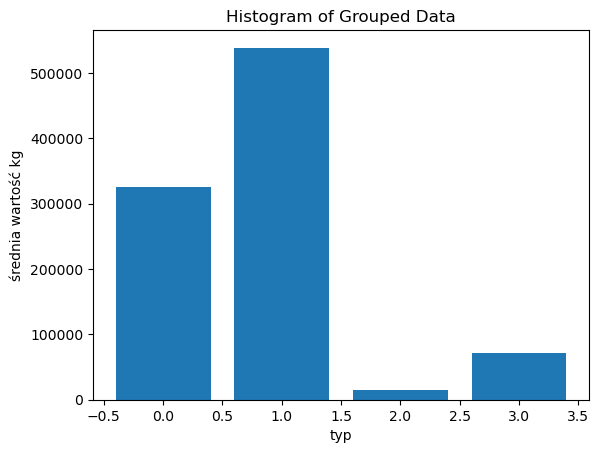

In [40]:
grouped_data = df.groupby(by='Type of transport')['Total gross kg'].sum()
print(grouped_data)


plt.bar( grouped_data.index, grouped_data )

# Dodawanie etykiet i tytułu wykresu
plt.xlabel('typ')
plt.ylabel('średnia wartość kg')
plt.title('Histogram of Grouped Data')

# Wyświetlanie wykresu
plt.show()

Total gross kg ilość
Type of transport
0    3732
1     386
2      19
3    1119
Name: Total gross kg, dtype: int64


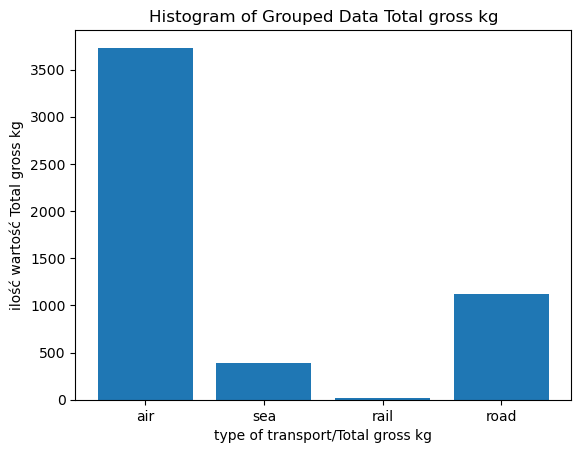

Total gross kg średnia
Type of transport
0      87.165899
1    1395.905492
2     770.368421
3      63.732250
Name: Total gross kg, dtype: float64


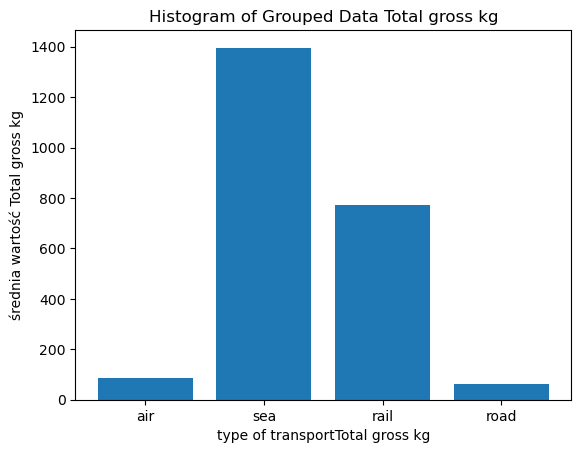

Total gross kgsumaryczna
Type of transport
0    325303.136
1    538819.520
2     14637.000
3     71316.388
Name: Total gross kg, dtype: float64


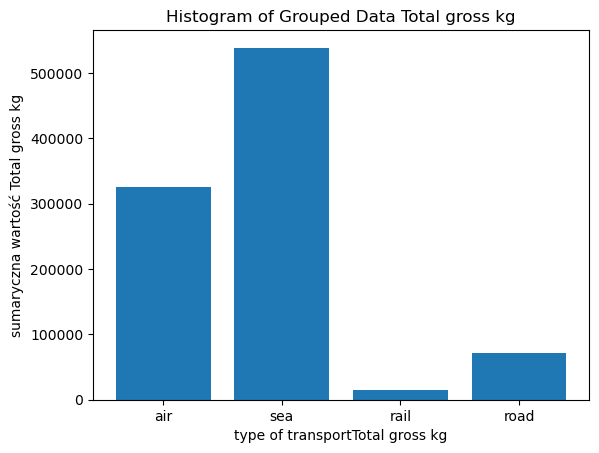

Total gross kg min
Type of transport
0     0.050
1     0.120
2    94.000
3     0.085
Name: Total gross kg, dtype: float64


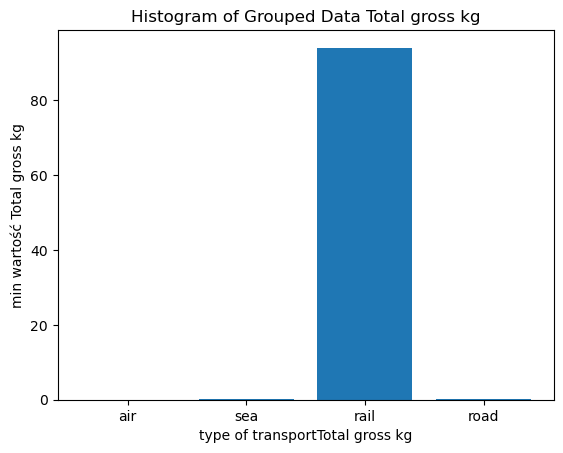

Total gross kg max
Type of transport
0     2366.0
1    26988.1
2     2502.0
3     2756.0
Name: Total gross kg, dtype: float64


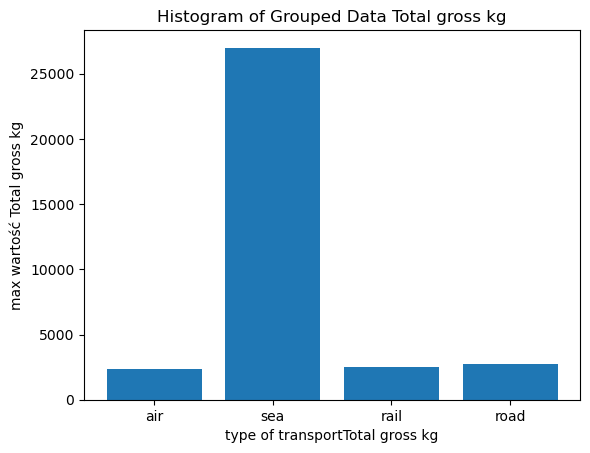

Volume m3 ilość
Type of transport
0    3732
1     386
2      19
3    1119
Name: Volume m3, dtype: int64


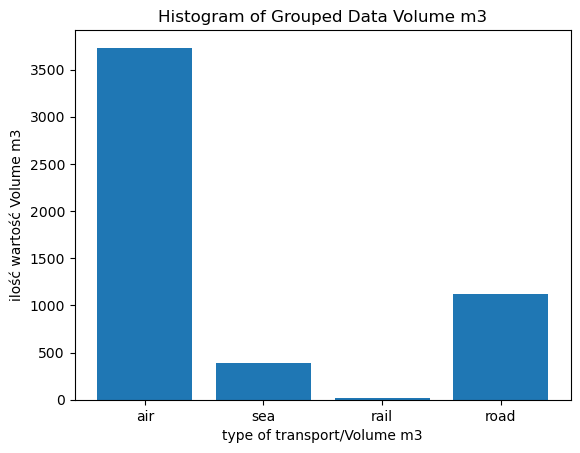

Volume m3 średnia
Type of transport
0    31.349689
1    30.485940
2    31.064737
3    27.897033
Name: Volume m3, dtype: float64


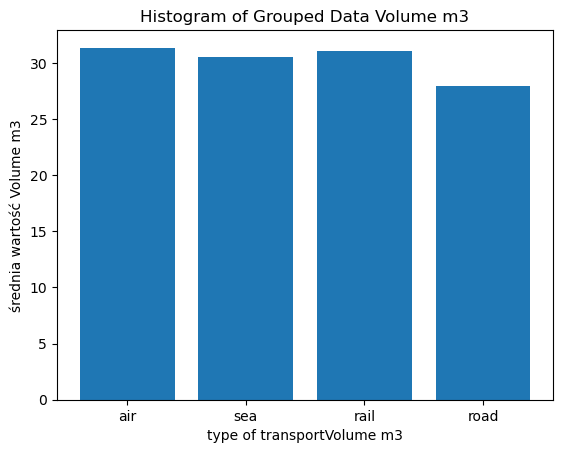

Volume m3sumaryczna
Type of transport
0    116997.040
1     11767.573
2       590.230
3     31216.780
Name: Volume m3, dtype: float64


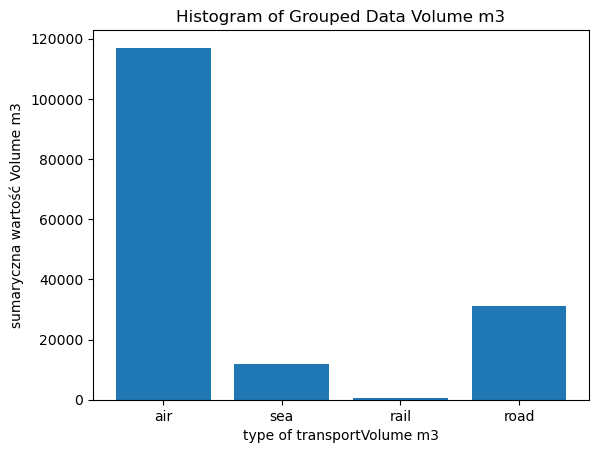

Volume m3 min
Type of transport
0    1.0
1    1.0
2    4.0
3    1.0
Name: Volume m3, dtype: float64


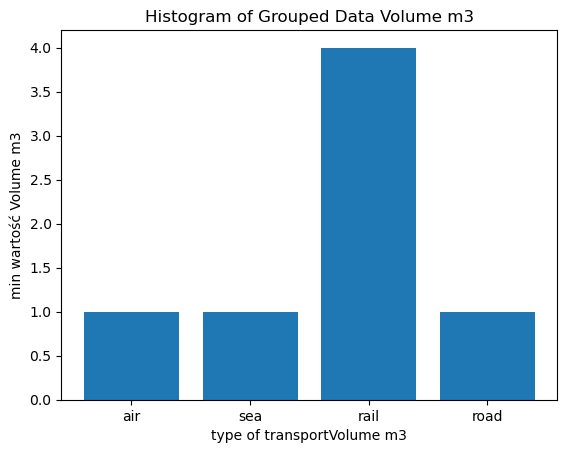

Volume m3 max
Type of transport
0    5342.0
1     123.0
2      66.0
3     123.0
Name: Volume m3, dtype: float64


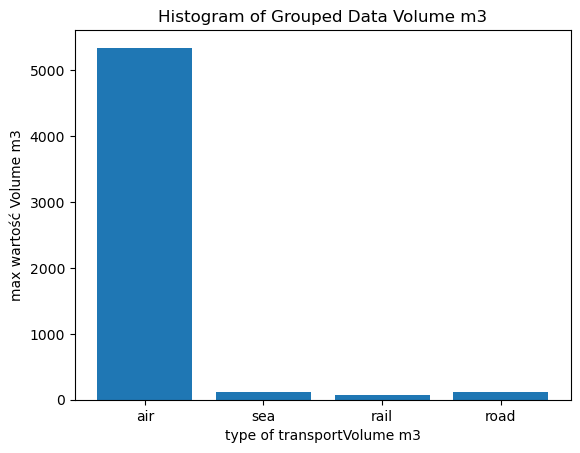

Total freight cost EUR ilość
Type of transport
0    3732
1     386
2      19
3    1119
Name: Total freight cost EUR, dtype: int64


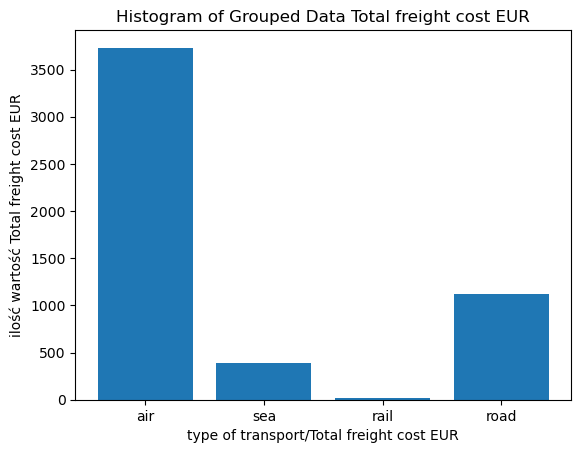

Total freight cost EUR średnia
Type of transport
0    461.563853
1    970.457176
2    384.180000
3     49.645299
Name: Total freight cost EUR, dtype: float64


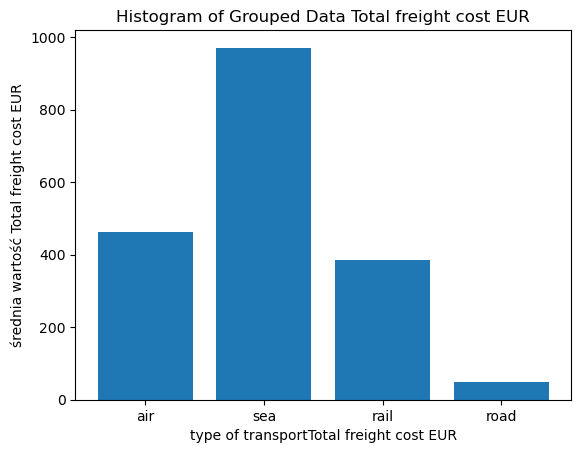

Total freight cost EURsumaryczna
Type of transport
0    1722556.30
1     374596.47
2       7299.42
3      55553.09
Name: Total freight cost EUR, dtype: float64


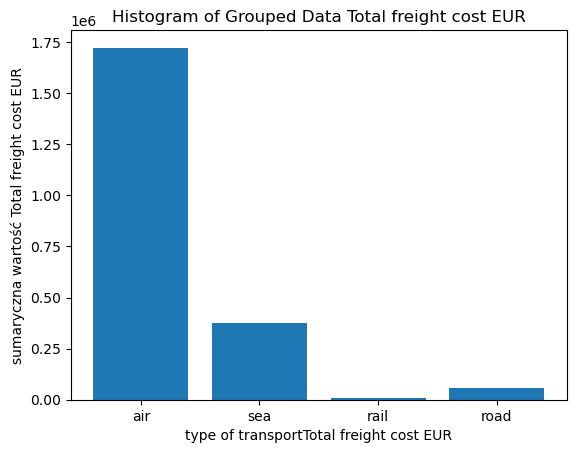

Total freight cost EUR min
Type of transport
0      1.70
1      1.65
2    210.00
3     13.81
Name: Total freight cost EUR, dtype: float64


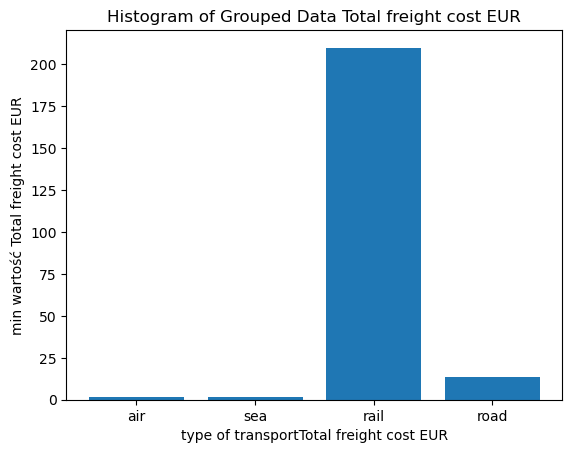

Total freight cost EUR max
Type of transport
0    8872.50
1    8872.50
2    1249.00
3     820.23
Name: Total freight cost EUR, dtype: float64


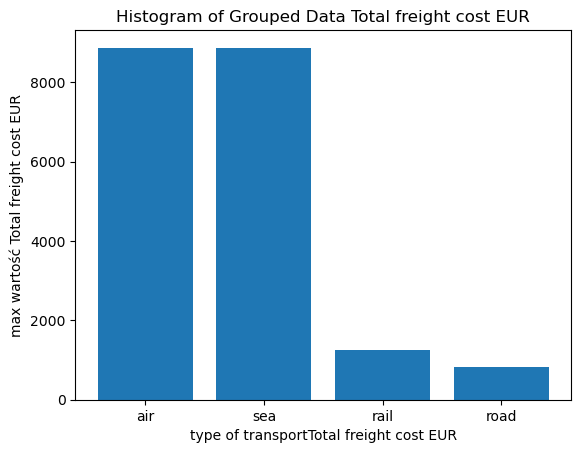

In [41]:
plot_list = ['Total gross kg','Volume m3','Total freight cost EUR']

for label in plot_list:
    grouped_data = df.groupby(by='Type of transport')[label].count()
    print(label + " ilość")
    print(grouped_data)
    plt.bar( grouped_data.index, grouped_data )
    plt.xlabel('type of transport/' +label)
    plt.ylabel('ilość wartość '+label)
    plt.title('Histogram of Grouped Data ' + label)
    plt.xticks(grouped_data.index, ['air', 'sea', 'rail', 'road'])
    plt.show()
    grouped_data = df.groupby(by='Type of transport')[label].mean()
    print(label+ " średnia")
    print(grouped_data)
    plt.bar( grouped_data.index, grouped_data )
    plt.xlabel('type of transport'+label)
    plt.ylabel('średnia wartość '+label)
    plt.title('Histogram of Grouped Data ' + label)
    plt.xticks(grouped_data.index, ['air', 'sea', 'rail', 'road'])
    plt.show()
    grouped_data = df.groupby(by='Type of transport')[label].sum()
    print(label+ "sumaryczna")
    print(grouped_data)
    plt.bar( grouped_data.index, grouped_data )
    plt.xlabel('type of transport'+label)
    plt.ylabel('sumaryczna wartość '+label)
    plt.title('Histogram of Grouped Data ' + label)
    plt.xticks(grouped_data.index, ['air', 'sea', 'rail', 'road'])
    plt.show()
    grouped_data = df.groupby(by='Type of transport')[label].min()
    print(label+ " min")
    print(grouped_data)
    plt.bar( grouped_data.index, grouped_data )
    plt.xlabel('type of transport'+label)
    plt.ylabel('min wartość '+ label)
    plt.title('Histogram of Grouped Data ' + label)
    plt.xticks(grouped_data.index, ['air', 'sea', 'rail', 'road'])
    plt.show()
    grouped_data = df.groupby(by='Type of transport')[label].max()
    print(label+ " max")
    print(grouped_data)
    plt.bar( grouped_data.index, grouped_data )
    plt.xlabel('type of transport'+label)
    plt.ylabel('max wartość '+ label)
    plt.title('Histogram of Grouped Data ' + label)
    plt.xticks(grouped_data.index, ['air', 'sea', 'rail', 'road'])
    plt.show()
    

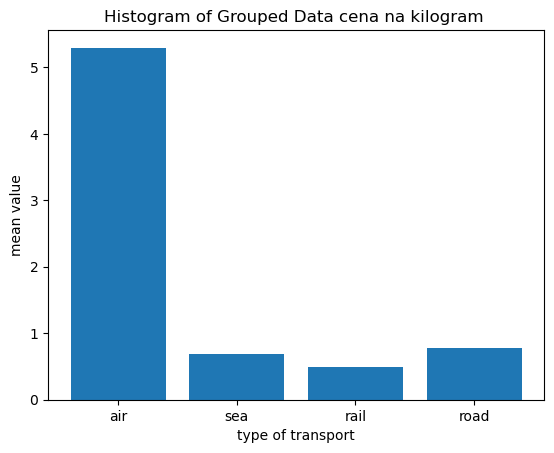

In [42]:
grouped_data1 = df.groupby(by='Type of transport')['Total gross kg'].mean()
grouped_data2 = df.groupby(by='Type of transport')['Total freight cost EUR'].mean()

grouped_data =  grouped_data2/grouped_data1

plt.bar(grouped_data.index, grouped_data )

# Dodawanie etykiet i tytułu wykresu
plt.xlabel('type of transport')
plt.ylabel('mean value')
plt.title('Histogram of Grouped Data cena na kilogram ')
plt.xticks(grouped_data.index, ['air', 'sea', 'rail', 'road'])
plt.show()

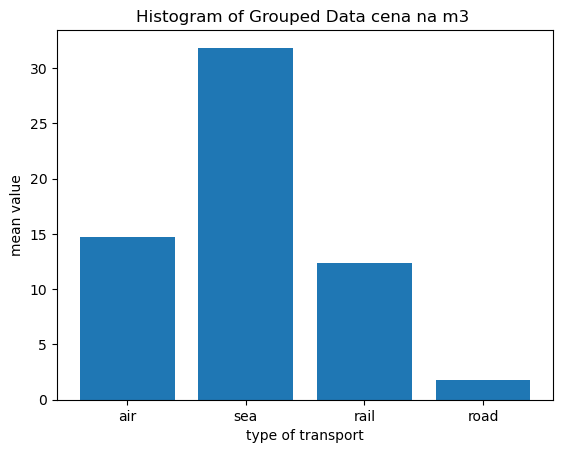

In [43]:
grouped_data1 = df.groupby(by='Type of transport')['Volume m3'].mean()
grouped_data2 = df.groupby(by='Type of transport')['Total freight cost EUR'].mean()

grouped_data =  grouped_data2/grouped_data1

plt.bar(grouped_data.index, grouped_data )

# Dodawanie etykiet i tytułu wykresu
plt.xlabel('type of transport')
plt.ylabel('mean value')
plt.title('Histogram of Grouped Data cena na m3 ')
plt.xticks(grouped_data.index, ['air', 'sea', 'rail', 'road'])
plt.show()

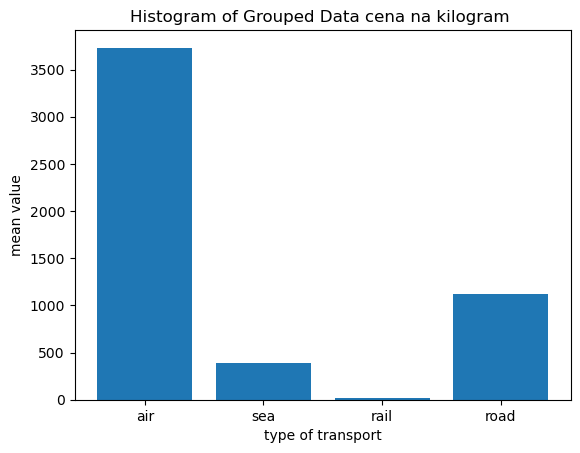

In [44]:
plt.bar(class_counts_Type_of_transport.index ,class_counts_Type_of_transport )

# Dodawanie etykiet i tytułu wykresu
plt.xlabel('type of transport')
plt.ylabel('mean value')
plt.title('Histogram of Grouped Data cena na kilogram ')
plt.xticks(grouped_data.index, ['air', 'sea', 'rail', 'road'])
plt.show()

# Jakie Incoterms są najpopularniejsze i czym jest uzależnione


In [45]:
grouped_data = df.groupby(by='Incoterms')[label].mean()

for label in non_transport_list:
    data_transport = df.groupby(by='Incoterms')[label].mean()
    print(label + " średnia")
    print(data_transport)
    print("\n")
    
    data_transport = df.groupby(by='Incoterms')[label].median()
    print(label + " max")
    print(data_transport)
    print("\n")
    
    data_transport = df.groupby(by='Incoterms')[label].count()
    print(label + " ilość")
    print(data_transport)
    print("\n")
    
    data_transport = df.groupby(by='Incoterms')[label].sum()
    print(label + " suma")
    print(data_transport)
    print("\n")
    
    data_transport = df.groupby(by='Incoterms')[label].min()
    print(label + " min")
    print(data_transport)
    print("\n")
    
    data_transport = df.groupby(by='Incoterms')[label].max()
    print(label + " max")
    print(data_transport)
    print("\n")

distance średnia
Incoterms
0     5222.577631
1     8404.708955
2    23350.149477
3     7663.690487
4     6820.210856
5     7548.000000
Name: distance, dtype: float64


distance max
Incoterms
0     6812.000
1     8123.000
2    23442.616
3     7639.500
4     6812.000
5     7548.000
Name: distance, dtype: float64


distance ilość
Incoterms
0    4238
1     134
2     111
3     275
4     479
5      19
Name: distance, dtype: int64


distance suma
Incoterms
0    2.213328e+07
1    1.126231e+06
2    2.591867e+06
3    2.107515e+06
4    3.266881e+06
5    1.434120e+05
Name: distance, dtype: float64


distance min
Incoterms
0      995.000
1     6812.000
2    18310.724
3     7639.500
4     6812.000
5     7548.000
Name: distance, dtype: float64


distance max
Incoterms
0    10448.000
1     9983.000
2    23442.616
3    14291.884
4     8123.000
5     7548.000
Name: distance, dtype: float64


Total freight cost EUR średnia
Incoterms
0     338.237440
1     472.660075
2     403.995135
3    1199.101855
4   

ilosc incoterms/incoterms 
Incoterms
0    4238
1     134
2     111
3     275
4     479
5      19
Name: Incoterms, dtype: int64


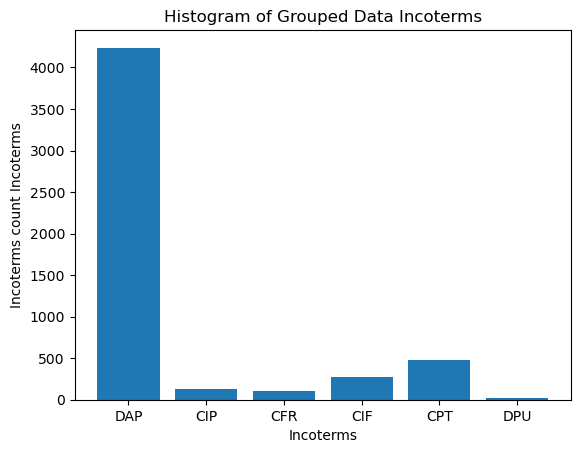

średnia incoterms/euro 
Incoterms
0     338.237440
1     472.660075
2     403.995135
3    1199.101855
4     587.312463
5     384.180000
Name: Total freight cost EUR, dtype: float64


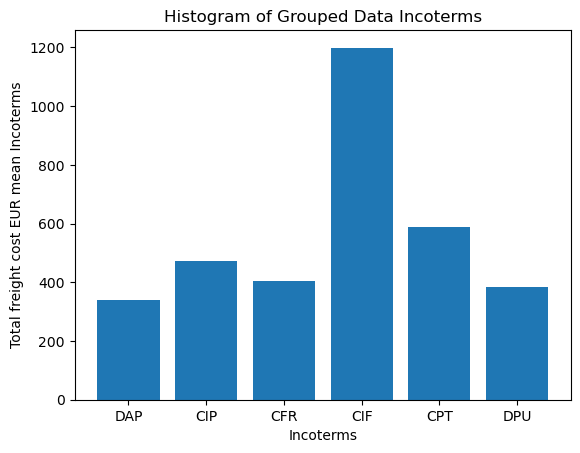

suma incoterms/euro
Incoterms
0    1433450.27
1      63336.45
2      44843.46
3     329753.01
4     281322.67
5       7299.42
Name: Total freight cost EUR, dtype: float64


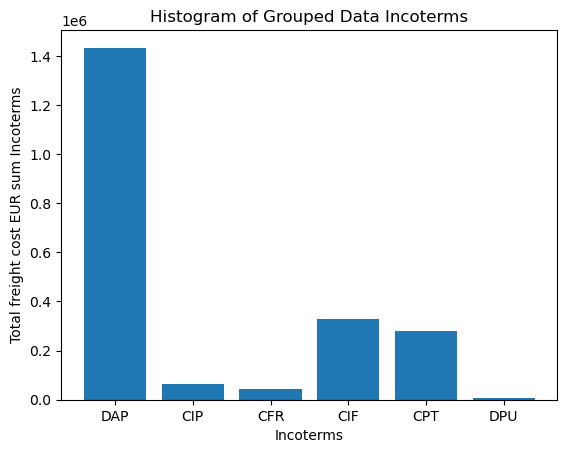

średnia incoterms/kg  
Incoterms
0      64.107349
1     180.847634
2    1087.525306
3    1520.378949
4     210.227547
5     770.368421
Name: Total gross kg, dtype: float64


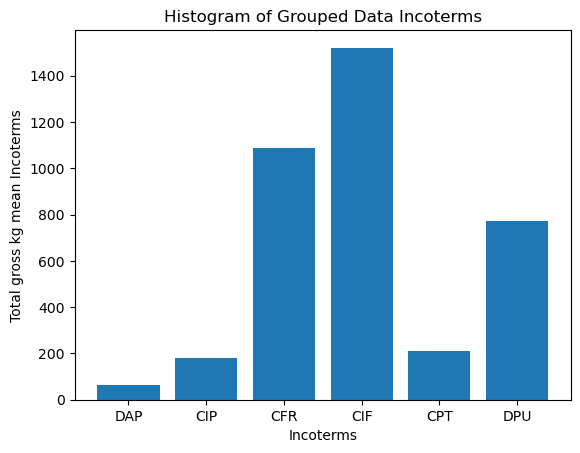

suma incoterms/kg 
Incoterms
0    271686.946
1     24233.583
2    120715.309
3    418104.211
4    100698.995
5     14637.000
Name: Total gross kg, dtype: float64


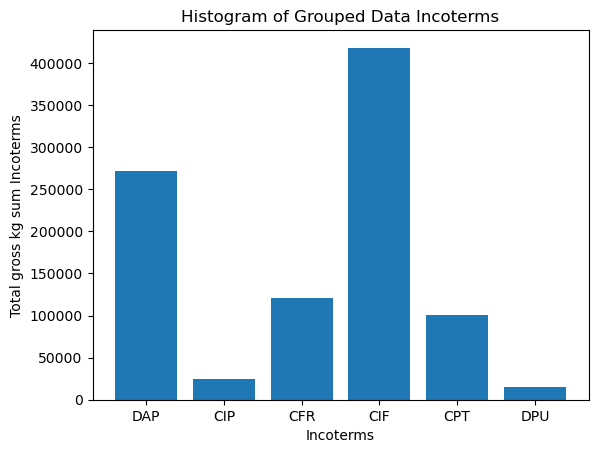

średnia incoterms/m3 
Incoterms
0    30.567553
1    34.042090
2    29.955315
3    30.700120
4    29.450710
5    31.064737
Name: Volume m3, dtype: float64


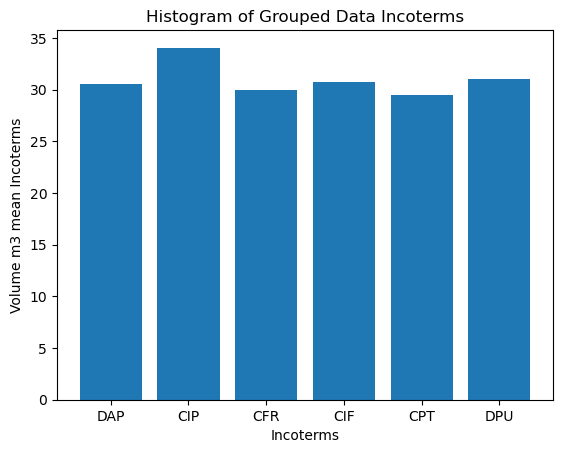

suma incoterms/m3 
Incoterms
0    129545.290
1      4561.640
2      3325.040
3      8442.533
4     14106.890
5       590.230
Name: Volume m3, dtype: float64


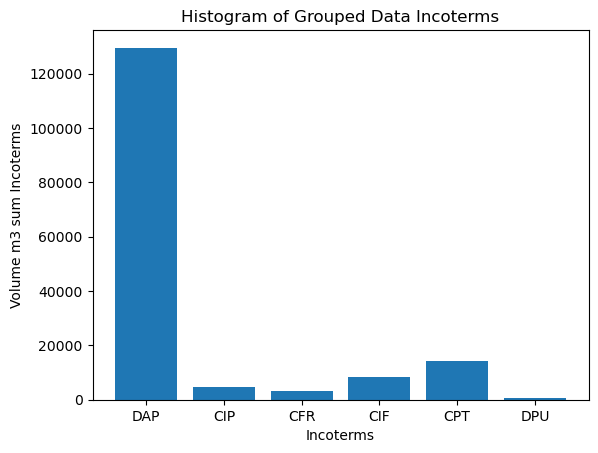

In [46]:
grouped_data = df.groupby(by='Incoterms')['Incoterms'].count()
print("ilosc incoterms/incoterms ")
print(grouped_data)

plt.bar( grouped_data.index, grouped_data )
plt.xlabel('Incoterms')
plt.ylabel('Incoterms count '+label)
plt.title('Histogram of Grouped Data ' + label)
plt.xticks(grouped_data.index, ['DAP','CIP' ,'CFR' ,'CIF' ,'CPT' ,'DPU'])
plt.show()

grouped_data = df.groupby(by='Incoterms')['Total freight cost EUR'].mean()
print("średnia incoterms/euro ")
print(grouped_data)
plt.bar( grouped_data.index, grouped_data )
plt.xlabel('Incoterms')
plt.ylabel('Total freight cost EUR mean '+ label)
plt.title('Histogram of Grouped Data ' +  label)
plt.xticks(grouped_data.index, ['DAP','CIP' ,'CFR' ,'CIF' ,'CPT' ,'DPU'])
plt.show()

grouped_data = df.groupby(by='Incoterms')['Total freight cost EUR'].sum()
print("suma incoterms/euro")
print(grouped_data)
plt.bar( grouped_data.index, grouped_data )
plt.xlabel('Incoterms')
plt.ylabel('Total freight cost EUR sum '+ label)
plt.title('Histogram of Grouped Data ' +  label)
plt.xticks(grouped_data.index, ['DAP','CIP' ,'CFR' ,'CIF' ,'CPT' ,'DPU'])
plt.show()

grouped_data = df.groupby(by='Incoterms')['Total gross kg'].mean()
print("średnia incoterms/kg  ")
print(grouped_data)
plt.bar( grouped_data.index, grouped_data )
plt.xlabel('Incoterms')
plt.ylabel('Total gross kg mean '+ label)
plt.title('Histogram of Grouped Data ' +  label)
plt.xticks(grouped_data.index, ['DAP','CIP' ,'CFR' ,'CIF' ,'CPT' ,'DPU'])
plt.show()

grouped_data = df.groupby(by='Incoterms')['Total gross kg'].sum()
print("suma incoterms/kg ")
print(grouped_data)
plt.bar( grouped_data.index, grouped_data )
plt.xlabel('Incoterms')
plt.ylabel('Total gross kg sum '+ label)
plt.title('Histogram of Grouped Data ' +  label)
plt.xticks(grouped_data.index, ['DAP','CIP' ,'CFR' ,'CIF' ,'CPT' ,'DPU'])
plt.show()

grouped_data = df.groupby(by='Incoterms')['Volume m3'].mean()
print("średnia incoterms/m3 ")
print(grouped_data)
plt.bar( grouped_data.index, grouped_data )
plt.xlabel('Incoterms')
plt.ylabel('Volume m3 mean '+ label)
plt.title('Histogram of Grouped Data ' +  label)
plt.xticks(grouped_data.index, ['DAP','CIP' ,'CFR' ,'CIF' ,'CPT' ,'DPU'])
plt.show()

grouped_data = df.groupby(by='Incoterms')['Volume m3'].sum()
print("suma incoterms/m3 ")
print(grouped_data)
plt.bar( grouped_data.index, grouped_data )
plt.xlabel('Incoterms')
plt.ylabel('Volume m3 sum '+ label)
plt.title('Histogram of Grouped Data ' +  label)
plt.xticks(grouped_data.index, ['DAP','CIP' ,'CFR' ,'CIF' ,'CPT' ,'DPU'])
plt.show()


In [47]:
grouped_data = df.groupby(by='Incoterms')['Incoterms'].count()
print(grouped_data)

Incoterms
0    4238
1     134
2     111
3     275
4     479
5      19
Name: Incoterms, dtype: int64


Incoterms
0    4238
1     134
2     111
3     275
4     479
5      19
Name: Incoterms, dtype: int64
ilość użyć inkotermsów


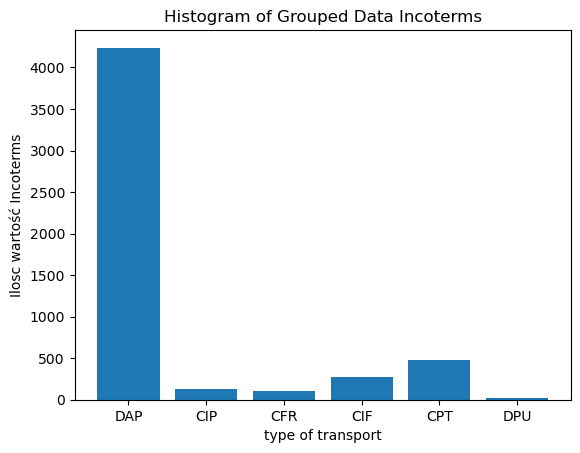

In [48]:
grouped_data = df.groupby(by='Incoterms')['Incoterms'].count()
print(grouped_data)
print("ilość użyć inkotermsów")
plt.bar( grouped_data.index, grouped_data )
plt.xlabel('type of transport')
plt.ylabel('Ilosc wartość ' + label)
plt.title('Histogram of Grouped Data ' + label)
plt.xticks(grouped_data.index, ['DAP','CIP' ,'CFR' ,'CIF' ,'CPT' ,'DPU'])
plt.show()

In [49]:
dane = []
wiersze = len(unique_values_CIncoterms)
kolumny = len(unique_values_CType_of_transport)

for i in range(wiersze):
    wiersz = []
    for j in range(kolumny):
        wiersz.append(0) 
    dane.append(wiersz)

print(dane)


[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [50]:
indeksy = df.index[df["Type of transport"] == 1]
print("Indeksy wierszy o wartości 1 w kolumnie 'kolumna':", indeksy)

Indeksy wierszy o wartości 1 w kolumnie 'kolumna': Int64Index([  60,   80,  518,  519,  520,  539,  540,  541,  542,  562,
            ...
            3424, 3449, 3450, 3470, 3490, 3508, 3522, 3543, 3558, 5254],
           dtype='int64', length=386)


In [51]:

for index, row in df.iterrows():
    for i in range( len(unique_values_CIncoterms)):
        for j in range( len(unique_values_CType_of_transport)):
            if row["Incoterms"] == unique_values_CIncoterms[i] and row["Type of transport"] == unique_values_CType_of_transport[j]:
                dane[i][j] =   dane[i][j]+1
            


In [52]:
print(dane)

[[3119, 0, 0, 1119], [134, 0, 0, 0], [0, 111, 0, 0], [0, 275, 0, 0], [479, 0, 0, 0], [0, 0, 19, 0]]


In [53]:
dane = np.array([[3119, 0, 0, 1119], [134, 0, 0, 0], [0, 111, 0, 0], [0, 275, 0, 0], [479, 0, 0, 0], [0, 0, 19, 0]])

# Transponowanie danych, aby zamienić wiersze na kolumny
dane_przetworzone = dane.T

print(dane_przetworzone)

[[3119  134    0    0  479    0]
 [   0    0  111  275    0    0]
 [   0    0    0    0    0   19]
 [1119    0    0    0    0    0]]


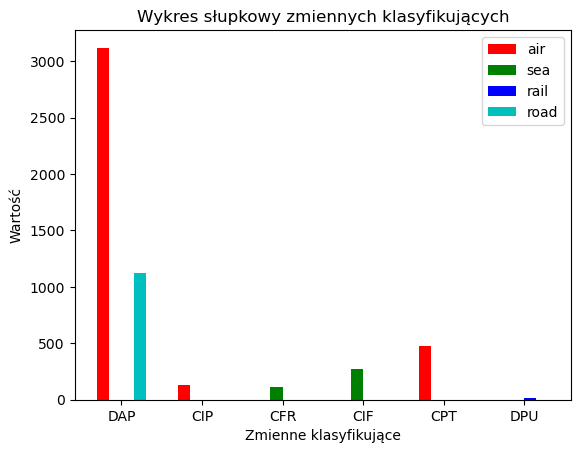

In [54]:

# Dane przykładowe
zmienne_klasyfikujace = ['DAP', 'CIP', 'CFR' ,'CIF', 'CPT', 'DPU']
zmienne_wewnetrzne = ['air', 'sea', 'rail', 'road']

# Tworzenie przykładowych danych


# Ustawienia wykresu
szerokosc_slupka = 0.15
indeks = np.arange(len(zmienne_klasyfikujace))
kolor = ['r', 'g', 'b', 'c']  # Kolory dla zmiennych wewnetrznych

# Tworzenie wykresu
fig, ax = plt.subplots()
for i in range(len(zmienne_wewnetrzne)):
    ax.bar(indeks + i * szerokosc_slupka, dane[:, i], szerokosc_slupka, color=kolor[i], label=zmienne_wewnetrzne[i])

# Ustawienie osi i etykiet
ax.set_xlabel('Zmienne klasyfikujące')
ax.set_ylabel('Wartość')
ax.set_title('Wykres słupkowy zmiennych klasyfikujących')
ax.set_xticks(indeks + szerokosc_slupka * 1.5)
ax.set_xticklabels(zmienne_klasyfikujace)
ax.legend()

plt.show()


In [55]:
dane = np.random.randint(0, 10, size=(len(zmienne_klasyfikujace), len(zmienne_wewnetrzne)))
print(dane)

[[4 9 8 5]
 [0 4 0 3]
 [8 2 8 1]
 [2 1 6 4]
 [5 5 5 6]
 [7 1 6 1]]


ilosc CntryD/CntryD 
CntryD
0     514
1    2399
2     661
3    1678
4       4
Name: CntryD, dtype: int64


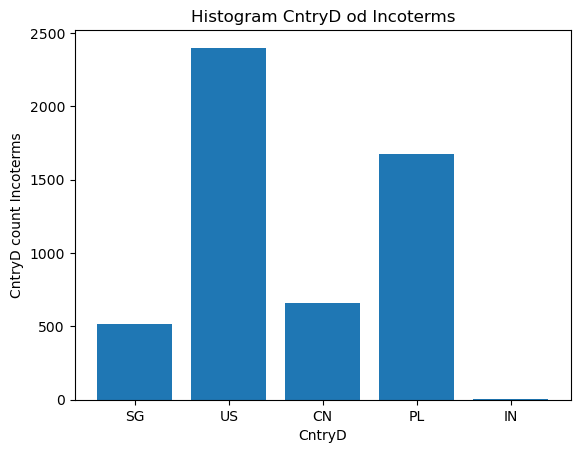

In [56]:
grouped_data = df.groupby(by='CntryD')['CntryD'].count()
print("ilosc CntryD/CntryD ")
print(grouped_data)

plt.bar( grouped_data.index, grouped_data )
plt.xlabel('CntryD')
plt.ylabel('CntryD count '+label)
plt.title('Histogram CntryD od ' + label)
plt.xticks(grouped_data.index, ['SG', 'US', 'CN', 'PL', 'IN'])
plt.show()

ilosc CntryD/ Volume m3
CntryD
0    15806.750
1    77615.793
2    19033.160
3    48043.390
4       72.530
Name: Volume m3, dtype: float64


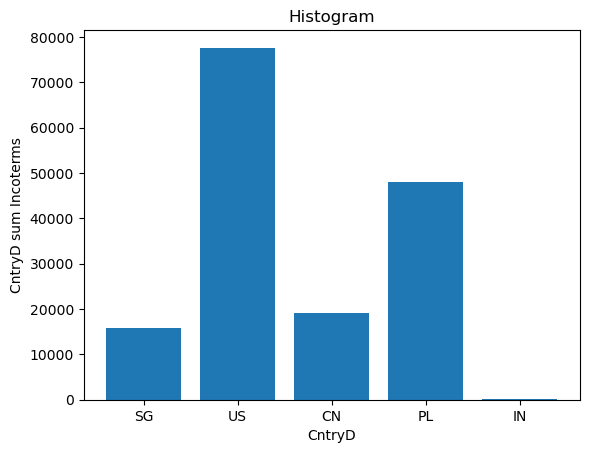

ilosc CntryD/ Volume m3
CntryD
0     514
1    2399
2     661
3    1678
4       4
Name: Volume m3, dtype: int64


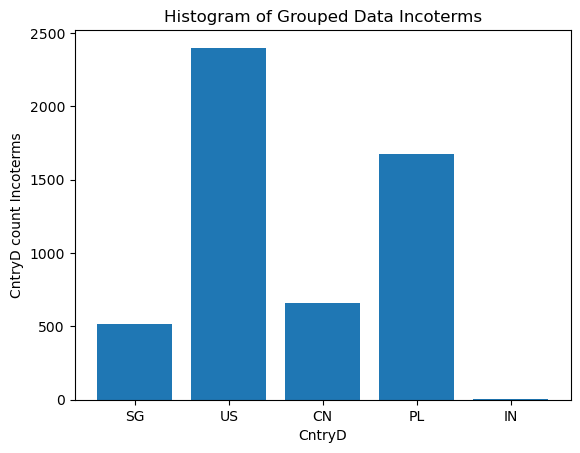

ilosc CntryD/ Volume m3
CntryD
0    30.752432
1    32.353394
2    28.794493
3    28.631341
4    18.132500
Name: Volume m3, dtype: float64


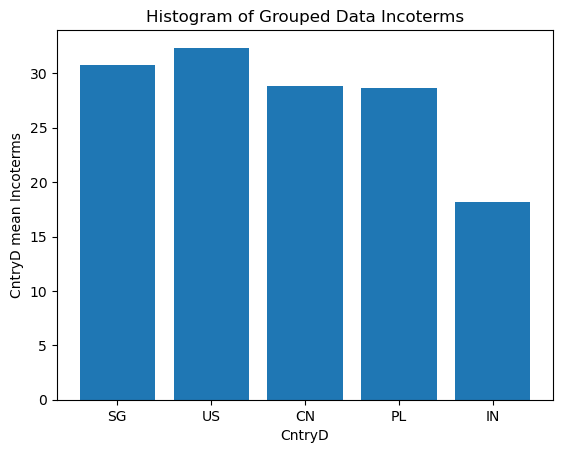

In [57]:
grouped_data = df.groupby(by='CntryD')['Volume m3'].sum()
print("ilosc CntryD/ Volume m3")
print(grouped_data)

plt.bar( grouped_data.index, grouped_data )
plt.xlabel('CntryD')
plt.ylabel('CntryD sum '+label)
plt.title('Histogram')
plt.xticks(grouped_data.index, ['SG', 'US', 'CN', 'PL', 'IN'])
plt.show()

grouped_data = df.groupby(by='CntryD')['Volume m3'].count()
print("ilosc CntryD/ Volume m3")
print(grouped_data)

plt.bar( grouped_data.index, grouped_data )
plt.xlabel('CntryD')
plt.ylabel('CntryD count '+label)
plt.title('Histogram of Grouped Data ' + label)
plt.xticks(grouped_data.index, ['SG', 'US', 'CN', 'PL', 'IN'])
plt.show()

grouped_data = df.groupby(by='CntryD')['Volume m3'].mean()
print("ilosc CntryD/ Volume m3")
print(grouped_data)

plt.bar( grouped_data.index, grouped_data )
plt.xlabel('CntryD')
plt.ylabel('CntryD mean '+label)
plt.title('Histogram of Grouped Data ' + label)
plt.xticks(grouped_data.index, ['SG', 'US', 'CN', 'PL', 'IN'])
plt.show()

suma CntryD/ Total freight cost EUR
CntryD
0      47130.32
1    1836337.49
2     202004.25
3      73846.52
4        686.70
Name: Total freight cost EUR, dtype: float64


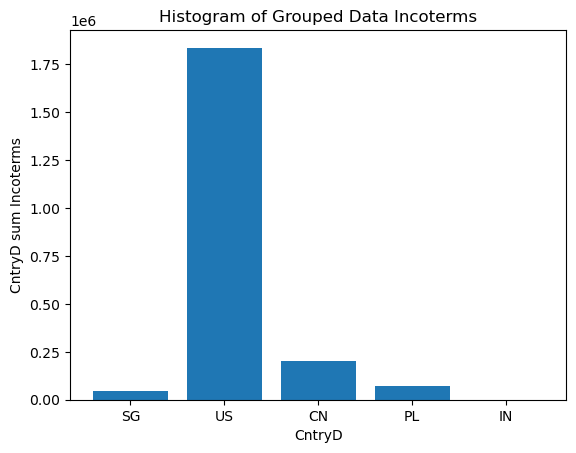

ilosc CntryD/ Total freight cost EUR
CntryD
0     514
1    2399
2     661
3    1678
4       4
Name: Total freight cost EUR, dtype: int64


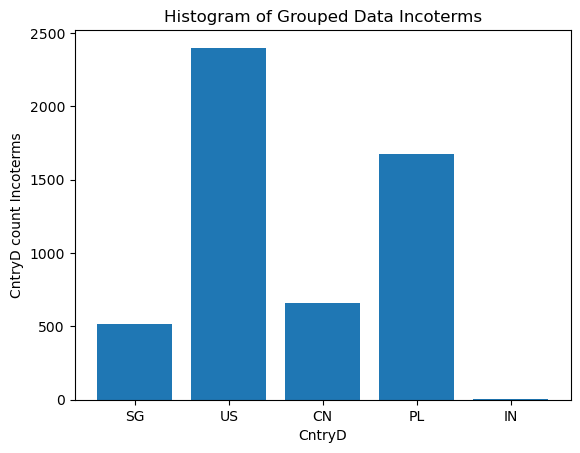

średnia CntryD/ Total freight cost EUR3
CntryD
0     91.693230
1    765.459562
2    305.604009
3     44.008653
4    171.675000
Name: Total freight cost EUR, dtype: float64


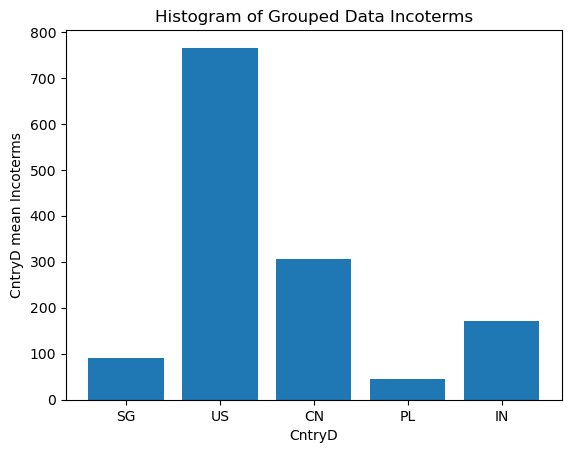

In [58]:
grouped_data = df.groupby(by='CntryD')['Total freight cost EUR'].sum()
print("suma CntryD/ Total freight cost EUR")
print(grouped_data)

plt.bar( grouped_data.index, grouped_data )
plt.xlabel('CntryD')
plt.ylabel('CntryD sum '+label)
plt.title('Histogram of Grouped Data ' + label)
plt.xticks(grouped_data.index, ['SG', 'US', 'CN', 'PL', 'IN'])
plt.show()

grouped_data = df.groupby(by='CntryD')['Total freight cost EUR'].count()
print("ilosc CntryD/ Total freight cost EUR")
print(grouped_data)

plt.bar( grouped_data.index, grouped_data )
plt.xlabel('CntryD')
plt.ylabel('CntryD count '+label)
plt.title('Histogram of Grouped Data ' + label)
plt.xticks(grouped_data.index, ['SG', 'US', 'CN', 'PL', 'IN'])
plt.show()

grouped_data = df.groupby(by='CntryD')['Total freight cost EUR'].mean()
print("średnia CntryD/ Total freight cost EUR3")
print(grouped_data)

plt.bar( grouped_data.index, grouped_data )
plt.xlabel('CntryD')
plt.ylabel('CntryD mean '+label)
plt.title('Histogram of Grouped Data ' + label)
plt.xticks(grouped_data.index, ['SG', 'US', 'CN', 'PL', 'IN'])
plt.show()

suma CntryD/ Total gross kg
CntryD
0      9780.675
1    673200.023
2    189222.953
3     76894.493
4       977.900
Name: Total gross kg, dtype: float64


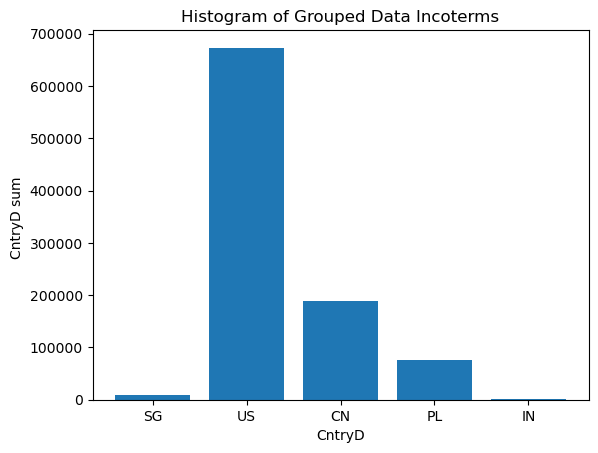

ilosc CntryD/ Total gross kg
CntryD
0     514
1    2399
2     661
3    1678
4       4
Name: Total gross kg, dtype: int64


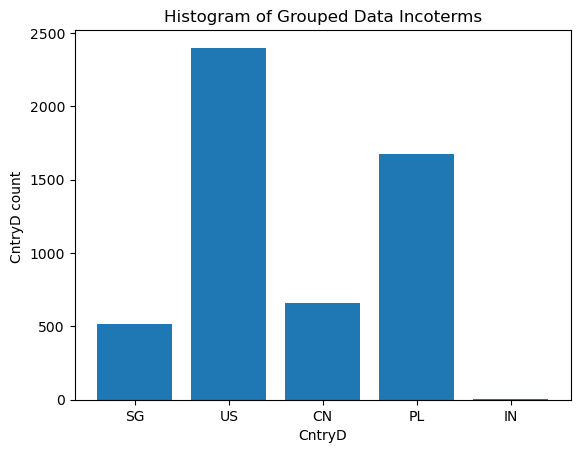

średnia CntryD/ Total gross kg
CntryD
0     19.028551
1    280.616933
2    286.267705
3     45.825085
4    244.475000
Name: Total gross kg, dtype: float64


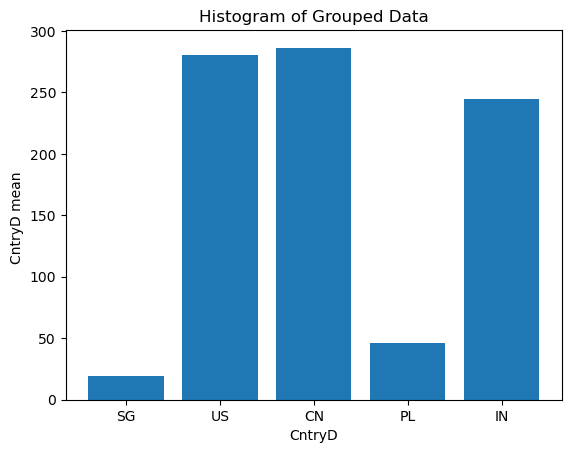

In [59]:
grouped_data = df.groupby(by='CntryD')['Total gross kg'].sum()
print("suma CntryD/ Total gross kg")
print(grouped_data)

plt.bar( grouped_data.index, grouped_data )
plt.xlabel('CntryD')
plt.ylabel('CntryD sum ')
plt.title('Histogram of Grouped Data ' + label)
plt.xticks(grouped_data.index, ['SG', 'US', 'CN', 'PL', 'IN'])
plt.show()

grouped_data = df.groupby(by='CntryD')['Total gross kg'].count()
print("ilosc CntryD/ Total gross kg")
print(grouped_data)

plt.bar( grouped_data.index, grouped_data )
plt.xlabel('CntryD')
plt.ylabel('CntryD count ')
plt.title('Histogram of Grouped Data ' + label)
plt.xticks(grouped_data.index, ['SG', 'US', 'CN', 'PL', 'IN'])
plt.show()

grouped_data = df.groupby(by='CntryD')['Total gross kg'].mean()
print("średnia CntryD/ Total gross kg")
print(grouped_data)

plt.bar( grouped_data.index, grouped_data )
plt.xlabel('CntryD')
plt.ylabel('CntryD mean ')
plt.title('Histogram of Grouped Data')
plt.xticks(grouped_data.index, ['SG', 'US', 'CN', 'PL', 'IN'])
plt.show()

Forwarder
0    1466
1      10
2     487
3    2180
4    1023
5      90
Name: Total gross kg, dtype: int64


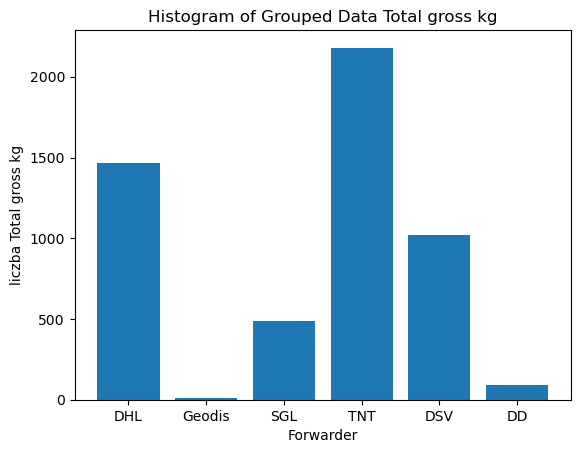

Forwarder
0     14.306427
1    116.102500
2    450.278427
3     41.608212
4    555.567937
5    551.158889
Name: Total gross kg, dtype: float64


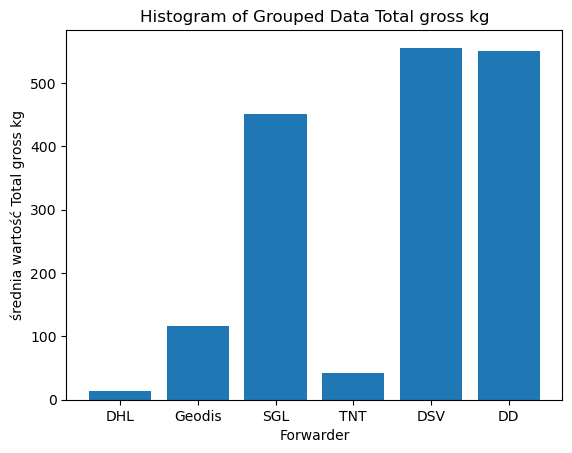

Forwarder
0     20973.222
1      1161.025
2    219285.594
3     90705.903
4    568346.000
5     49604.300
Name: Total gross kg, dtype: float64


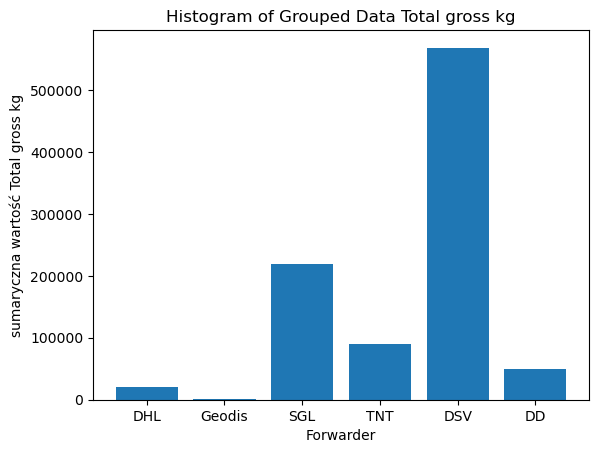

Forwarder
0    0.050
1    0.100
2    0.120
3    0.055
4    0.100
5    1.130
Name: Total gross kg, dtype: float64


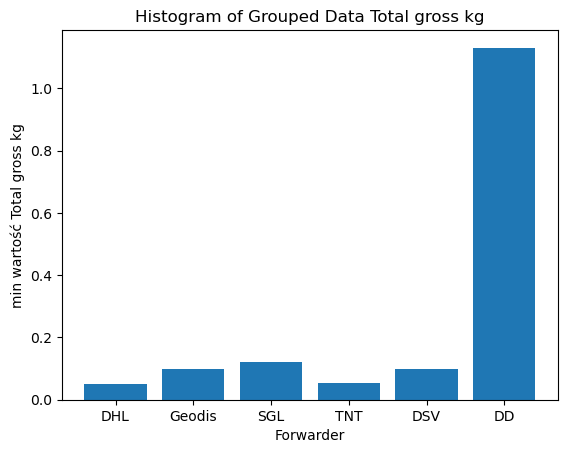

Forwarder
0      341.00
1      474.56
2     4040.00
3     1210.00
4    26988.10
5     2756.00
Name: Total gross kg, dtype: float64


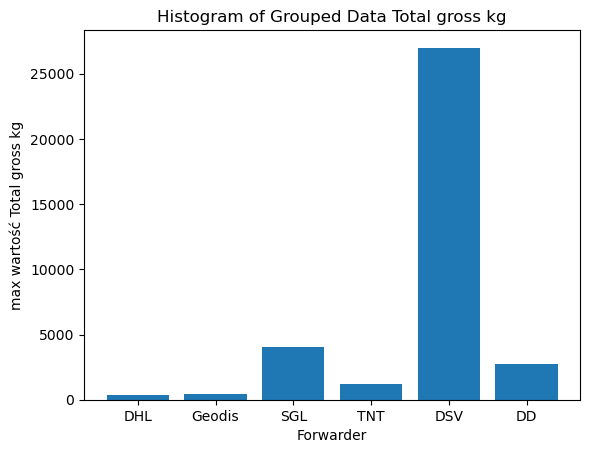

Forwarder
0    1466
1      10
2     487
3    2180
4    1023
5      90
Name: Volume m3, dtype: int64


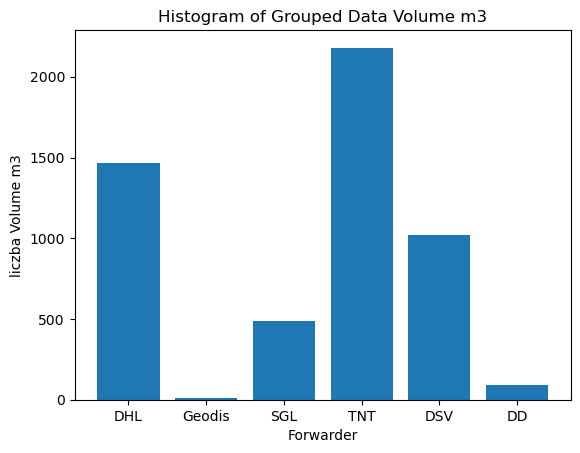

Forwarder
0    33.253629
1    32.630000
2    32.140616
3    28.775463
4    29.886543
5    28.206444
Name: Volume m3, dtype: float64


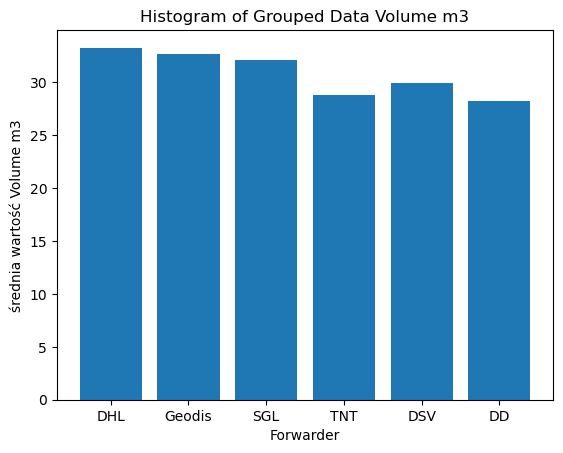

Forwarder
0    48749.820
1      326.300
2    15652.480
3    62730.510
4    30573.933
5     2538.580
Name: Volume m3, dtype: float64


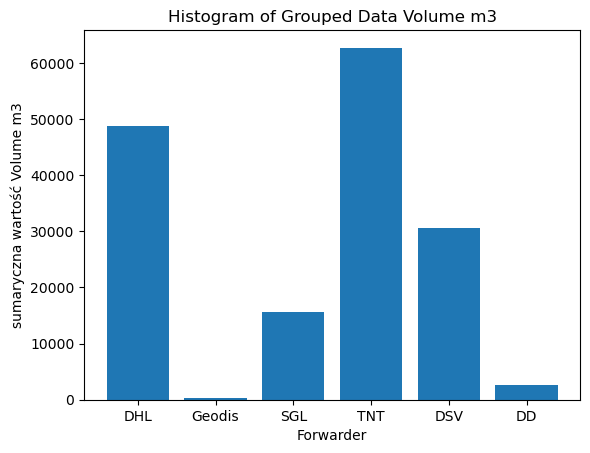

Forwarder
0    1.0
1    5.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: Volume m3, dtype: float64


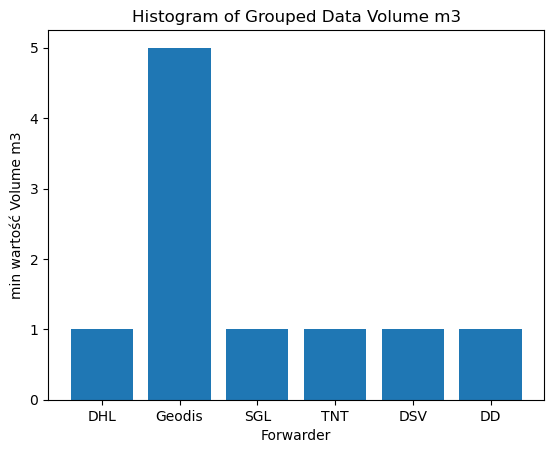

Forwarder
0    5342.0
1      90.0
2     984.0
3     123.0
4     123.0
5     123.0
Name: Volume m3, dtype: float64


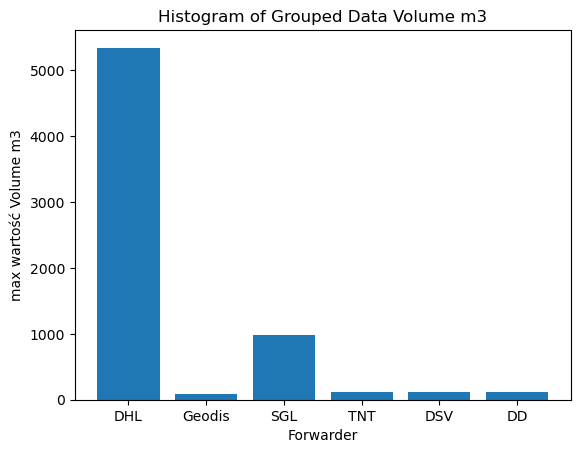

Forwarder
0    1466
1      10
2     487
3    2180
4    1023
5      90
Name: Total freight cost EUR, dtype: int64


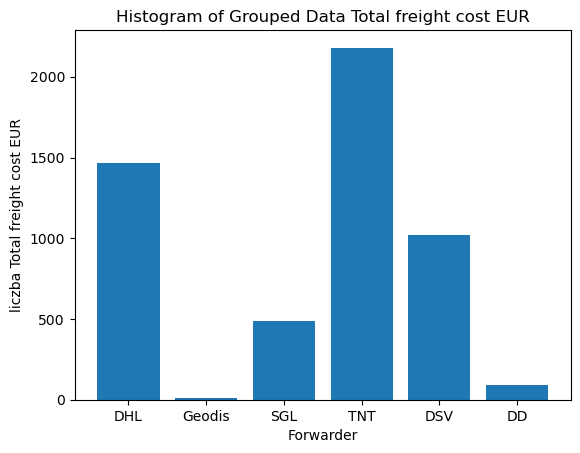

Forwarder
0    226.313083
1    366.453000
2    789.932608
3    308.580954
4    729.781554
5    228.839778
Name: Total freight cost EUR, dtype: float64


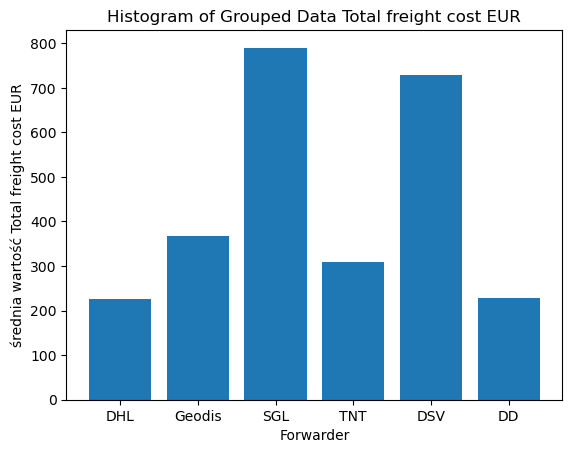

Forwarder
0    331774.98
1      3664.53
2    384697.18
3    672706.48
4    746566.53
5     20595.58
Name: Total freight cost EUR, dtype: float64


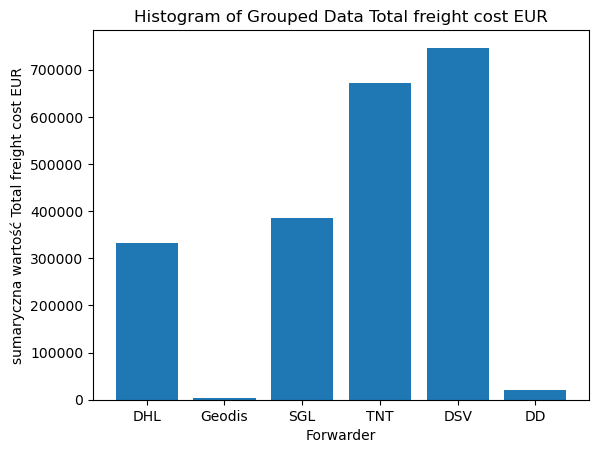

Forwarder
0     13.26
1     79.00
2     11.02
3      1.70
4      1.65
5    102.33
Name: Total freight cost EUR, dtype: float64


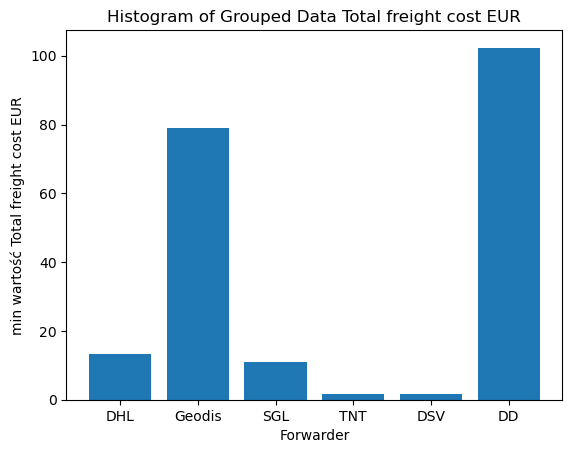

Forwarder
0    6058.60
1    1015.08
2    8872.50
3    8465.10
4    8872.50
5     659.31
Name: Total freight cost EUR, dtype: float64


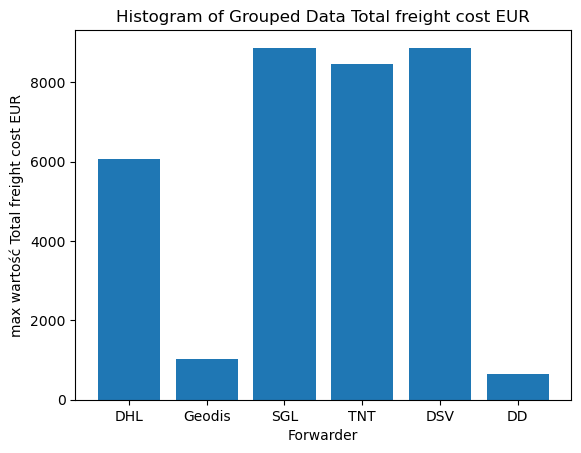

In [60]:
plot_list = ['Total gross kg','Volume m3','Total freight cost EUR']

for label in plot_list:
    grouped_data = df.groupby(by='Forwarder')[label].count()
    print(grouped_data)
    plt.bar( grouped_data.index, grouped_data )
    plt.xlabel('Forwarder')
    plt.ylabel('liczba '+label)
    plt.title('Histogram of Grouped Data ' + label)
    plt.xticks(grouped_data.index, ['DHL', 'Geodis', 'SGL', 'TNT', 'DSV', 'DD'])
    plt.show()
    
    grouped_data = df.groupby(by='Forwarder')[label].mean()
    print(grouped_data)
    plt.bar( grouped_data.index, grouped_data )
    plt.xlabel('Forwarder')
    plt.ylabel('średnia wartość '+label)
    plt.title('Histogram of Grouped Data ' + label)
    plt.xticks(grouped_data.index, ['DHL', 'Geodis', 'SGL', 'TNT', 'DSV', 'DD'])
    plt.show()
    grouped_data = df.groupby(by='Forwarder')[label].sum()
    print(grouped_data)
    plt.bar( grouped_data.index, grouped_data )
    plt.xlabel('Forwarder')
    plt.ylabel('sumaryczna wartość '+label)
    plt.title('Histogram of Grouped Data ' + label)
    plt.xticks(grouped_data.index, ['DHL', 'Geodis', 'SGL', 'TNT', 'DSV', 'DD'])
    plt.show()
    grouped_data = df.groupby(by='Forwarder')[label].min()
    print(grouped_data)
    plt.bar( grouped_data.index, grouped_data )
    plt.xlabel('Forwarder')
    plt.ylabel('min wartość '+ label)
    plt.title('Histogram of Grouped Data ' + label)
    plt.xticks(grouped_data.index, ['DHL', 'Geodis', 'SGL', 'TNT', 'DSV', 'DD'])
    plt.show()
    grouped_data = df.groupby(by='Forwarder')[label].max()
    print(grouped_data)
    plt.bar( grouped_data.index, grouped_data )
    plt.xlabel('Forwarder')
    plt.ylabel('max wartość '+ label)
    plt.title('Histogram of Grouped Data ' + label)
    plt.xticks(grouped_data.index, ['DHL', 'Geodis', 'SGL', 'TNT', 'DSV', 'DD'])
    plt.show()
    

In [61]:
plot_list = ['Total gross kg','Volume m3','Total freight cost EUR','distance']

for label in plot_list:
    grouped_data = df.groupby(by='Forwarder')[label].count()
    print(label)
    print(grouped_data)
    print("\n")

    
    grouped_data = df.groupby(by='Forwarder')[label].mean()
    print(label)
    print(grouped_data)
    print("\n")
    grouped_data = df.groupby(by='Forwarder')[label].sum()
    print(label)
    print(grouped_data)
    print("\n")

    grouped_data = df.groupby(by='Forwarder')[label].min()
    print(label)
    print(grouped_data)
    print("\n")

    grouped_data = df.groupby(by='Forwarder')[label].max()
    print(label)
    print(grouped_data)
    print("\n")

    

Total gross kg
Forwarder
0    1466
1      10
2     487
3    2180
4    1023
5      90
Name: Total gross kg, dtype: int64


Total gross kg
Forwarder
0     14.306427
1    116.102500
2    450.278427
3     41.608212
4    555.567937
5    551.158889
Name: Total gross kg, dtype: float64


Total gross kg
Forwarder
0     20973.222
1      1161.025
2    219285.594
3     90705.903
4    568346.000
5     49604.300
Name: Total gross kg, dtype: float64


Total gross kg
Forwarder
0    0.050
1    0.100
2    0.120
3    0.055
4    0.100
5    1.130
Name: Total gross kg, dtype: float64


Total gross kg
Forwarder
0      341.00
1      474.56
2     4040.00
3     1210.00
4    26988.10
5     2756.00
Name: Total gross kg, dtype: float64


Volume m3
Forwarder
0    1466
1      10
2     487
3    2180
4    1023
5      90
Name: Volume m3, dtype: int64


Volume m3
Forwarder
0    33.253629
1    32.630000
2    32.140616
3    28.775463
4    29.886543
5    28.206444
Name: Volume m3, dtype: float64


Volume m3
Forwarder
0   

# Tworzenie modelu do predykcji

In [62]:
df.describe()

distance  Total freight cost EUR  Total gross kg    Volume m3  \
count   5256.000000             5256.000000     5256.000000  5256.000000   
mean    5968.262838              410.959909      180.760282    30.550157   
std     3984.957478              796.062958      666.472805    80.164675   
min      995.000000                1.650000        0.050000     1.000000   
25%     1667.000000               21.420000        0.900000     6.000000   
50%     6812.000000               72.635000        6.135000    21.000000   
75%     7639.500000              413.197500       88.875000    43.000000   
max    23442.616000             8872.500000    26988.100000  5342.000000   

              User         Csee         City   Posta Code       CntryD  \
count  5256.000000  5256.000000  5256.000000  5256.000000  5256.000000   
mean      0.045852     2.590753     4.432839    29.856925     1.668760   
std       0.209185     1.966064     2.222037     9.379172     1.029749   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     3.000000    29.000000     1.000000   
50%       0.000000     1.000000     3.000000    33.000000     1.000000   
75%       0.000000     5.000000     7.000000    36.000000     3.000000   
max       1.000000     6.000000     8.000000    37.000000     4.000000   

       Type of transport    Forwarder    Incoterms  
count        5256.000000  5256.000000  5256.000000  
mean            0.719368     2.295662     0.607306  
std             1.219339     1.542086     1.326985  
min             0.000000     0.000000     0.000000  
25%             0.000000     0.000000     0.000000  
50%             0.000000     3.000000     0.000000  
75%             1.000000     3.000000     0.000000  
max             3.000000     5.000000     5.000000

In [63]:
import random
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
max_value_date = df['Disp. dt.'].max()
print(max_value_date)

2021-01-27 00:00:00


In [65]:
df['Disp. dt.'] = (df['Disp. dt.'] - df['Disp. dt.'].min()).dt.days

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Disp. dt.', axis=1), df['Disp. dt.'], test_size=0.2, random_state=42)

# Inicjalizacja modelu GradientBoostingRegressor
gb_regressor_data = GradientBoostingRegressor()

# Dopasowanie modelu do danych treningowych
gb_regressor_data.fit(X_train, y_train)

# Predykcja zmiennej daty dla danych testowych
predictions_data = gb_regressor_data.predict(X_test)

# Wyświetlenie wyników predykcji
print(predictions_data)

[331.50452621 403.98973068 398.76580221 ... 506.82631092 459.05178264
 400.91363194]


In [67]:
gb_regressor_dist = GradientBoostingRegressor()

In [68]:
# Podział danych na kolumny wejściowe (X) i zmienną docelową (y)
X = df.drop('distance', axis=1)
y = df['distance']

print(X.shape)
print(y.shape)

(5256, 12)
(5256,)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4204, 12)
(1052, 12)
(4204,)
(1052,)


In [70]:
# column_names = X.columns.tolist()
# print(column_names)
# column_names = y.columns.tolist()
# print(column_names)

In [71]:
gb_regressor_dist.fit(X_train, y_train)

GradientBoostingRegressor()

In [72]:
predictions_dist = gb_regressor_dist.predict(X_test)

In [73]:

print(len(predictions_dist))

1052


In [74]:
# Podział danych na kolumny wejściowe (X) i zmienną docelową (y)
X = df.drop('Total freight cost EUR', axis=1)
y = df['Total freight cost EUR']

print(X.shape)
print(y.shape)

(5256, 12)
(5256,)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4204, 12)
(1052, 12)
(4204,)
(1052,)


In [76]:
gb_regressor_EUR = GradientBoostingRegressor()

In [77]:
gb_regressor_EUR.fit(X_train, y_train)

GradientBoostingRegressor()

In [78]:
predictions_EUR = gb_regressor_EUR.predict(X_test)

In [79]:

print(len(predictions_dist))

1052


In [80]:
# Podział danych na kolumny wejściowe (X) i zmienną docelową (y)
X = df.drop('Total gross kg', axis=1)
y = df['Total gross kg']

print(X.shape)
print(y.shape)

(5256, 12)
(5256,)


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4204, 12)
(1052, 12)
(4204,)
(1052,)


In [82]:
gb_regressor_kg = GradientBoostingRegressor()

In [83]:
gb_regressor_kg.fit(X_train, y_train)

GradientBoostingRegressor()

In [84]:
predictions_kg = gb_regressor_kg.predict(X_test)

In [85]:

print(len(predictions_dist))

1052


In [86]:
# Podział danych na kolumny wejściowe (X) i zmienną docelową (y)
X = df.drop('Volume m3', axis=1)
y = df['Volume m3']

print(X.shape)
print(y.shape)

(5256, 12)
(5256,)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4204, 12)
(1052, 12)
(4204,)
(1052,)


In [88]:
gb_regressor_m3 = GradientBoostingRegressor()

In [89]:
gb_regressor_m3.fit(X_train, y_train)

GradientBoostingRegressor()

In [90]:
predictions_m3 = gb_regressor_m3.predict(X_test)

In [91]:
print(len(predictions_dist))
print(len(predictions_EUR))
print(len(predictions_kg))
print(len(predictions_m3))

1052
1052
1052
1052


In [92]:
print(len(predictions_dist))
print(len(predictions_EUR))
print(len(predictions_kg))
print(len(predictions_m3))
print(len(predictions_data))

1052
1052
1052
1052
1052


In [93]:
dfp = pd.DataFrame()
dfp['distance'] = predictions_dist
dfp['Total freight cost EUR'] = predictions_EUR
dfp['Total gross kg'] = predictions_kg
dfp['Volume m3'] = predictions_m3
dfp['data'] = predictions_data

print(dfp.shape)  # Sprawdzenie rozmiaru nowego dataframe

# Można również przypisać indeksy z oryginalnego dataframe testowego X_test
dfp.index = X_test.index

print(dfp.head())  # Wyświetlenie pierwszych kilku wierszy nowego dataframe

(1052, 5)
         distance  Total freight cost EUR  Total gross kg  Volume m3  \
3298  8175.293303              321.901141       95.656006  26.861265   
1782  6840.528469              891.697179      505.997400  28.446857   
3655  1668.930065               20.249786       19.653893  28.962688   
577   6772.689109             2215.455771      108.535465  27.195767   
718   6772.689109             1728.734311      148.673870  28.580823   

            data  
3298  331.504526  
1782  403.989731  
3655  398.765802  
577   746.417190  
718   717.599840  


In [94]:
print(dfp.head())

         distance  Total freight cost EUR  Total gross kg  Volume m3  \
3298  8175.293303              321.901141       95.656006  26.861265   
1782  6840.528469              891.697179      505.997400  28.446857   
3655  1668.930065               20.249786       19.653893  28.962688   
577   6772.689109             2215.455771      108.535465  27.195767   
718   6772.689109             1728.734311      148.673870  28.580823   

            data  
3298  331.504526  
1782  403.989731  
3655  398.765802  
577   746.417190  
718   717.599840  


In [95]:
dfp['data'] = pd.to_timedelta(dfp['data'], unit='D') + max_value_date

distance
data
2021-01    7.652622e+03
2021-04    2.124310e+04
2021-05    2.788307e+05
2021-06    3.069588e+05
2021-07    2.360856e+05
2021-08    6.812165e+04
2021-09    3.723270e+04
2021-10    8.806014e+03
2021-11    4.905176e+04
2021-12    2.245591e+05
2022-01    3.387100e+05
2022-02    8.318240e+05
2022-03    1.023437e+06
2022-04    7.202361e+05
2022-05    3.511243e+05
2022-06    2.644216e+05
2022-07    1.303005e+05
2022-08    8.845553e+04
2022-09    4.372036e+05
2022-10    4.533751e+04
2022-11    2.289534e+04
2022-12    2.414076e+05
2023-01    2.038550e+05
2023-02    3.192679e+05
2023-03    9.969244e+03
Freq: M, Name: distance, dtype: float64


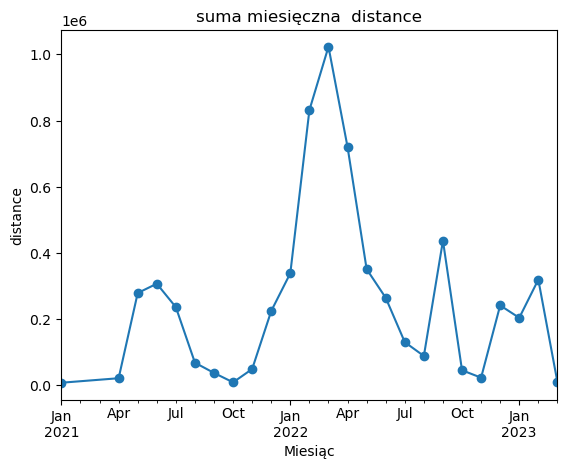

Total freight cost EUR
data
2021-01     5879.133403
2021-04     5347.626432
2021-05    17846.269792
2021-06     9311.721827
2021-07     6012.784733
2021-08     1670.752959
2021-09      641.966008
2021-10      762.796099
2021-11      579.936754
2021-12    12840.839640
2022-01     5551.070557
2022-02    52765.320446
2022-03    20004.773077
2022-04    24126.634376
2022-05    11810.145854
2022-06    19419.596123
2022-07    20991.176182
2022-08     7317.756661
2022-09    13217.445047
2022-10     3011.276030
2022-11     5370.236477
2022-12    58745.775052
2023-01    52544.404970
2023-02    78277.307106
2023-03      505.583414
Freq: M, Name: Total freight cost EUR, dtype: float64


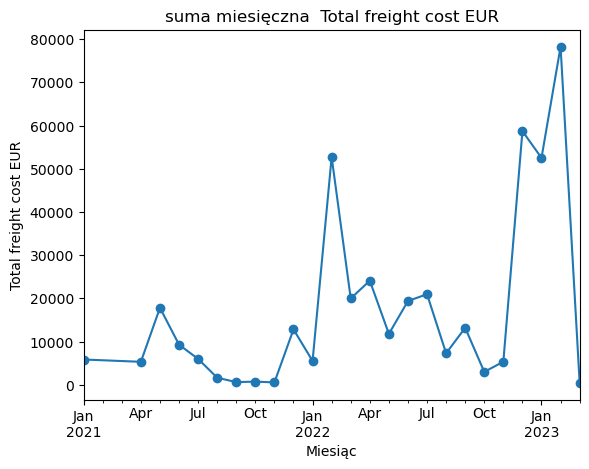

Total gross kg
data
2021-01    11143.601801
2021-04     3289.658719
2021-05     8800.259688
2021-06     8281.466644
2021-07     4738.826296
2021-08      328.900733
2021-09      100.989738
2021-10      419.574204
2021-11       98.176888
2021-12     6994.164856
2022-01     1484.142939
2022-02    20880.979094
2022-03     9243.702421
2022-04    22384.137275
2022-05     3976.775245
2022-06    13392.645099
2022-07    29576.223918
2022-08     8384.508701
2022-09    18867.863492
2022-10      280.132468
2022-11     4540.030088
2022-12     6152.113345
2023-01     4048.797517
2023-02     7575.419467
2023-03       74.057507
Freq: M, Name: Total gross kg, dtype: float64


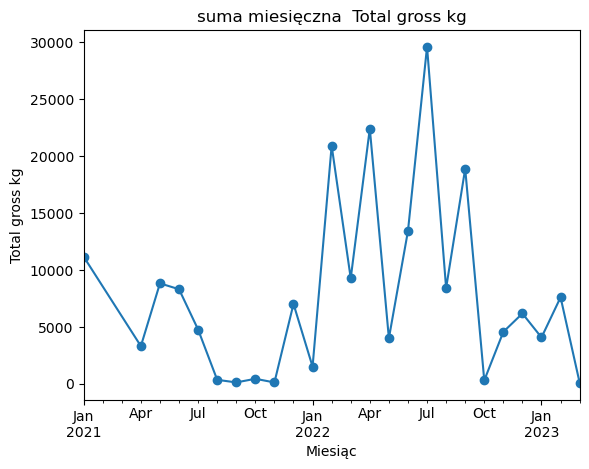

Volume m3
data
2021-01      29.434567
2021-04      90.447245
2021-05    1228.411994
2021-06    1503.085798
2021-07    1003.106859
2021-08     367.879270
2021-09     144.094451
2021-10      92.633312
2021-11     175.672301
2021-12     735.548392
2022-01    1373.765671
2022-02    3722.949603
2022-03    4401.802732
2022-04    4737.926682
2022-05    3227.957125
2022-06    1881.556281
2022-07     709.155047
2022-08     907.970501
2022-09    1294.910166
2022-10     939.551670
2022-11      90.357321
2022-12    1083.378758
2023-01     917.533127
2023-02    1539.552516
2023-03     374.417557
Freq: M, Name: Volume m3, dtype: float64


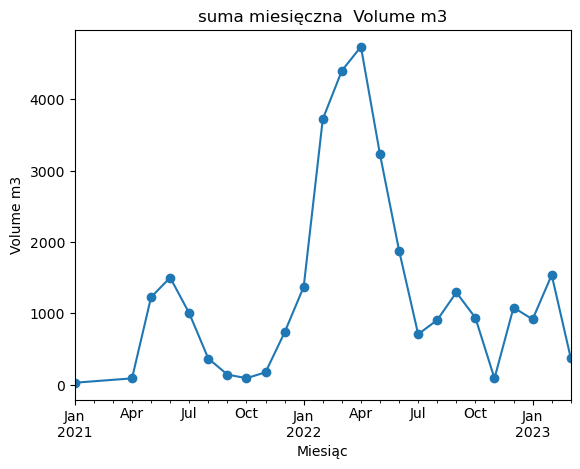

In [96]:
non_date_list = ['distance', 'Total freight cost EUR', 'Total gross kg', 'Volume m3'] 
for label in non_date_list:
    monthly_data = dfp.groupby(dfp['data'].dt.to_period('M'))[label].sum()
    monthly_data.plot(kind='line', marker='o')
    print(label)
    print(monthly_data)
    # Ustawienie etykiet i tytułu
    plt.xlabel('Miesiąc')
    plt.ylabel(label )
    plt.title('suma miesięczna  ' + label)
    
    plt.show()

    # Wyświetlenie wykresu